In [327]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/ASD_Circuits/src')
from ASD_Circuits import *
from tabulate import tabulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
graph = LoadConnectome2()
graph_local = LoadConnectome2("../dat/allen-mouse-conn/adj_mat_cartesian_local.csv")
graph_distal = LoadConnectome2("../dat/allen-mouse-conn/adj_mat_cartesian_distal.csv")
EdgeWeightsDict = EdgeDict(graph)
EdgeInfoDict = pk.load(open("/home/jw3514/Work/ASD_Circuits/scripts/dat/EdgeDict_selfInfo.pk", 'rb'))
str2reg, reg2str = LoadSTR2REG()
adj_mat = pd.read_csv(ConnFil, index_col=0)
adj_region_local, adj_region_distal = ConnectomeSeperation_Region(adj_mat, str2reg)
graph_region_local = LoadConnectome2(adj_region_local)
graph_region_distal = LoadConnectome2(adj_region_distal)

# Make Conn Score Matrix

In [210]:
#OutDIR = "/home/jw3514/Work/ASD_Circuits/dat/allen-mouse-conn/ScoreingMat/"

ConnFil = "../dat/allen-mouse-conn/jw-connectome-shift.csv"
adj_mat = pd.read_csv(ConnFil, index_col=0)
OutDIR = "/home/jw3514/Work/ASD_Circuits/dat/allen-mouse-conn/ScoreingMat_jw/"
PlainWeight_Mat = (adj_mat>0).astype(int)
PlainWeight_Mat.to_csv(OutDIR + "ScoreMat_Uniform.csv")

## Connection Density of different distance

In [211]:
### Let's Try compute P(edge | distance percentile)

# Mask Mat2 according to values in Mat1
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2
Cartesian_distances_mat = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
Cartesian_distances = [x for x in Cartesian_distances_mat.values.flatten() if x > 0]
Cartesian_distances_w_edge_mat = MaskDistMat(adj_mat, Cartesian_distances_mat, cutoff=0)
Cartesian_distances_w_edge = [x for x in Cartesian_distances_w_edge_mat.values.flatten() if x > 0]
Cartesian_distances_w_edge = np.array(Cartesian_distances_w_edge)

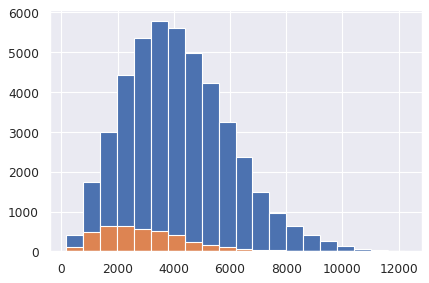

In [212]:
N_possible_connections, bins, xx = plt.hist(Cartesian_distances, bins=20)
N_connections, bins2, xx = plt.hist(Cartesian_distances_w_edge, bins=bins)

In [213]:
N_possible_connections, bins

(array([ 406., 1734., 2998., 4420., 5348., 5772., 5608., 4984., 4218.,
        3238., 2372., 1502.,  970.,  650.,  416.,  274.,  128.,   68.,
          36.,   14.]),
 array([  182.00274723,   783.46203573,  1384.92132422,  1986.38061271,
         2587.8399012 ,  3189.2991897 ,  3790.75847819,  4392.21776668,
         4993.67705518,  5595.13634367,  6196.59563216,  6798.05492066,
         7399.51420915,  8000.97349764,  8602.43278614,  9203.89207463,
         9805.35136312, 10406.81065161, 11008.26994011, 11609.7292286 ,
        12211.18851709]))

In [214]:
Prob = []
Prob2 = []
for x, y in zip(N_connections, N_possible_connections):
    Prob.append(x/y)
    Prob2.append(1-x/y)
Info = -np.log2(np.array(Prob) )
Info2 = -np.log2(np.array(Prob2) )

/tmp/ipykernel_2526300/7512788.py:6: RuntimeWarning: divide by zero encountered in log2
  Info = -np.log2(np.array(Prob) )


In [215]:
print(Prob)
print(Prob2)

[0.2881773399014778, 0.2837370242214533, 0.21180787191460973, 0.1434389140271493, 0.10714285714285714, 0.08766458766458766, 0.07542796005706134, 0.04715088282504013, 0.04077761972498815, 0.035206917850525016, 0.026559865092748734, 0.02729693741677763, 0.03402061855670103, 0.026153846153846153, 0.036057692307692304, 0.021897810218978103, 0.0078125, 0.0, 0.0, 0.0]
[0.7118226600985222, 0.7162629757785467, 0.7881921280853903, 0.8565610859728507, 0.8928571428571429, 0.9123354123354124, 0.9245720399429387, 0.9528491171749599, 0.9592223802750118, 0.964793082149475, 0.9734401349072512, 0.9727030625832224, 0.965979381443299, 0.9738461538461538, 0.9639423076923077, 0.9781021897810219, 0.9921875, 1.0, 1.0, 1.0]


In [216]:
print(Info)
print(Info2)

[1.7949712  1.81737368 2.23917189 2.80149162 3.22239242 3.51186201
 3.72875678 4.40657141 4.61607863 4.82799726 5.23460837 5.19511709
 4.87744682 5.25683307 4.79354912 5.51306958 7.                inf
        inf        inf]
[ 0.49041023  0.48143873  0.34338075  0.22337196  0.16349873  0.13236378
  0.11314236  0.06968031  0.06006278  0.05170853  0.03883584  0.03992863
  0.0499357   0.03823422  0.05298129  0.03194289  0.01131531 -0.
 -0.         -0.        ]


Text(0, 0.5, 'infomation')

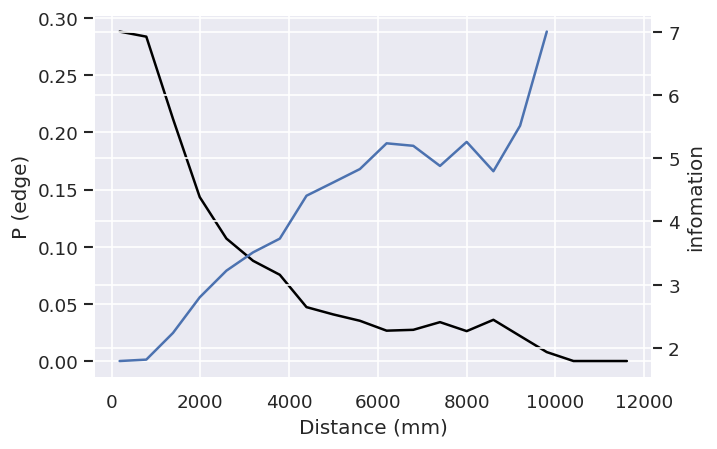

In [217]:
fig,ax = plt.subplots(dpi=120)
ax.plot(bins[:-1], Prob, c="black", )
ax.set_xlabel("Distance (mm)")
ax.set_ylabel("P (edge)")
ax2 = ax.twinx()
ax2.plot(bins[:-1], Info)
ax2.set_ylabel("infomation")

In [218]:
Cartesian_distances_w_edge_mat

Anterior_amygdalar_area  \
Anterior_amygdalar_area                                            0.000000   
Anterior_cingulate_area_dorsal_part                                0.000000   
Anterior_cingulate_area_ventral_part                               0.000000   
Nucleus_accumbens                                                  0.000000   
Anterodorsal_nucleus                                               0.000000   
...                                                                     ...   
Ventral_posterolateral_nucleus_of_the_thalamus                     0.000000   
Ventral_posteromedial_nucleus_of_the_thalamus                      0.000000   
Ventral_posteromedial_nucleus_of_the_thalamus_p...                 0.000000   
Ventral_tegmental_area                                          3062.168349   
Hypoglossal_nucleus                                                0.000000   

                                                    Anterior_cingulate_area_dorsal_part  \
Anterior_amygdalar_area                                                             0.0   
Anterior_cingulate_area_dorsal_part                                                 0.0   
Anterior_cingulate_area_ventral_part                                                0.0   
Nucleus_accumbens                                                                   0.0   
Anterodorsal_nucleus                                                                0.0   
...                                                                                 ...   
Ventral_posterolateral_nucleus_of_the_thalamus                                      0.0   
Ventral_posteromedial_nucleus_of_the_thalamus                                       0.0   
Ventral_posteromedial_nucleus_of_the_thalamus_p...                                  0.0   
Ventral_tegmental_area                                                              0.0   
Hypoglossal_nucleus                                                                 0.0   

                                                    Anterior_cingulate_area_ventral_part  \
Anterior_amygdalar_area                                                         0.000000   
Anterior_cingulate_area_dorsal_part                                           695.071939   
Anterior_cingulate_area_ventral_part                                            0.000000   
Nucleus_accumbens                                                               0.000000   
Anterodorsal_nucleus                                                         1499.583275   
...                                                                                  ...   
Ventral_posterolateral_nucleus_of_the_thalamus                                  0.000000   
Ventral_posteromedial_nucleus_of_the_thalamus                                   0.000000   
Ventral_posteromedial_nucleus_of_the_thalamus_p...                              0.000000   
Ventral_tegmental_area                                                          0.000000   
Hypoglossal_nucleus                                                             0.000000   

                                                    Nucleus_accumbens  \
Anterior_amygdalar_area                                      0.000000   
Anterior_cingulate_area_dorsal_part                          0.000000   
Anterior_cingulate_area_ventral_part                         0.000000   
Nucleus_accumbens                                            0.000000   
Anterodorsal_nucleus                                         0.000000   
...                                                               ...   
Ventral_posterolateral_nucleus_of_the_thalamus               0.000000   
Ventral_posteromedial_nucleus_of_the_thalamus                0.000000   
Ventral_posteromedial_nucleus_of_the_thalamus_p...           0.000000   
Ventral_tegmental_area                                    4092.218225   
Hypoglossal_nucleus                                          0.000000   

                            

In [219]:
def MakeInfoDict_Distance(bins, Info, Info2, adjMat, distMat):
    Dict = {}
    for node_i in adjMat.index.values:
        for node_j in adjMat.index.values:
            if node_i == node_j:
                continue
            else:
                dist = distMat.loc[node_i, node_j]
                conn = adjMat.loc[node_i, node_j]
                for i in range(len(bins)-1):
                    if dist >= bins[i] and dist < bins[i+1]:
                        if conn > 0:
                            Dict["{}-{}".format(node_i, node_j)] = Info[i]
                        else:
                            Dict["{}-{}".format(node_i, node_j)] = Info2[i]
    return Dict

InfoDict_Distance = MakeInfoDict_Distance(bins, Info, Info2, 
                                adj_mat, Cartesian_distances_mat)
pk.dump(InfoDict, open("EdgeDict_selfInfo.Distance.v2.pk", 'wb'))
#pk.dump(PlainDict, open("dat/EdgeDict_Uniform.pk", 'wb'))

NameError: name 'InfoDict' is not defined

In [ ]:
def MakeInfoMat_Distance(bins, Info, Info2, adjMat, distMat):
    OutMat = pd.DataFrame(data=np.zeros((213, 213)), index=adjMat.index.values, columns=adjMat.columns.values)
    for node_i in adjMat.index.values:
        for node_j in adjMat.index.values:
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                dist = distMat.loc[node_i, node_j]
                conn = adjMat.loc[node_i, node_j]
                for i in range(len(bins)-1):
                    if dist >= bins[i] and dist < bins[i+1]:
                        if conn > 0:
                            OutMat.loc[node_i, node_j] = Info[i]
                        else:
                            OutMat.loc[node_i, node_j] = Info2[i]
    return OutMat

InfoMat_Distance = MakeInfoMat_Distance(bins, Info, Info2, 
                                adj_mat, Cartesian_distances_mat)
InfoMat_Distance.to_csv("AdjMat_selfInfo.Distance.csv")
#pk.dump(InfoDict, open("EdgeDict_selfInfo.Distance.v2.csv", 'wb'))

In [ ]:
InfoMat_Distance

## Connection Density of different Region

In [246]:
Regions = list(reg2str.keys())
Regional_Info_Dict = {}
RegionConnDen = pd.DataFrame(data=np.zeros((13,13)), index=Regions, columns=Regions)
for region_1 in Regions:
    src_strs = reg2str[region_1]
    for region_2 in Regions:
        tgt_strs = reg2str[region_2]
        sub_mat = adj_mat.loc[src_strs, tgt_strs]
        N_Possible_Conn =  sub_mat.shape[0] * sub_mat.shape[1]
        N_filled_Conn = np.count_nonzero(sub_mat)
        #print(region_1, region_2, N_filled_Conn/N_Possible_Conn)
        RegionConnDen.loc[region_1, region_2] = N_filled_Conn/N_Possible_Conn

In [247]:
RegionConnDen

Hippocampus  Olfactory_areas  Isocortex  Thalamus  \
Hippocampus           0.429752         0.102273   0.083732  0.096104   
Olfactory_areas       0.034091         0.312500   0.039474  0.003571   
Isocortex             0.043062         0.072368   0.236842  0.224812   
Thalamus              0.049351         0.050000   0.091729  0.048980   
Striatum              0.000000         0.093750   0.006579  0.000000   
Midbrain              0.004329         0.005952   0.000000  0.180952   
Amygdalar             0.049587         0.295455   0.064593  0.025974   
Pallidum              0.261364         0.203125   0.019737  0.110714   
Hypothalamus          0.004545         0.000000   0.002632  0.147143   
Cortical_subplate     0.212121         0.125000   0.184211  0.095238   
Cerebellum            0.000000         0.000000   0.000000  0.064286   
Medulla               0.000000         0.000000   0.000000  0.036571   
Pons                  0.020979         0.000000   0.000000  0.076923   

                   Striatum  Midbrain  Amygdalar  Pallidum  Hypothalamus  \
Hippocampus        0.227273  0.004329   0.107438  0.227273      0.122727   
Olfactory_areas    0.125000  0.000000   0.295455  0.140625      0.043750   
Isocortex          0.108553  0.167920   0.064593  0.088816      0.038158   
Thalamus           0.082143  0.051701   0.093506  0.060714      0.054286   
Striatum           0.015625  0.059524   0.011364  0.140625      0.075000   
Midbrain           0.065476  0.272109   0.021645  0.125000      0.083333   
Amygdalar          0.204545  0.012987   0.421488  0.204545      0.168182   
Pallidum           0.109375  0.095238   0.215909  0.250000      0.300000   
Hypothalamus       0.156250  0.171429   0.104545  0.187500      0.387500   
Cortical_subplate  0.000000  0.047619   0.272727  0.041667      0.016667   
Cerebellum         0.000000  0.059524   0.000000  0.000000      0.000000   
Medulla            0.000000  0.104762   0.000000  0.005000      0.006000   
Pons               0.009615  0.197802   0.006993  0.048077      0.057692   

                   Cortical_subplate  Cerebellum   Medulla      Pons  
Hippocampus                 0.090909    0.000000  0.000000  0.000000  
Olfactory_areas             0.333333    0.000000  0.000000  0.000000  
Isocortex                   0.210526    0.006579  0.086316  0.176113  
Thalamus                    0.076190    0.004762  0.005714  0.052747  
Striatum                    0.000000    0.000000  0.000000  0.000000  
Midbrain                    0.031746    0.007937  0.110476  0.267399  
Amygdalar                   0.303030    0.000000  0.021818  0.027972  
Pallidum                    0.125000    0.000000  0.015000  0.067308  
Hypothalamus                0.000000    0.000000  0.032000  0.107692  
Cortical_subplate           0.111111    0.000000  0.000000  0.025641  
Cerebellum                  0.000000    0.194444  0.086667  0.102564  
Medulla                     0.000000    0.256667  0.340800  0.227692  
Pons                        0.000000    0.224359  0.166154  0.236686

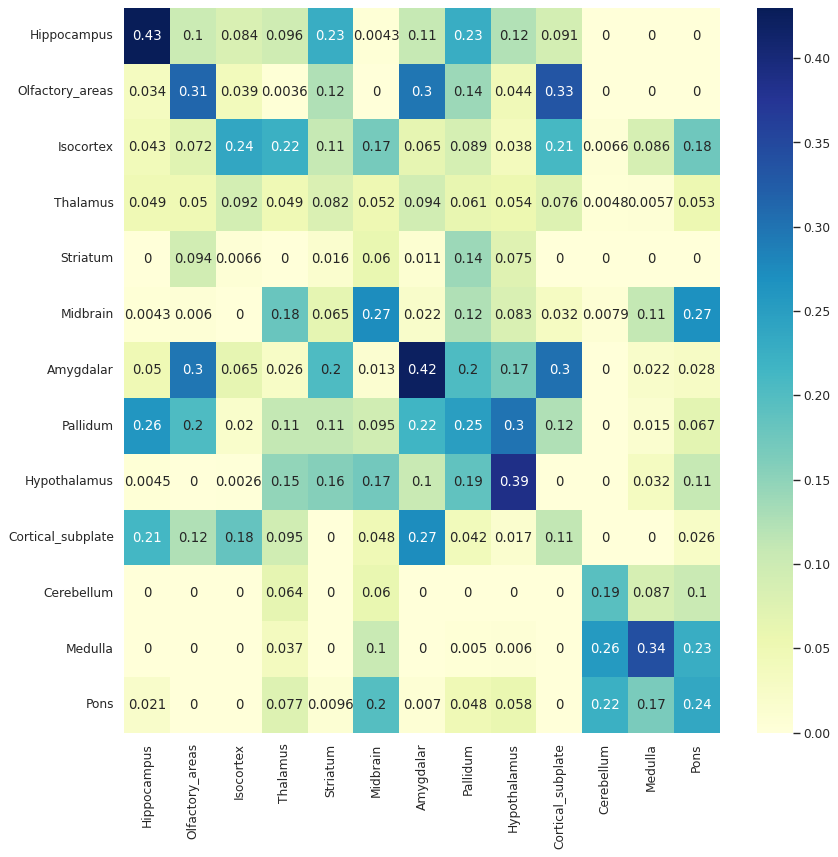

In [248]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
plt.figure(figsize=(12,12))
ax = sns.heatmap(RegionConnDen, annot=True, cmap="YlGnBu")

In [249]:
def MakeInfoDict_region(str2reg, RegionConnDen, Mat):
    Dict = {}
    for node_i in Mat.index.values:
        reg_i = str2reg[node_i]
        for node_j in Mat.index.values:
            reg_j = str2reg[node_j]
            Prob = RegionConnDen.loc[reg_i, reg_j]
            if Prob != 0:
                Info = -np.log2(Prob)
            else:
                Info = 0
            Dict["{}-{}".format(node_i, node_j)] = Info
    return Dict
#InfoDict_Region = MakeInfoDict_region(str2reg, RegionConnDen, adj_mat)
#pk.dump(InfoDict_Region, open("EdgeDict_selfInfo.Region.pk", 'wb'))

def MakeInfoMat_Region(bins, Info, adjMat, str2reg):
    OutMat = pd.DataFrame(data=np.zeros((213, 213)), index=adjMat.index.values, columns=adjMat.columns.values)
    for node_i in adjMat.index.values:
        reg_i = str2reg[node_i]
        for node_j in adjMat.index.values:
            reg_j = str2reg[node_j]
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                Prob = RegionConnDen.loc[reg_i, reg_j]
                conn = adjMat.loc[node_i, node_j]
                if conn > 0:
                    OutMat.loc[node_i, node_j] = -np.log2(Prob)
    return OutMat

InfoMat_Distance_V2 = MakeInfoMat_Region(bins, Infos, 
                                adj_mat, str2reg)
InfoMat_Distance_V2.to_csv(OutDIR + "ScoreMat_Region.csv")

In [250]:
def ScoringCircuit(STRs, InfoDict):
    score = 0
    for str_i in STRs:
        for str_j in STRs:
            try:
                score += InfoDict["{}-{}".format(str_i, str_j)]
            except:
                score += 0
    return score

# Sum of total likelihood
def ScoringCircuit_v2(STRs, InfoDict):
    score = []
    for str_i in STRs:
        for str_j in STRs:
            try:
                score.append(InfoDict["{}-{}".format(str_i, str_j)])
            except:
                score.append(0)
    return np.sum(score)

# In vs Out total likehood
def ScoringCircuit_v3(STRs, InfoMat):
    Inside = 0
    Outside = 0
    ALL_STRs = InfoMat.index.values
    Out_STRs = [_str for _str in ALL_STRs if _str not in STRs]
    subMat_cir = InfoMat.loc[STRs, STRs]
    subMat_cir_out_p1 = InfoMat.loc[STRs, Out_STRs]
    subMat_cir_out_p2 = InfoMat.loc[Out_STRs, STRs]
    Inside = np.sum(subMat_cir.values)
    Outside = np.sum(subMat_cir_out_p1.values) + np.sum(subMat_cir_out_p2.values)
    return Inside, Inside - Outside

In [251]:
%%time

topN = 50

STR_Ranks = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR").index.values
asd_score1, asd_score2 = ScoringCircuit_v3(STR_Ranks[:topN], InfoMat_Distance)


Ncont = 1000
cont_score1 = []
cont_score2 = []
cont_dir = "../dat/Unionize_bias/SubSampleSib/"
for i, file in enumerate(os.listdir(cont_dir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(cont_dir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    score1, score2 = ScoringCircuit_v3(top_strs, InfoMat_Distance)
    cont_score1.append(score1)
    cont_score2.append(score2)
    #cont_score_reg.append(ScoringCircuit_v2(top_strs, InfoDict_Region))
    #cont_score_dist.append(ScoringCircuit_v2(top_strs, InfoDict_Distance))
    if i >= Ncont-1:
        break
cont_score1 = np.array(cont_score1)
cont_score2 = np.array(cont_score2)

NameError: name 'InfoMat_Distance' is not defined

<AxesSubplot:title={'center':'Likelihood Inside / Outside Circuit'}, xlabel='Score'>

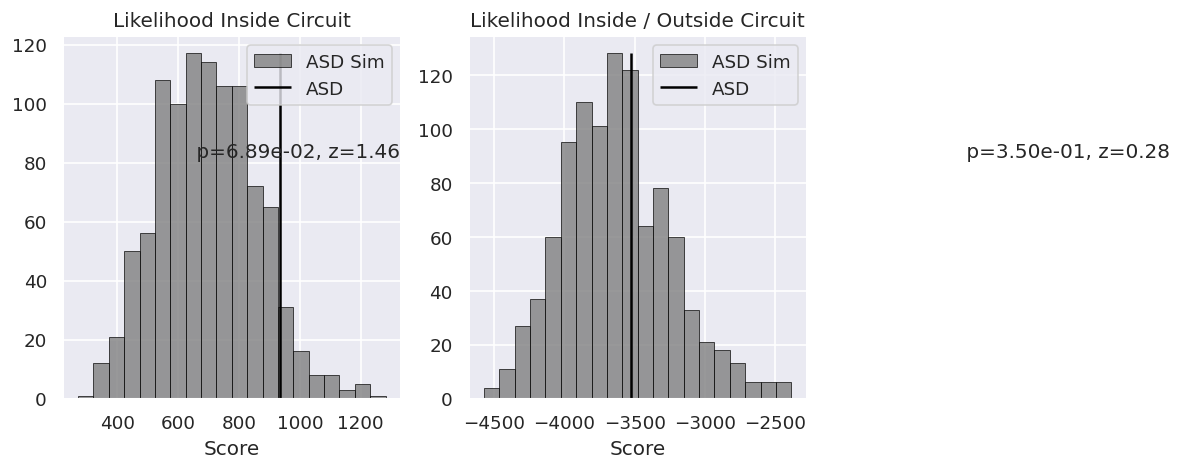

In [252]:
size = topN
#idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2) = plt.subplots(1,2,dpi=120, figsize=(8,4))
PlotPermutationP(cont_score1, asd_score1, ax1,
                     title="Likelihood Inside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")
PlotPermutationP(cont_score2, asd_score2, ax2,
                     title="Likelihood Inside / Outside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")

In [253]:
topNs = np.arange(200, 5, -5)

STR_Ranks = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR").index.values
asd_topN_cohe_reg = []
asd_topN_cohe_dist = []
for topN in topNs:
    top_strs = STR_Ranks[:topN]
    asd_score1, asd_score2 = ScoringCircuit_v3(top_strs, InfoMat_Distance)
    asd_topN_cohe_reg.append(asd_score1)
    asd_topN_cohe_dist.append(asd_score2)
    #asd_topN_cohe_reg.append(ScoringCircuit(top_strs, InfoDict_Region))
    #asd_topN_cohe_dist.append(ScoringCircuit(top_strs, InfoDict_Distance))
asd_topN_cohe_reg = np.array(asd_topN_cohe_reg)
asd_topN_cohe_dist = np.array(asd_topN_cohe_dist)

cont_dir = "../dat/Unionize_bias/SubSampleSib/"
#cont_dir = "../dat/Unionize_bias/ASD_Sim/"
ASD_Cont_Cohesivness_Reg = []
ASD_Cont_Cohesivness_Dist = []
Ncont = 1000
for i, file in enumerate(os.listdir(cont_dir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(cont_dir + file, index_col="STR")
    topN_cohe_reg = []
    topN_cohe_dist = []
    for topN in topNs:
        top_strs = df.index.values[:topN]
        score1, score2 = ScoringCircuit_v3(top_strs, InfoMat_Distance)
        topN_cohe_reg.append(score1)
        topN_cohe_dist.append(score2)
        #topN_cohe_reg.append(ScoringCircuit(top_strs, InfoDict_Region))
        #topN_cohe_dist.append(ScoringCircuit(top_strs, InfoDict_Distance))
    topN_cohe_reg = np.array(topN_cohe_reg)
    topN_cohe_dist = np.array(topN_cohe_dist)
    ASD_Cont_Cohesivness_Reg.append(topN_cohe_reg)
    ASD_Cont_Cohesivness_Dist.append(topN_cohe_dist)
    if i >= Ncont-1:
        break
ASD_Cont_Cohesivness_Reg = np.array(ASD_Cont_Cohesivness_Reg)
ASD_Cont_Cohesivness_Dist = np.array(ASD_Cont_Cohesivness_Dist)

NameError: name 'InfoMat_Distance' is not defined

In [ ]:
def clean_inf(arr):
    print(arr.shape)
    new_arr = []
    for _arr in arr:
        FLAG=False
        for n in _arr:
            if n == 0:
                FLAG=True
                break
        if FLAG == False:
            new_arr.append(_arr)
    new_arr = np.array(new_arr)
    print(new_arr.shape)
    return new_arr

In [ ]:
fig, ax = plt.subplots(dpi=480)

#xx = asd_topN_cohe_distal / ASD_Cont_Cohesivness_Distal
#ax.errorbar(topNs-1, xx.mean(axis=0), color="lightblue", marker="o",
#            yerr=xx.std(axis=0), ls="dashed", label="ASD to ASD sim")
#xx = (asd_topN_cohe_reg - ASD_Cont_Cohesivness_Reg)/np.std(ASD_Cont_Cohesivness_Reg)
xx = (asd_topN_cohe_reg / ASD_Cont_Cohesivness_Reg)
mean = xx.mean(axis=0)
lower = np.percentile(xx, 25, axis=0)
upper = np.percentile(xx, 75, axis=0)
ax.errorbar(topNs-0.5, mean, color="blue", marker="o", markersize=3,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Sum-likelihood")

#xx = (asd_topN_cohe_dist - clean_inf(ASD_Cont_Cohesivness_Dist))/np.std(clean_inf(ASD_Cont_Cohesivness_Dist))
xx = (asd_topN_cohe_dist / clean_inf(ASD_Cont_Cohesivness_Dist))
mean = xx.mean(axis=0)
lower = np.percentile(xx, 25, axis=0)
upper = np.percentile(xx, 75, axis=0)
ax.errorbar(topNs+0.5, mean, color="red", marker="o", markersize=3,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="In/Out")

ax.grid(True)
#ax.hlines(xmin=10, xmax=200, y=1, color="grey", ls="dashed")
ax.set_xlabel("top N sturctures (by expression bias)")
ax.set_ylabel("Score ratio")
#ax.set_ylim((0.7, 3.0))
#ax.set_xlim((0, 100))
plt.legend()


AttributeError: 'list' object has no attribute 'mean'

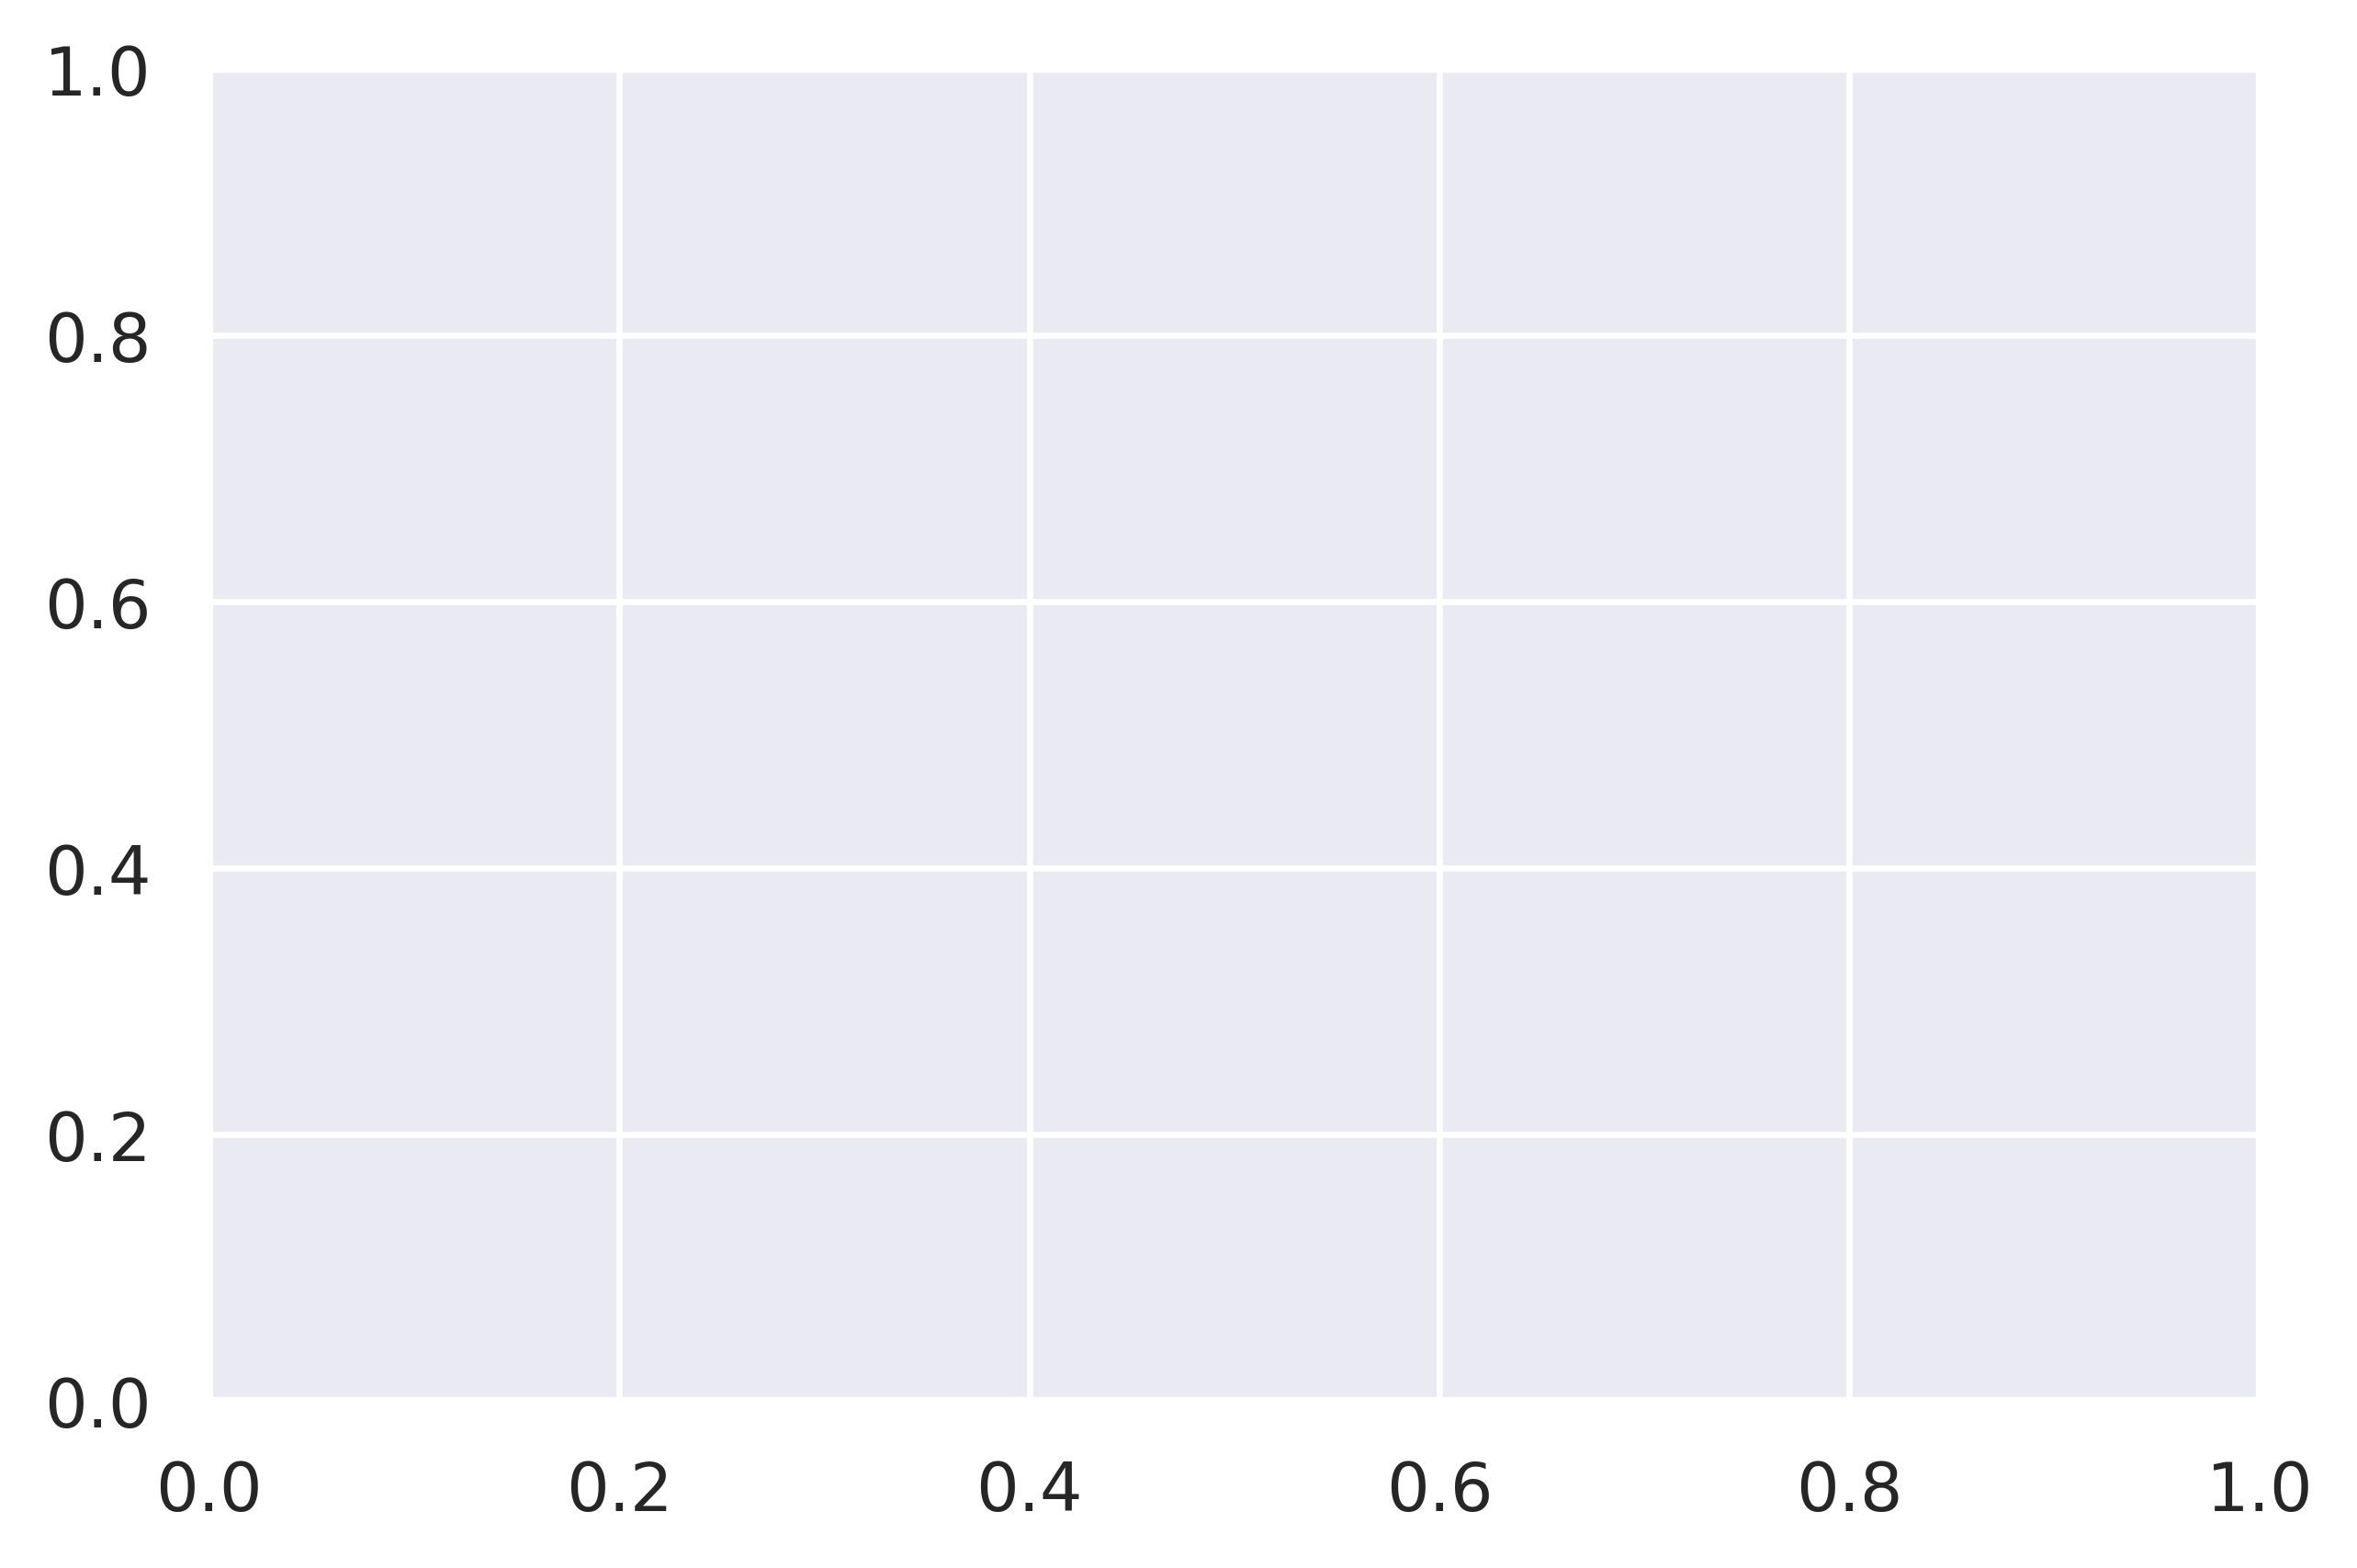

In [254]:
fig, ax = plt.subplots(dpi=480)

#xx = asd_topN_cohe_distal / ASD_Cont_Cohesivness_Distal
#ax.errorbar(topNs-1, xx.mean(axis=0), color="lightblue", marker="o",
#            yerr=xx.std(axis=0), ls="dashed", label="ASD to ASD sim")
#xx = (asd_topN_cohe_reg - ASD_Cont_Cohesivness_Reg)/np.std(ASD_Cont_Cohesivness_Reg)
xx = asd_topN_cohe_reg 
mean = xx.mean(axis=0)
#lower = np.percentile(xx, 25, axis=0)
#upper = np.percentile(xx, 75, axis=0)
#ax.errorbar(topNs-0.5, mean, color="blue", marker="o", markersize=3,
#            yerr=(mean - lower, upper - mean ), ls="dashed", label="Sum-likelihood")

#xx = (asd_topN_cohe_dist - clean_inf(ASD_Cont_Cohesivness_Dist))/np.std(clean_inf(ASD_Cont_Cohesivness_Dist))
xx = asd_topN_cohe_dist
mean = xx.mean(axis=0)
#lower = np.percentile(xx, 25, axis=0)
#upper = np.percentile(xx, 75, axis=0)
#ax.errorbar(topNs+0.5, mean, color="red", marker="o", markersize=3,
#            yerr=(mean - lower, upper - mean ), ls="dashed", label="In/Out")
ax.plot(topNs+0.5, xx, color="red", marker="o", markersize=3
            , ls="dashed", label="In/Out")

ax.plot(topNs+0.5, ASD_Cont_Cohesivness_Dist.mean(axis=0), color="blue", marker="o", markersize=3
            , ls="dashed", label="In/Out")

ax.grid(True)
#ax.hlines(xmin=10, xmax=200, y=1, color="grey", ls="dashed")
ax.set_xlabel("top N sturctures (by expression bias)")
ax.set_ylabel("Cohesivness ratio")
#ax.set_ylim((0.7, 3.0))
#ax.set_xlim((0, 100))
plt.legend()


## Expression Correlation / Specificity Correlation

In [ ]:
def MakeCorrelationMat(ExpMat):
    STRs = ExpMat.columns.values
    CorrelationMat = pd.DataFrame(data=np.zeros((213,213)), index=STRs, columns=STRs)
    for src_str in STRs: 
        for tgt_str in STRs:
            bias_src_all = ExpMat.loc[:, src_str]
            bias_tgt_all = ExpMat.loc[:, tgt_str]
            bias_correlation, p = spearmanr(bias_src_all, bias_tgt_all, 
                                                   nan_policy="omit")
            CorrelationMat.loc[src_str, tgt_str] = bias_correlation
    return CorrelationMat
ExpLevel = pd.read_csv("/home/jw3514/Work/ASD_Circuits/dat/allen-mouse-exp/JC_ExpMat.ArithmeticMean.0418.csv", 
                      index_col=0)
ExpBias = pd.read_csv("/home/jw3514/Work/ASD_Circuits/dat/allen-mouse-exp/AllenMouseBrain_Z2bias.csv", 
                      index_col=0)
ExpCorrMat = MakeCorrelationMat(ExpLevel)
BiasCorrMat = MakeCorrelationMat(ExpBias)
ExpCorrMat.to_csv("ExpCorrMat.csv")
BiasCorrMat.to_csv("BiasCorrMat.csv")

In [ ]:
BiasCorrMat2

In [ ]:
adj_mat

In [ ]:
### Let's Try compute P(edge | distance percentile)

# Mask Mat2 according to values in Mat1
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2
Cartesian_distances_mat = pd.read_csv("BiasCorrMat.csv",
                                   index_col=0)
Cartesian_distances = [x for x in Cartesian_distances_mat.values.flatten() if x > 0]
Cartesian_distances_w_edge_mat = MaskDistMat(adj_mat, Cartesian_distances_mat, cutoff=0)
Cartesian_distances_w_edge = [x for x in Cartesian_distances_w_edge_mat.values.flatten() if x > 0]
Cartesian_distances_w_edge = np.array(Cartesian_distances_w_edge)

In [ ]:
N_possible_connections, bins, xx = plt.hist(Cartesian_distances, bins=20)
N_connections, bins2, xx = plt.hist(Cartesian_distances_w_edge, bins=bins)

In [ ]:
Prob = []
for x, y in zip(N_connections, N_possible_connections):
    Prob.append(x/y)
Info = -np.log2(np.array(Prob) )

In [ ]:
fig,ax = plt.subplots(dpi=120)
ax.plot(bins[:-1], Prob, c="black", )
ax.set_xlabel("Distance (mm)")
ax.set_ylabel("P (edge)")
ax2 = ax.twinx()
ax2.plot(bins[:-1], Info)
ax2.set_ylabel("infomation")

In [ ]:
def MakeInfoDict_Expression(bins, Info, Mat):
    Dict1, Dict2 = {}, {}
    for node_i in Mat.index.values:
        for node_j in Mat.index.values:
            dist = Mat.loc[node_i, node_j]
            if dist == 0:
                continue
            for i in range(len(bins)-1):
                if dist >= bins[i] and dist < bins[i+1]:
                    Dict1["{}-{}".format(node_i, node_j)] = Info[i]
                    Dict2["{}-{}".format(node_i, node_j)] = 1
    return Dict1, Dict2

InfoDict_Expression, PlainDict = MakeInfoDict_Distance(bins, Info, Cartesian_distances_w_edge_mat)
pk.dump(InfoDict, open("EdgeDict_selfInfo.Expression.pk", 'wb'))

In [ ]:
topN = 50

STR_Ranks = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR").index.values
asd_score_reg = ScoringCircuit(STR_Ranks[:topN], InfoDict_Expression)
asd_score_dis = ScoringCircuit(STR_Ranks[:topN], InfoDict_Distance)


Ncont = 1000
cont_score_reg = []
cont_score_dist = []
cont_dir = "../dat/Unionize_bias/SubSampleSib/"
for i, file in enumerate(os.listdir(cont_dir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(cont_dir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    cont_score_reg.append(ScoringCircuit(top_strs, InfoDict_Expression))
    cont_score_dist.append(ScoringCircuit(top_strs, InfoDict_Distance))
    if i >= Ncont-1:
        break
cont_score_reg = np.array(cont_score_reg)
cont_score_dist = np.array(cont_score_dist)

In [ ]:
size = topN
#idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2) = plt.subplots(1,2,dpi=120, figsize=(8,4))
PlotPermutationP(cont_score_reg, asd_score_reg, ax1,
                     title="ASD vs {} (Region)".format("Cont"), xlabel="cohesiveness", 
                     dist_label="ASD Sim", bar_label="ASD")
PlotPermutationP(cont_score_dist, asd_score_dis, ax2,
                     title="ASD vs {} (Distal)".format("Cont"), xlabel="cohesiveness", 
                     dist_label="ASD Sim", bar_label="ASD")

In [ ]:
topNs = np.arange(200, 5, -5)

STR_Ranks = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR").index.values
asd_topN_cohe_reg = []
asd_topN_cohe_dist = []
for topN in topNs:
    top_strs = STR_Ranks[:topN]
    asd_topN_cohe_reg.append(ScoringCircuit(top_strs, InfoDict_Region))
    asd_topN_cohe_dist.append(ScoringCircuit(top_strs, InfoDict_Distance))
asd_topN_cohe_reg = np.array(asd_topN_cohe_reg)
asd_topN_cohe_dist = np.array(asd_topN_cohe_dist)

cont_dir = "../dat/Unionize_bias/SubSampleSib/"
#cont_dir = "../dat/Unionize_bias/ASD_Sim/"
ASD_Cont_Cohesivness_Reg = []
ASD_Cont_Cohesivness_Dist = []
Ncont = 1000
for i, file in enumerate(os.listdir(cont_dir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(cont_dir + file, index_col="STR")
    topN_cohe_reg = []
    topN_cohe_dist = []
    for topN in topNs:
        top_strs = df.index.values[:topN]
        topN_cohe_reg.append(ScoringCircuit(top_strs, InfoDict_Region))
        topN_cohe_dist.append(ScoringCircuit(top_strs, InfoDict_Distance))
    topN_cohe_reg = np.array(topN_cohe_reg)
    topN_cohe_dist = np.array(topN_cohe_dist)
    ASD_Cont_Cohesivness_Reg.append(topN_cohe_reg)
    ASD_Cont_Cohesivness_Dist.append(topN_cohe_dist)
    if i >= Ncont-1:
        break
ASD_Cont_Cohesivness_Reg = np.array(ASD_Cont_Cohesivness_Reg)
ASD_Cont_Cohesivness_Dist = np.array(ASD_Cont_Cohesivness_Dist)

## Distance by percentile

In [302]:
# get distance diciles
Carteisn_Dist_Mat_All = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv", index_col=0)
All_distances = Carteisn_Dist_Mat_All.values.flatten()
DistanceDeciles = np.percentile(All_distances, np.arange(0, 100, 10))
DistanceDeciles = np.append(DistanceDeciles, max(All_distances))

In [303]:
distances = Carteisn_Dist_Mat_All[adj_mat>0]
distances = distances[~np.isnan(distances)]

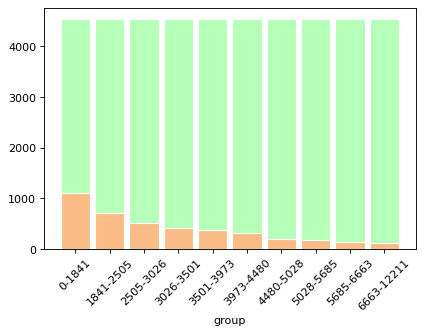

In [304]:
Counts_all, bins = np.histogram(All_distances, bins=DistanceDeciles)
Counts_conn, bins = np.histogram(distances, bins=DistanceDeciles)
r = range(len(bins)-1)
names = ["%.0f-%.0f"%(bins[i], bins[i+1]) for i in range(len(bins)-1)]
barWidth = 0.85
plt.bar(r, Counts_all, color='#b5ffb9', edgecolor='white', width=barWidth, label="group A")
plt.bar(r, Counts_conn, color='#f9bc86', edgecolor='white', width=barWidth, label="group B")
plt.xticks(r, names)
plt.xlabel("group")
plt.xticks(rotation = 45) 
plt.show()

In [305]:
Probs = Counts_conn/Counts_all
Infos = -np.log2(Probs)

Text(0, 0.5, 'infomation')

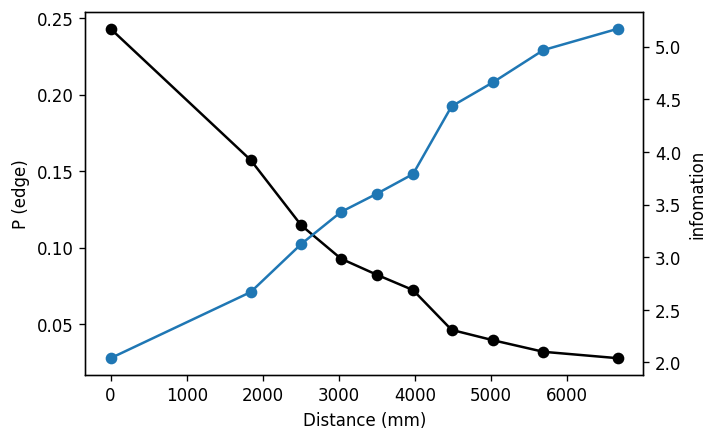

In [306]:
fig,ax = plt.subplots(dpi=120)
ax.plot(bins[:-1], Probs, c="black", marker='o')
ax.set_xlabel("Distance (mm)")
ax.set_ylabel("P (edge)")
ax2 = ax.twinx()
ax2.plot(bins[:-1], Infos, marker='o')
ax2.set_ylabel("infomation")

In [309]:
def MakeInfoMat_Distance(bins, Info, adjMat, distMat):
    OutMat = pd.DataFrame(data=np.zeros((213, 213)), index=adjMat.index.values, columns=adjMat.columns.values)
    OutMat2 = pd.DataFrame(data=np.zeros((213, 213)), index=adjMat.index.values, columns=adjMat.columns.values)
    for node_i in adjMat.index.values:
        for node_j in adjMat.index.values:
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                dist = distMat.loc[node_i, node_j]
                conn = adjMat.loc[node_i, node_j]
                for i in range(len(bins)-1):
                    if dist >= bins[i] and dist < bins[i+1]:
                        OutMat2.loc[node_i, node_j] = Info[i] #np.exp(-Info[i])
                        if conn > 0:
                            OutMat.loc[node_i, node_j] = Info[i]
    return OutMat, OutMat2

OutDIR = "/home/jw3514/Work/ASD_Circuits/dat/allen-mouse-conn/ScoreingMat_jw/"
InfoMat_Distance_V2, XX = MakeInfoMat_Distance(bins, Infos, 
                                adj_mat, Carteisn_Dist_Mat_All)
InfoMat_Distance_V2.to_csv(OutDIR + "ScoreMat_Distance.csv")
XX.to_csv(OutDIR + "ScoreMat_Distance.Entropy.csv")

In [275]:
adj_short, adj_long = ConnectomeSeperation_Distance(InfoMat_Distance_V2, Carteisn_Dist_Mat_All)
adj_short.to_csv(OutDIR + "ScoreMat_Distance.short.csv")
adj_long.to_csv(OutDIR + "ScoreMat_Distance.long.csv")

In [279]:
print(np.count_nonzero(InfoMat_Distance_V2))
print(np.count_nonzero(adj_short))
print(np.count_nonzero(adj_long))

4077
2038
2039


In [ ]:
Cartesian_distances_w_edge = MaskDistMat(adj_mat, dist_mat, cutoff=0)
mid = np.median([x for x in Cartesian_distances_w_edge.values.flatten() if x > 0])
adj_mat_short = pd.DataFrame(data=np.zeros((213,213)),index=adj_mat.index.values,columns=adj_mat.columns.values)
adj_mat_long = pd.DataFrame(data=np.zeros((213,213)),index=adj_mat.index.values,columns=adj_mat.columns.values)

for str_i in adj_mat.index.values:
    for str_i in adj_mat.index.values:
        conn_w = adj_mat.loc[str_i, str_j]
        conn_d = dist_mat.loc[str_i, str_j]
        if conn

In [362]:
adj_short, adj_long = ConnectomeSeperation_Distance(XX, Carteisn_Dist_Mat_All)
adj_short.to_csv(OutDIR + "ScoreMat_Distance.short.csv")
adj_long.to_csv(OutDIR + "ScoreMat_Distance.long.csv")
print(np.count_nonzero(XX))
print(np.count_nonzero(adj_short))
print(np.count_nonzero(adj_long))

45154
22576
22578


In [226]:
def ScoringCircuit_v3(STRs, InfoMat):
    Inside = 0
    Outside = 0
    ALL_STRs = InfoMat.index.values
    Out_STRs = [_str for _str in ALL_STRs if _str not in STRs]
    subMat_cir = InfoMat.loc[STRs, STRs]
    subMat_cir_out_p1 = InfoMat.loc[STRs, Out_STRs]
    subMat_cir_out_p2 = InfoMat.loc[Out_STRs, STRs]
    Inside = np.sum(subMat_cir.values)
    Outside = np.sum(subMat_cir_out_p1.values) + np.sum(subMat_cir_out_p2.values)
    return Inside, Inside - Outside

In [227]:
%%time

topN = 50

STR_Ranks = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR").index.values
asd_score1, asd_score2 = ScoringCircuit_v3(STR_Ranks[:topN], InfoMat_Distance_V2)


Ncont = 1000
cont_score1 = []
cont_score2 = []
cont_dir = "../dat/Unionize_bias/SubSampleSib/"
for i, file in enumerate(os.listdir(cont_dir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(cont_dir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    score1, score2 = ScoringCircuit_v3(top_strs, InfoMat_Distance_V2)
    cont_score1.append(score1)
    cont_score2.append(score2)
    #cont_score_reg.append(ScoringCircuit_v2(top_strs, InfoDict_Region))
    #cont_score_dist.append(ScoringCircuit_v2(top_strs, InfoDict_Distance))
    if i >= Ncont-1:
        break
cont_score1 = np.array(cont_score1)
cont_score2 = np.array(cont_score2)

CPU times: user 5.71 s, sys: 0 ns, total: 5.71 s
Wall time: 5.71 s


<AxesSubplot:title={'center':'Likelihood Inside / Outside Circuit'}, xlabel='Score'>

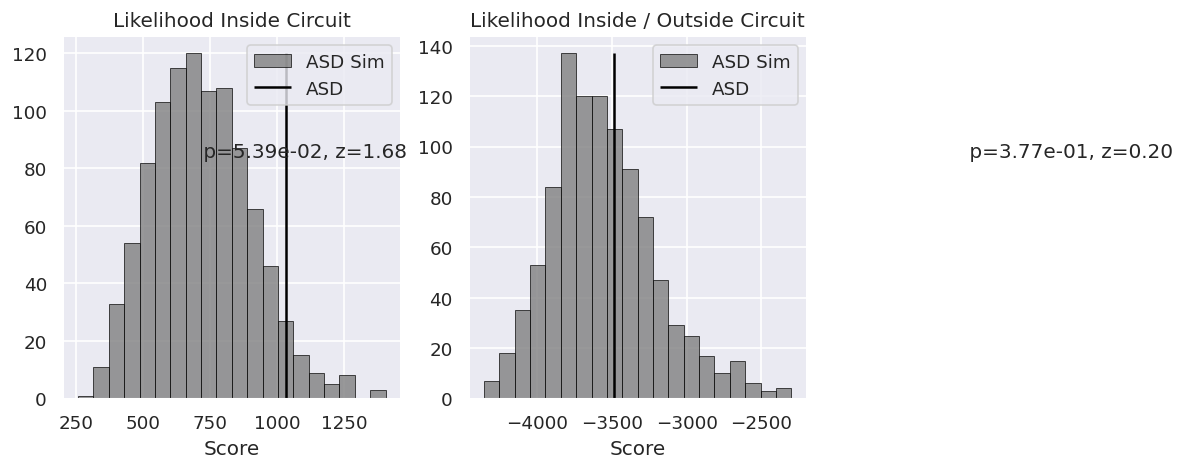

In [228]:
size = topN
#idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2) = plt.subplots(1,2,dpi=120, figsize=(8,4))
PlotPermutationP(cont_score1, asd_score1, ax1,
                     title="Likelihood Inside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")
PlotPermutationP(cont_score2, asd_score2, ax2,
                     title="Likelihood Inside / Outside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")

In [229]:
def get_score_dist(STRs, scoreMat):
    res = scoreMat.loc[STRs, STRs].values
    res = res[~np.isnan(res)]
    return res

In [230]:
EdgeMat = Carteisn_Dist_Mat_All[adj_mat>0]
ASD_dist = get_score_dist(STR_Ranks[:topN], EdgeMat)

In [231]:
Ncont = 1000
cont_score_dist = []
cont_dir = "../dat/Unionize_bias/SubSampleSib/"
for i, file in enumerate(os.listdir(cont_dir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(cont_dir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    cont_dist = get_score_dist(top_strs, EdgeMat)
    cont_score_dist.extend(list(cont_dist))
    if i >= Ncont-1:
        break
cont_score_dist = np.array(cont_score_dist)

(array([2.63556397e-04, 3.55104609e-04, 2.97958034e-04, 2.27972102e-04,
        1.80763777e-04, 1.33856018e-04, 7.01819532e-05, 4.49540860e-05,
        2.50318464e-05, 1.09444904e-05]),
 array([ 580.40933831, 1201.40264515, 1822.39595199, 2443.38925882,
        3064.38256566, 3685.3758725 , 4306.36917933, 4927.36248617,
        5548.35579301, 6169.34909985, 6790.34240668]),
 <BarContainer object of 10 artists>)

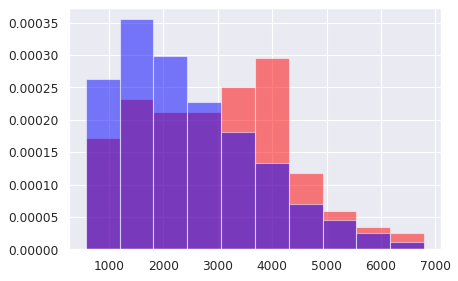

In [232]:
n, bins, patches = plt.hist(ASD_dist, color="red", density=1, alpha=0.5)
plt.hist(cont_score_dist, bins=bins, color="blue", density=1, alpha=0.5)

## Correlation distance

In [233]:
ExpCorrMat = pd.read_csv("ExpCorrMat.csv", index_col=0)
BiasCorrMat = pd.read_csv("BiasCorrMat.csv", index_col=0)

In [234]:
All_correlation = BiasCorrMat.values.flatten()
correlationDeciles = np.percentile(All_correlation, np.arange(0, 100, 10))
correlationDeciles = np.append(correlationDeciles, max(All_correlation))

In [235]:
correlationDeciles

array([-0.45876222, -0.22274013, -0.17428043, -0.13269288, -0.09062106,
       -0.04075751,  0.01303576,  0.0787019 ,  0.16487582,  0.30594518,
        1.        ])

In [236]:
corrlations = BiasCorrMat[adj_mat>0]
corrlations = corrlations[~np.isnan(corrlations)]

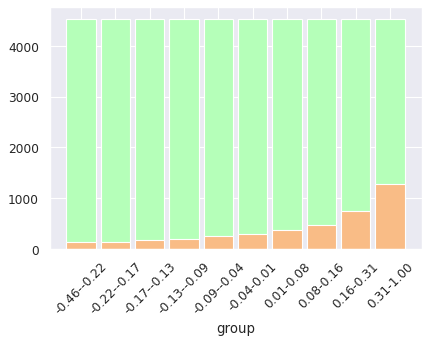

In [237]:
Counts_all, bins = np.histogram(All_correlation, bins=correlationDeciles)
Counts_conn, bins = np.histogram(corrlations, bins=correlationDeciles)
r = range(len(bins)-1)
names = ["%.2f-%.2f"%(bins[i], bins[i+1]) for i in range(len(bins)-1)]
barWidth = 0.85
plt.bar(r, Counts_all, color='#b5ffb9', edgecolor='white', width=barWidth, label="group A")
plt.bar(r, Counts_conn, color='#f9bc86', edgecolor='white', width=barWidth, label="group B")
plt.xticks(r, names)
plt.xlabel("group")
plt.xticks(rotation = 45) 
plt.show()

In [238]:
Probs = Counts_conn/Counts_all
Infos = -np.log2(Probs)

Text(0, 0.5, 'infomation')

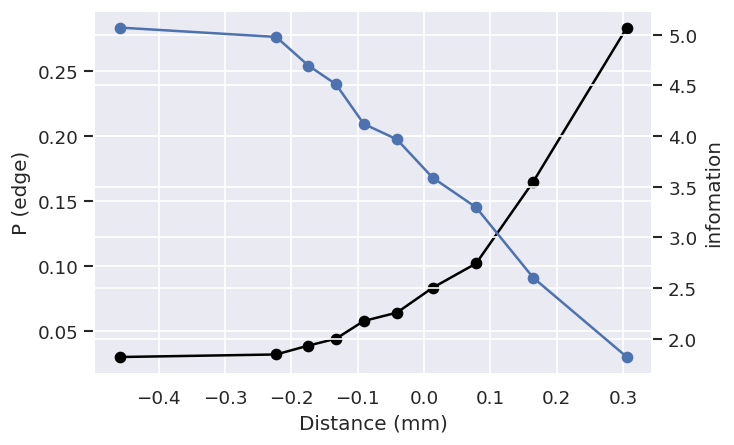

In [239]:
fig,ax = plt.subplots(dpi=120)
ax.plot(bins[:-1], Probs, c="black", marker='o')
ax.set_xlabel("Distance (mm)")
ax.set_ylabel("P (edge)")
ax2 = ax.twinx()
ax2.plot(bins[:-1], Infos, marker='o')
ax2.set_ylabel("infomation")

In [240]:
def MakeInfoMat_Distance(bins, Info, adjMat, distMat):
    OutMat = pd.DataFrame(data=np.zeros((213, 213)), index=adjMat.index.values, columns=adjMat.columns.values)
    for node_i in adjMat.index.values:
        for node_j in adjMat.index.values:
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                dist = distMat.loc[node_i, node_j]
                conn = adjMat.loc[node_i, node_j]
                for i in range(len(bins)-1):
                    if dist >= bins[i] and dist < bins[i+1]:
                        if conn > 0:
                            OutMat.loc[node_i, node_j] = Info[i]
    return OutMat

InfoMat_BiasCorr = MakeInfoMat_Distance(bins, Infos, 
                                adj_mat, BiasCorrMat)
InfoMat_BiasCorr.to_csv(OutDIR + "ScoreMat_BiasCorr.csv")

In [241]:
topN = 50

STR_Ranks = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR").index.values
asd_score1, asd_score2 = ScoringCircuit_v3(STR_Ranks[:topN], InfoMat_BiasCorr)


Ncont = 1000
cont_score1 = []
cont_score2 = []
cont_dir = "../dat/Unionize_bias/SubSampleSib/"
for i, file in enumerate(os.listdir(cont_dir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(cont_dir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    score1, score2 = ScoringCircuit_v3(top_strs, InfoMat_BiasCorr)
    cont_score1.append(score1)
    cont_score2.append(score2)
    #cont_score_reg.append(ScoringCircuit_v2(top_strs, InfoDict_Region))
    #cont_score_dist.append(ScoringCircuit_v2(top_strs, InfoDict_Distance))
    if i >= Ncont-1:
        break
cont_score1 = np.array(cont_score1)
cont_score2 = np.array(cont_score2)

<AxesSubplot:title={'center':'Likelihood Inside / Outside Circuit'}, xlabel='Score'>

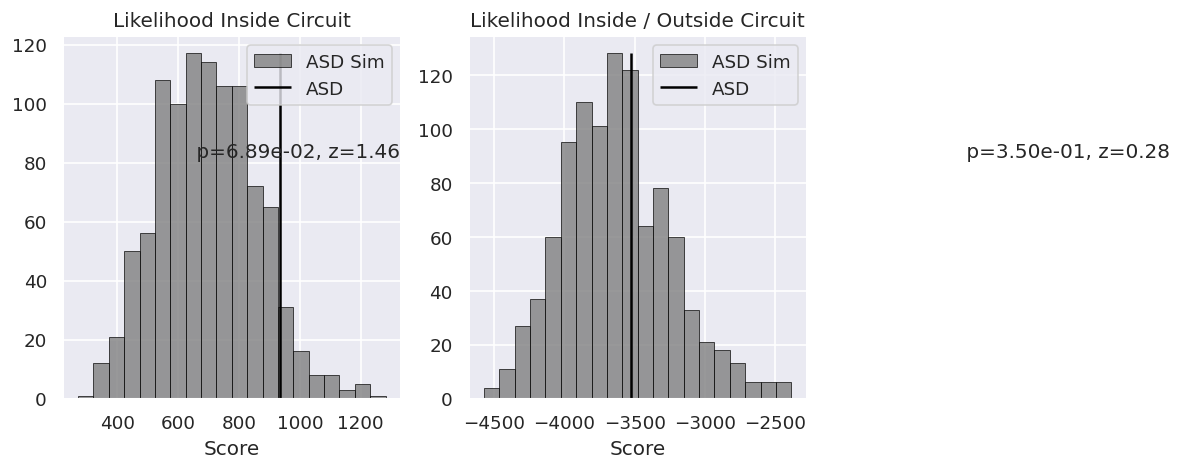

In [242]:
size = topN
#idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2) = plt.subplots(1,2,dpi=120, figsize=(8,4))
PlotPermutationP(cont_score1, asd_score1, ax1,
                     title="Likelihood Inside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")
PlotPermutationP(cont_score2, asd_score2, ax2,
                     title="Likelihood Inside / Outside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")

In [243]:
EdgeMat = BiasCorrMat[adj_mat>0]
ASD_dist = get_score_dist(STR_Ranks[:topN], EdgeMat)
Ncont = 1000
cont_score_dist = []
cont_dir = "../dat/Unionize_bias/SubSampleSib/"
for i, file in enumerate(os.listdir(cont_dir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(cont_dir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    cont_dist = get_score_dist(top_strs, EdgeMat)
    cont_score_dist.extend(list(cont_dist))
    if i >= Ncont-1:
        break
cont_score_dist = np.array(cont_score_dist)

(array([0.48213279, 1.00417846, 1.37688345, 1.27695342, 1.4337593 ,
        1.45308748, 0.91200928, 0.6579712 , 0.4119896 , 0.16951887]),
 array([-0.22152757, -0.11257711, -0.00362666,  0.1053238 ,  0.21427425,
         0.32322471,  0.43217517,  0.54112562,  0.65007608,  0.75902653,
         0.86797699]),
 <BarContainer object of 10 artists>)

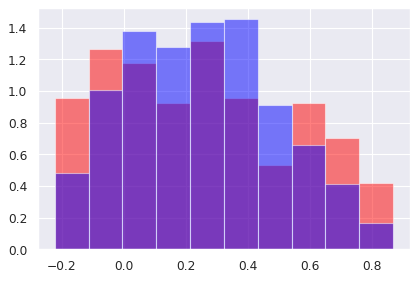

In [244]:
n, bins, patches = plt.hist(ASD_dist, color="red", density=1, alpha=0.5)
plt.hist(cont_score_dist, bins=bins, color="blue", density=1, alpha=0.5)

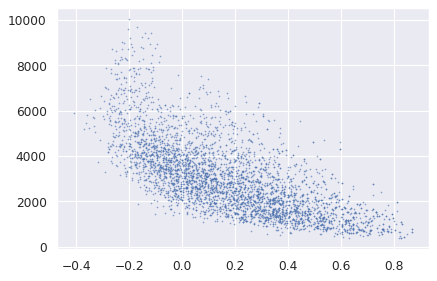

In [245]:
plt.scatter(corrlations, distances, s=0.1)

# Test 

In [343]:
ScoreMat = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw/ScoreMat_Distance.csv", index_col=0)
ScoreMat2 = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw/ScoreMat_Distance.Entropy.csv", index_col=0)
#ScoreMat2 = np.exp2(-ScoreMat2)
#ScoreMat2[ScoreMat2==1] = 0
ASD_BiasDF = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR")
test_ns = np.arange(20, 200, 10)

In [354]:
STR_Ranks = ASD_BiasDF.index.values
asd_topN_cohe_1, asd_topN_cohe_2 = [], []
for topN in test_ns:
    top_strs = STR_Ranks[:topN]
    #asd_score1, asd_score2 = ScoringCircuit_v4(top_strs, ScoreMat, ScoreMat2)
    asd_score1, asd_score2 = ScoringCircuit_v5(top_strs, ScoreMat, ScoreMat2)
    asd_topN_cohe_1.append(asd_score1)
    asd_topN_cohe_2.append(asd_score2)
asd_topN_cohe_1 = np.array(asd_topN_cohe_1)
asd_topN_cohe_2 = np.array(asd_topN_cohe_2)

In [355]:
print(asd_topN_cohe_1.shape, asd_topN_cohe_2.shape)

(18,) (18,)


In [356]:
asd_topN_cohe_2

array([1.36459488, 1.2392141 , 1.43677066, 1.36466075, 1.26094164,
       1.23560989, 1.19329452, 1.27141435, 1.18619058, 1.09337396,
       1.08350315, 1.08583878, 1.0220965 , 1.01280889, 1.01932327,
       1.03545315, 1.02488027, 1.01518921])

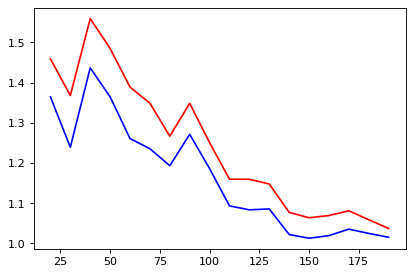

In [358]:
plt.plot(test_ns, asd_topN_cohe_1, color="red")
plt.plot(test_ns, asd_topN_cohe_2, color="blue")

# Scoring

In [297]:
def PlotingScore_profile(ASD, Cont, title="", method = "ratio"):
    fig, ax = plt.subplots(dpi=480)
    if method == "ratio":
        xx = ASD/Cont
        mean = xx.mean(axis=0)
        lower = np.percentile(xx, 25, axis=0)
        upper = np.percentile(xx, 75, axis=0)
        ax.errorbar(topNs, mean, color="red", marker="o", markersize=3, lw=0.1,
                    yerr=(mean - lower, upper - mean ), ls="dashed", label="ASD/Sib")
    elif method == "zscore":
        xx = (ASD - Cont.mean(axis=0))/Cont.std(axis=0)
        ax.plot(topNs, xx, color="red", marker="o", markersize=3, lw=0.1,
                     ls="dashed", label="ASD to Sib Zscore")
    elif method == "diff":
        #xx = np.exp2(ASD - Cont.mean(axis=0))
        xx = ASD - Cont.mean(axis=0)
        ax.plot(topNs, xx, color="blue", marker="o", markersize=3, lw=0.1,
                     ls="dashed", label="ASD to Sib Zscore")
        #ax.plot(topNs, xx/((topNs)*topNs), color="red", marker="o", markersize=3, lw=0.1,
        #             ls="dashed", label="ASD to Sib Zscore")
    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel("top N sturctures (by expression bias)")
    ax.set_ylabel("Score ratio")
    plt.legend()
    #ax.set_xlim(1,100)


In [298]:
topNs = np.arange(200, 5, -1)
ASD_Distance_In = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.Distance.ASD.In.npy")
Cont_Distance_In = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.Distance.Cont.In.npy")

ASD_Distance_InOut = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.Distance.ASD.InOut.npy")
Cont_Distance_InOut = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.Distance.Cont.InOut.npy")

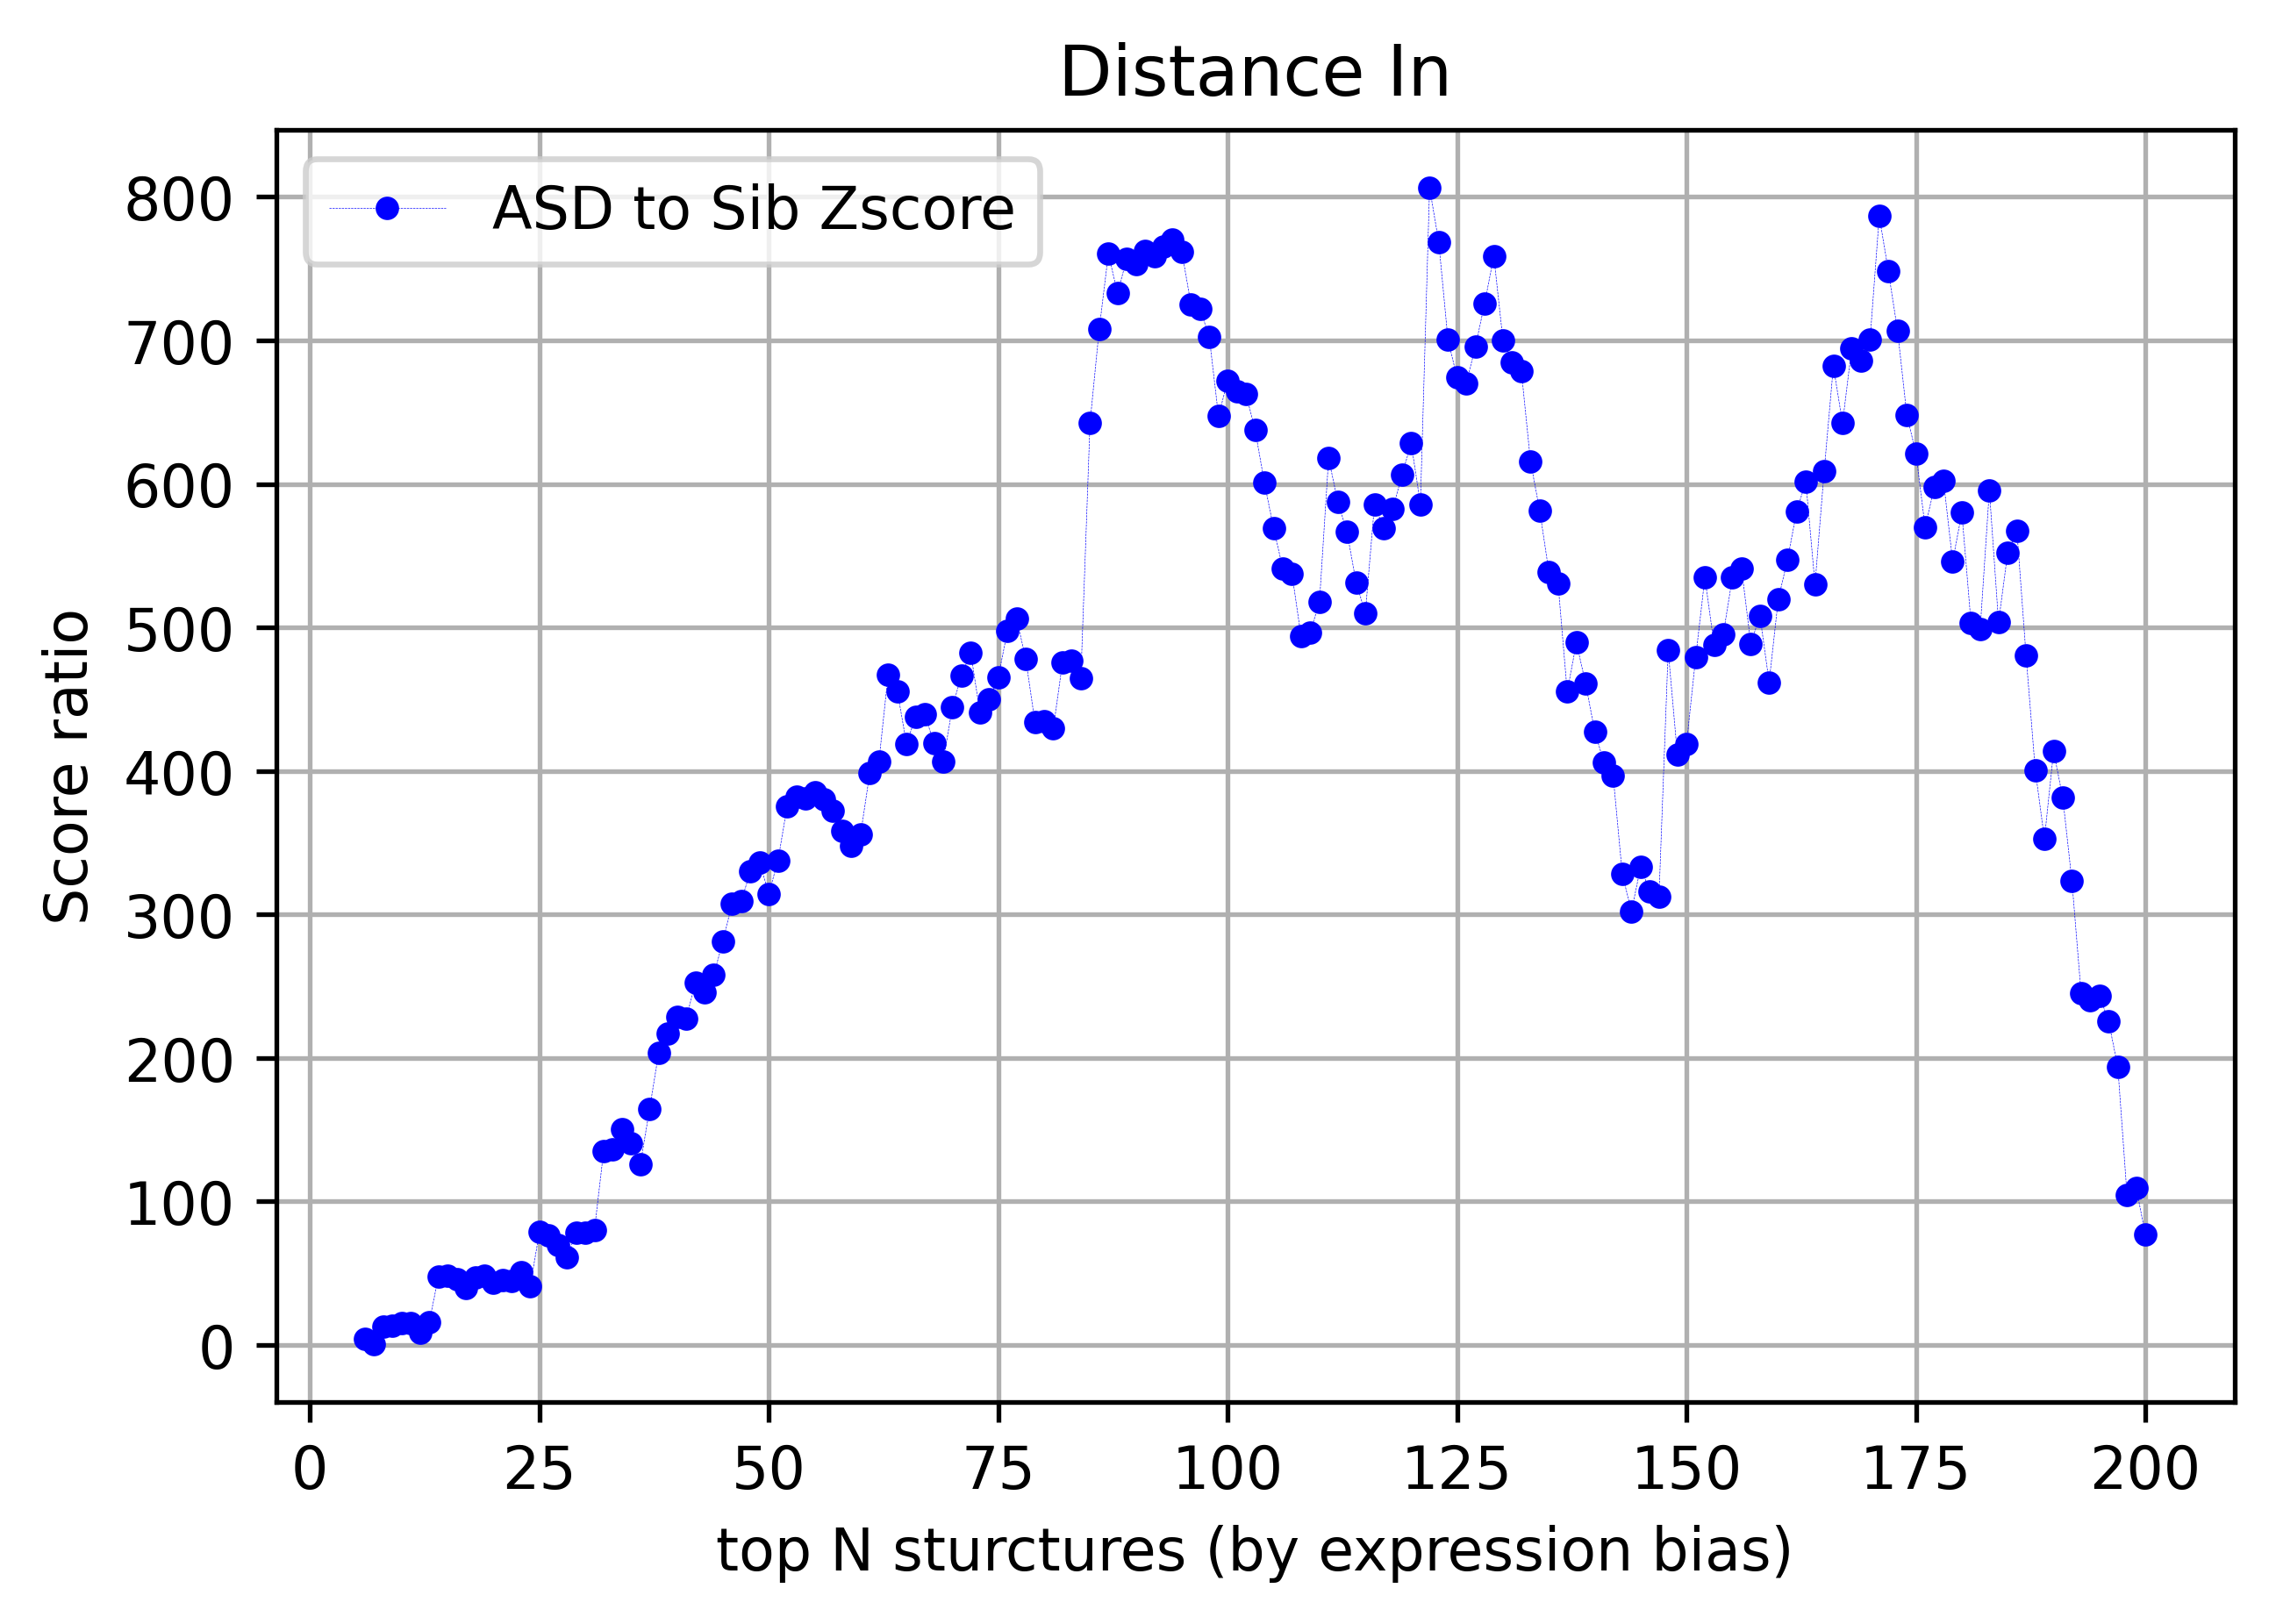

In [299]:
PlotingScore_profile(ASD_Distance_In, Cont_Distance_In, "Distance In", method="diff")

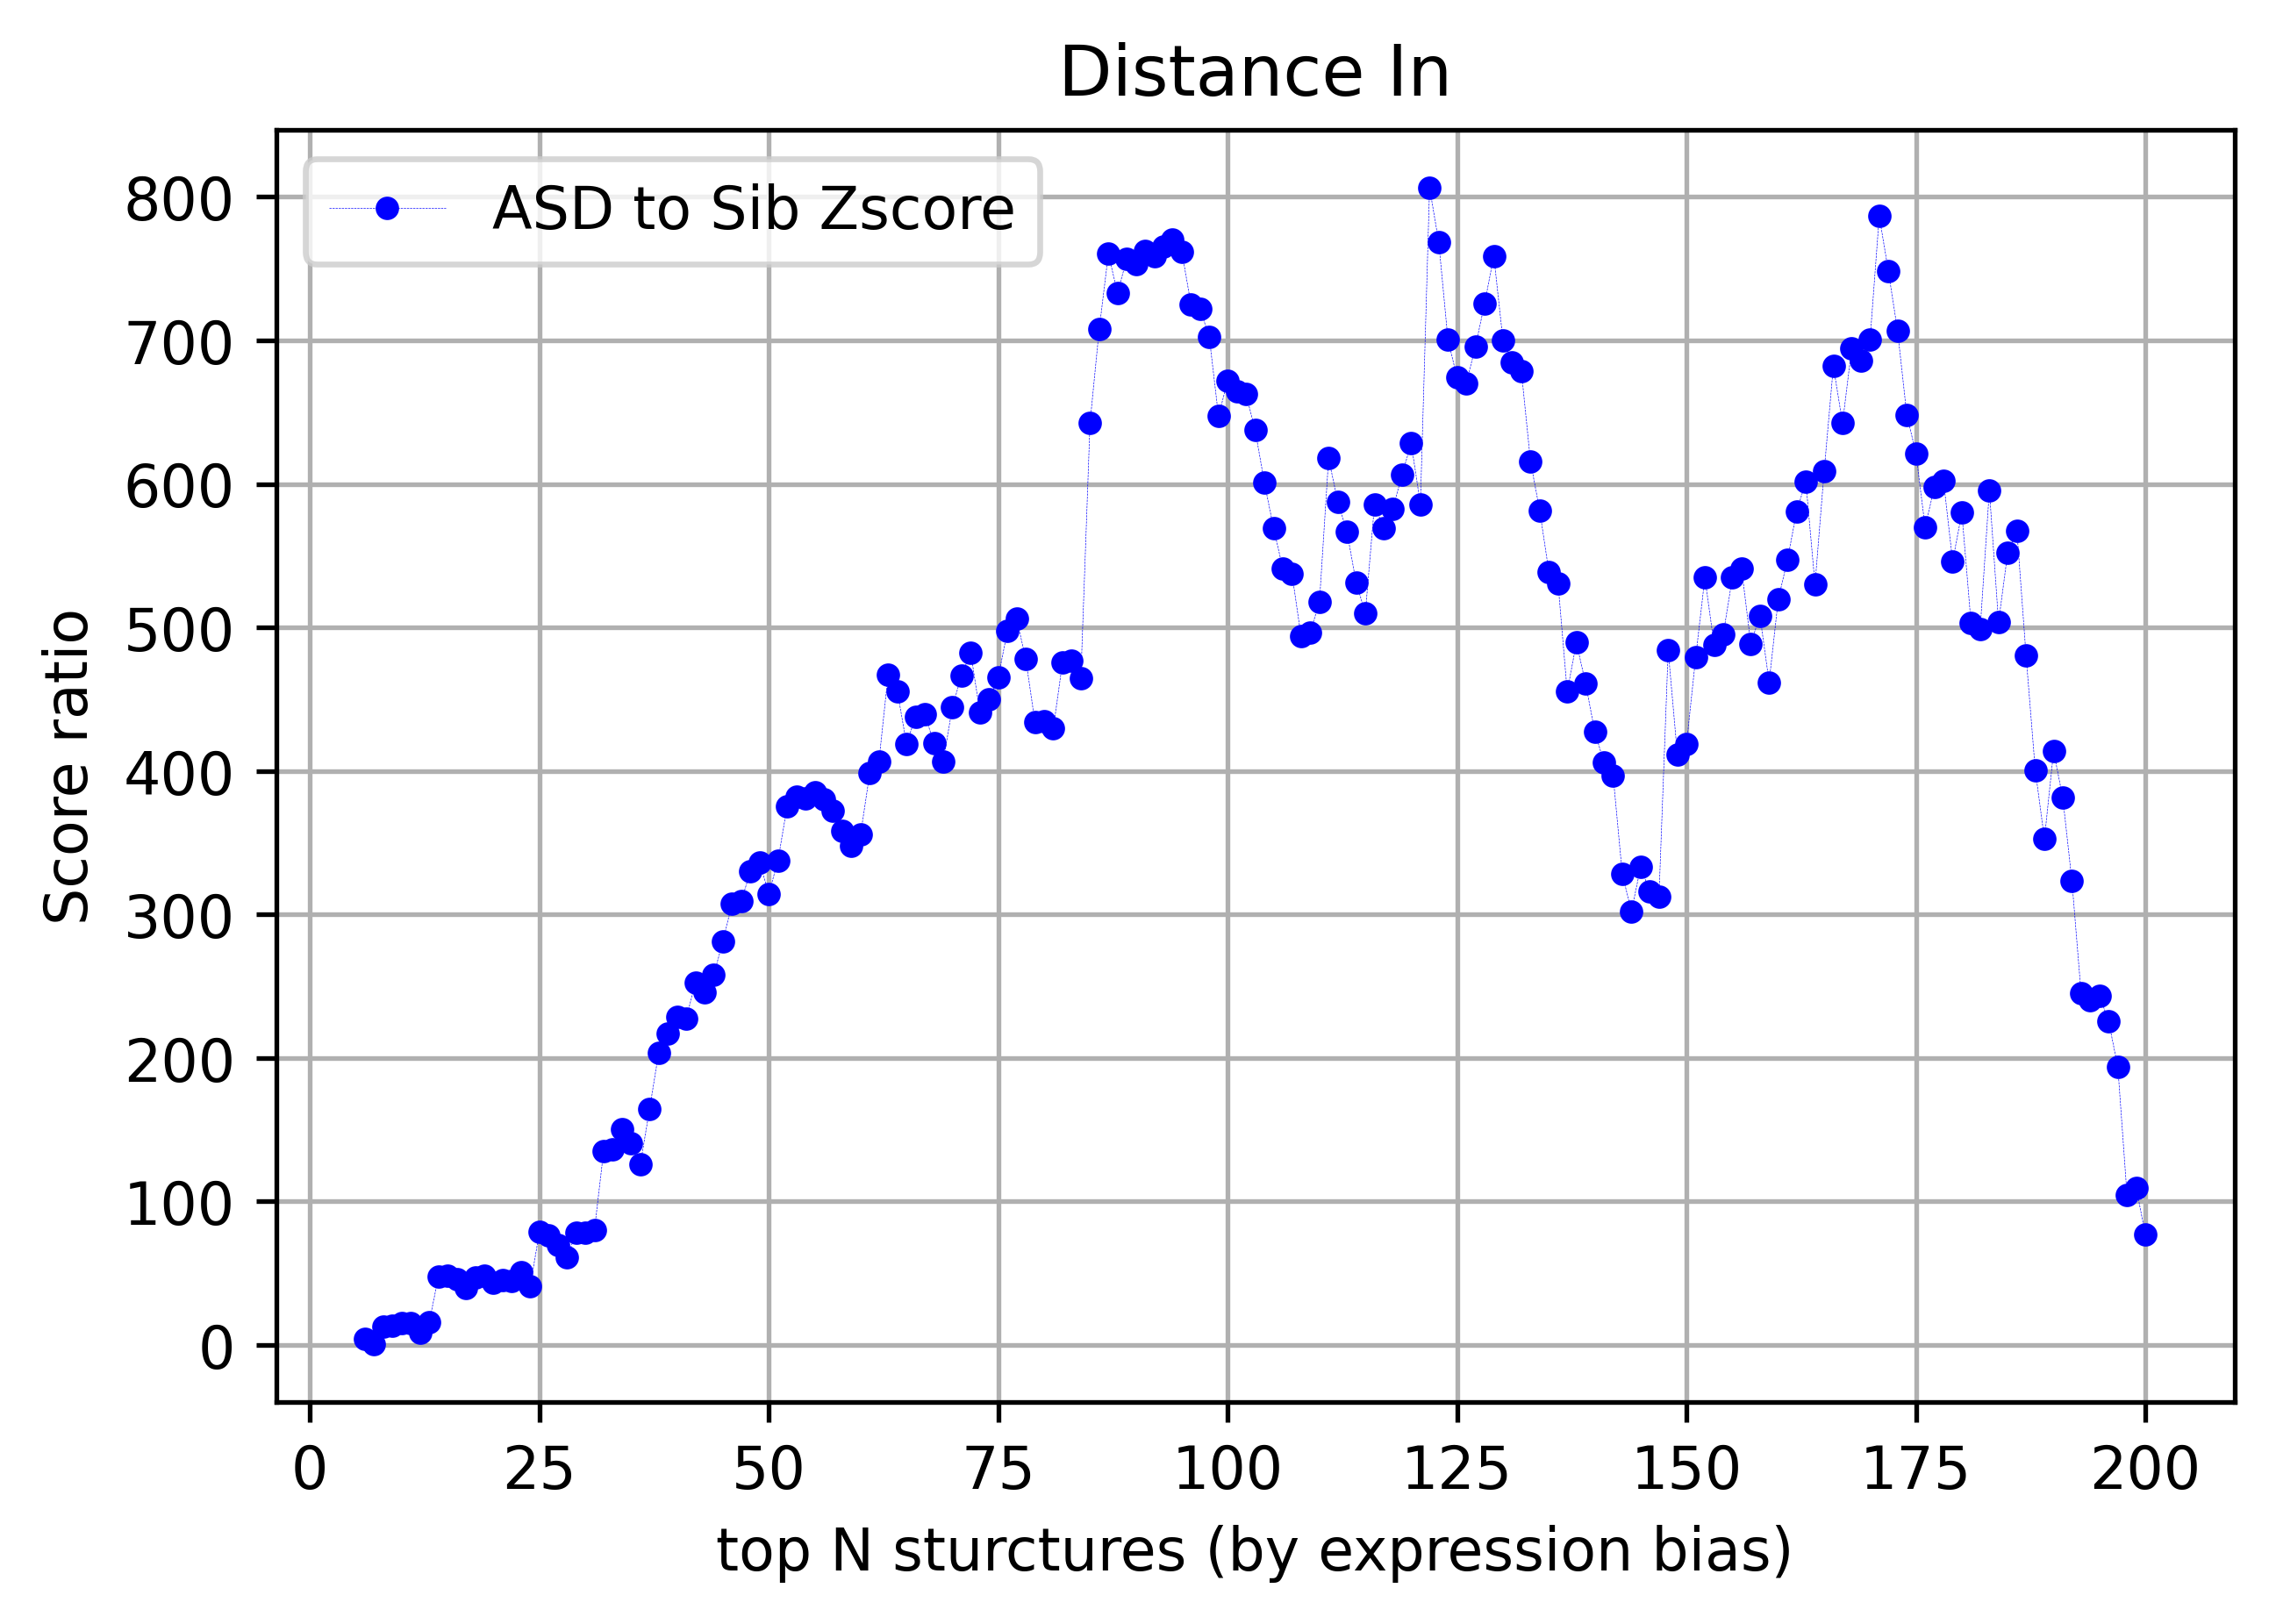

In [300]:
PlotingScore_profile(ASD_Distance_In, Cont_Distance_In, "Distance In", method="diff")

In [296]:
idx = np.where(topNs==50)[0][0]
(ASD_Distance_In - Cont_Distance_In.mean(axis=0))[idx]

314.3480035515678

In [290]:
250 / (50*50)

0.1

In [291]:
750 / (90*90)

0.09259259259259259

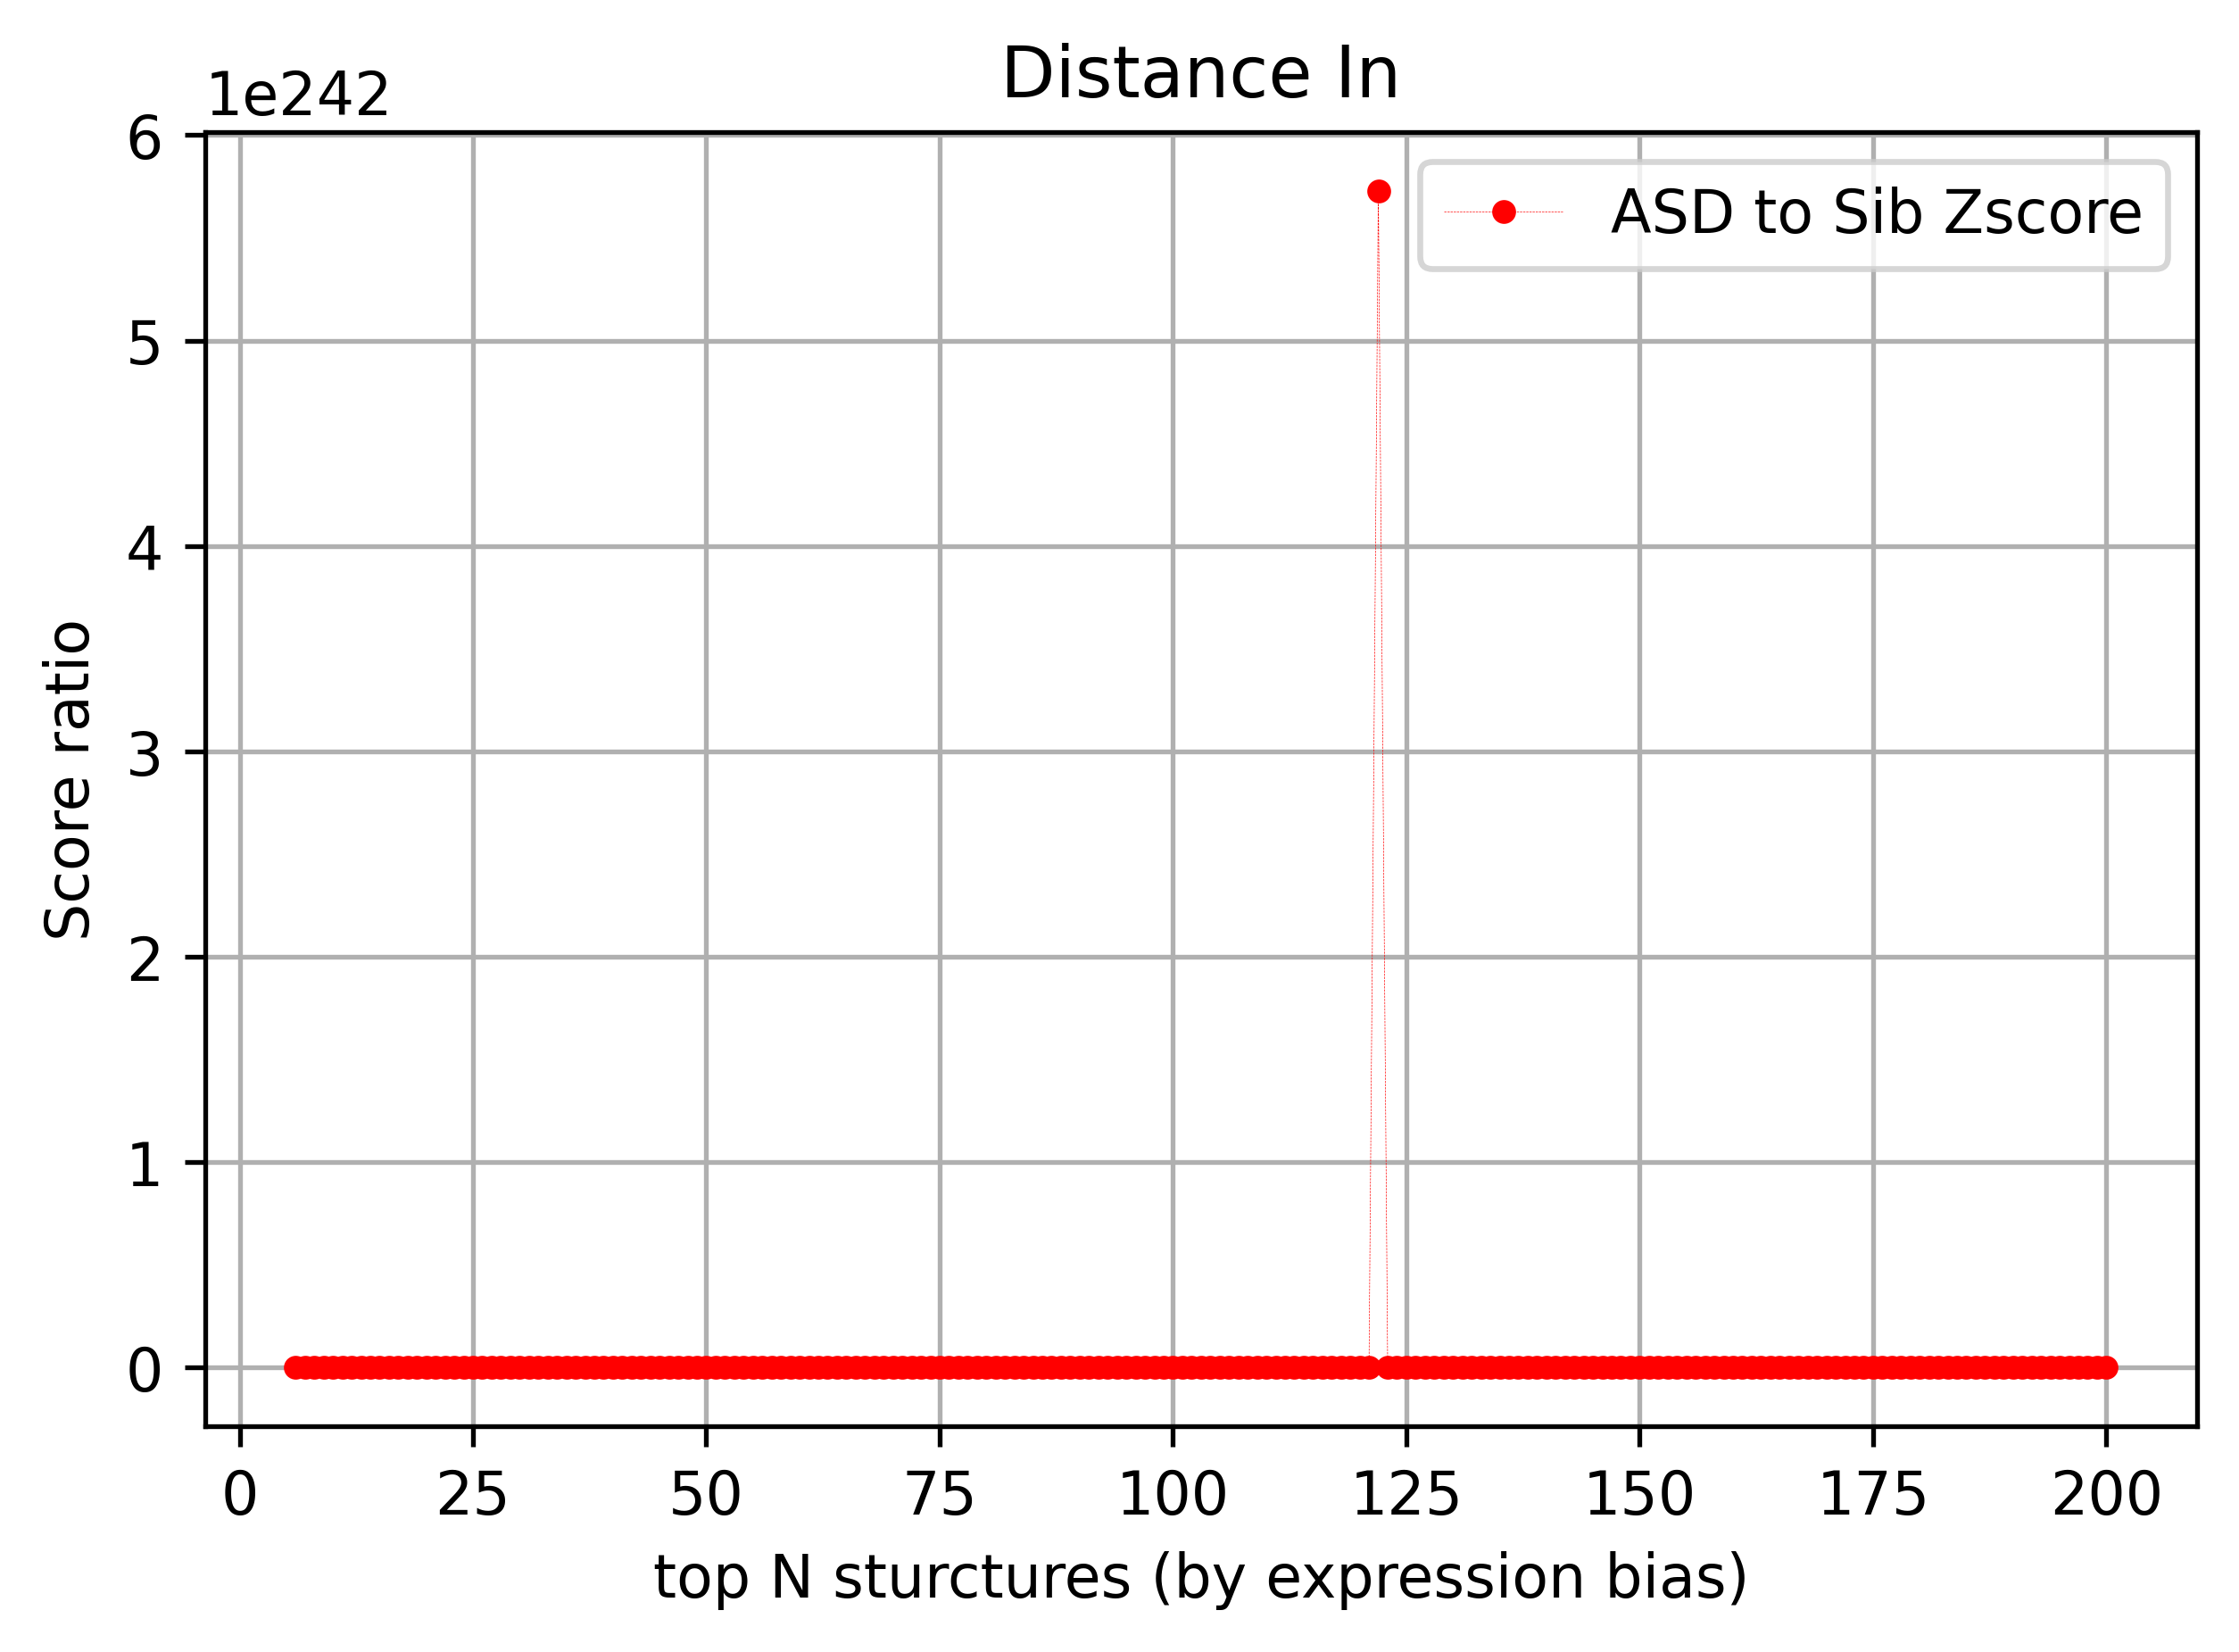

In [234]:
PlotingScore_profile(ASD_Distance_In, Cont_Distance_In, "Distance In", method="diff")

/tmp/ipykernel_216019/3445987975.py:4: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3455: RuntimeWarning: invalid value encountered in double_scalars
  low = [v if lo else v - e for v, e, lo in zip(data, a, lolims)]
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3456: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
/tmp/ipykernel_216019/3445987975.py:4: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3455: RuntimeWarning: invalid value encountered in double_scalars
  low = [v if lo else v - e for v, e, lo in zip(data, a, lolims)]
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3456: RuntimeWarning: invalid value encountered in double_scalars
  high 

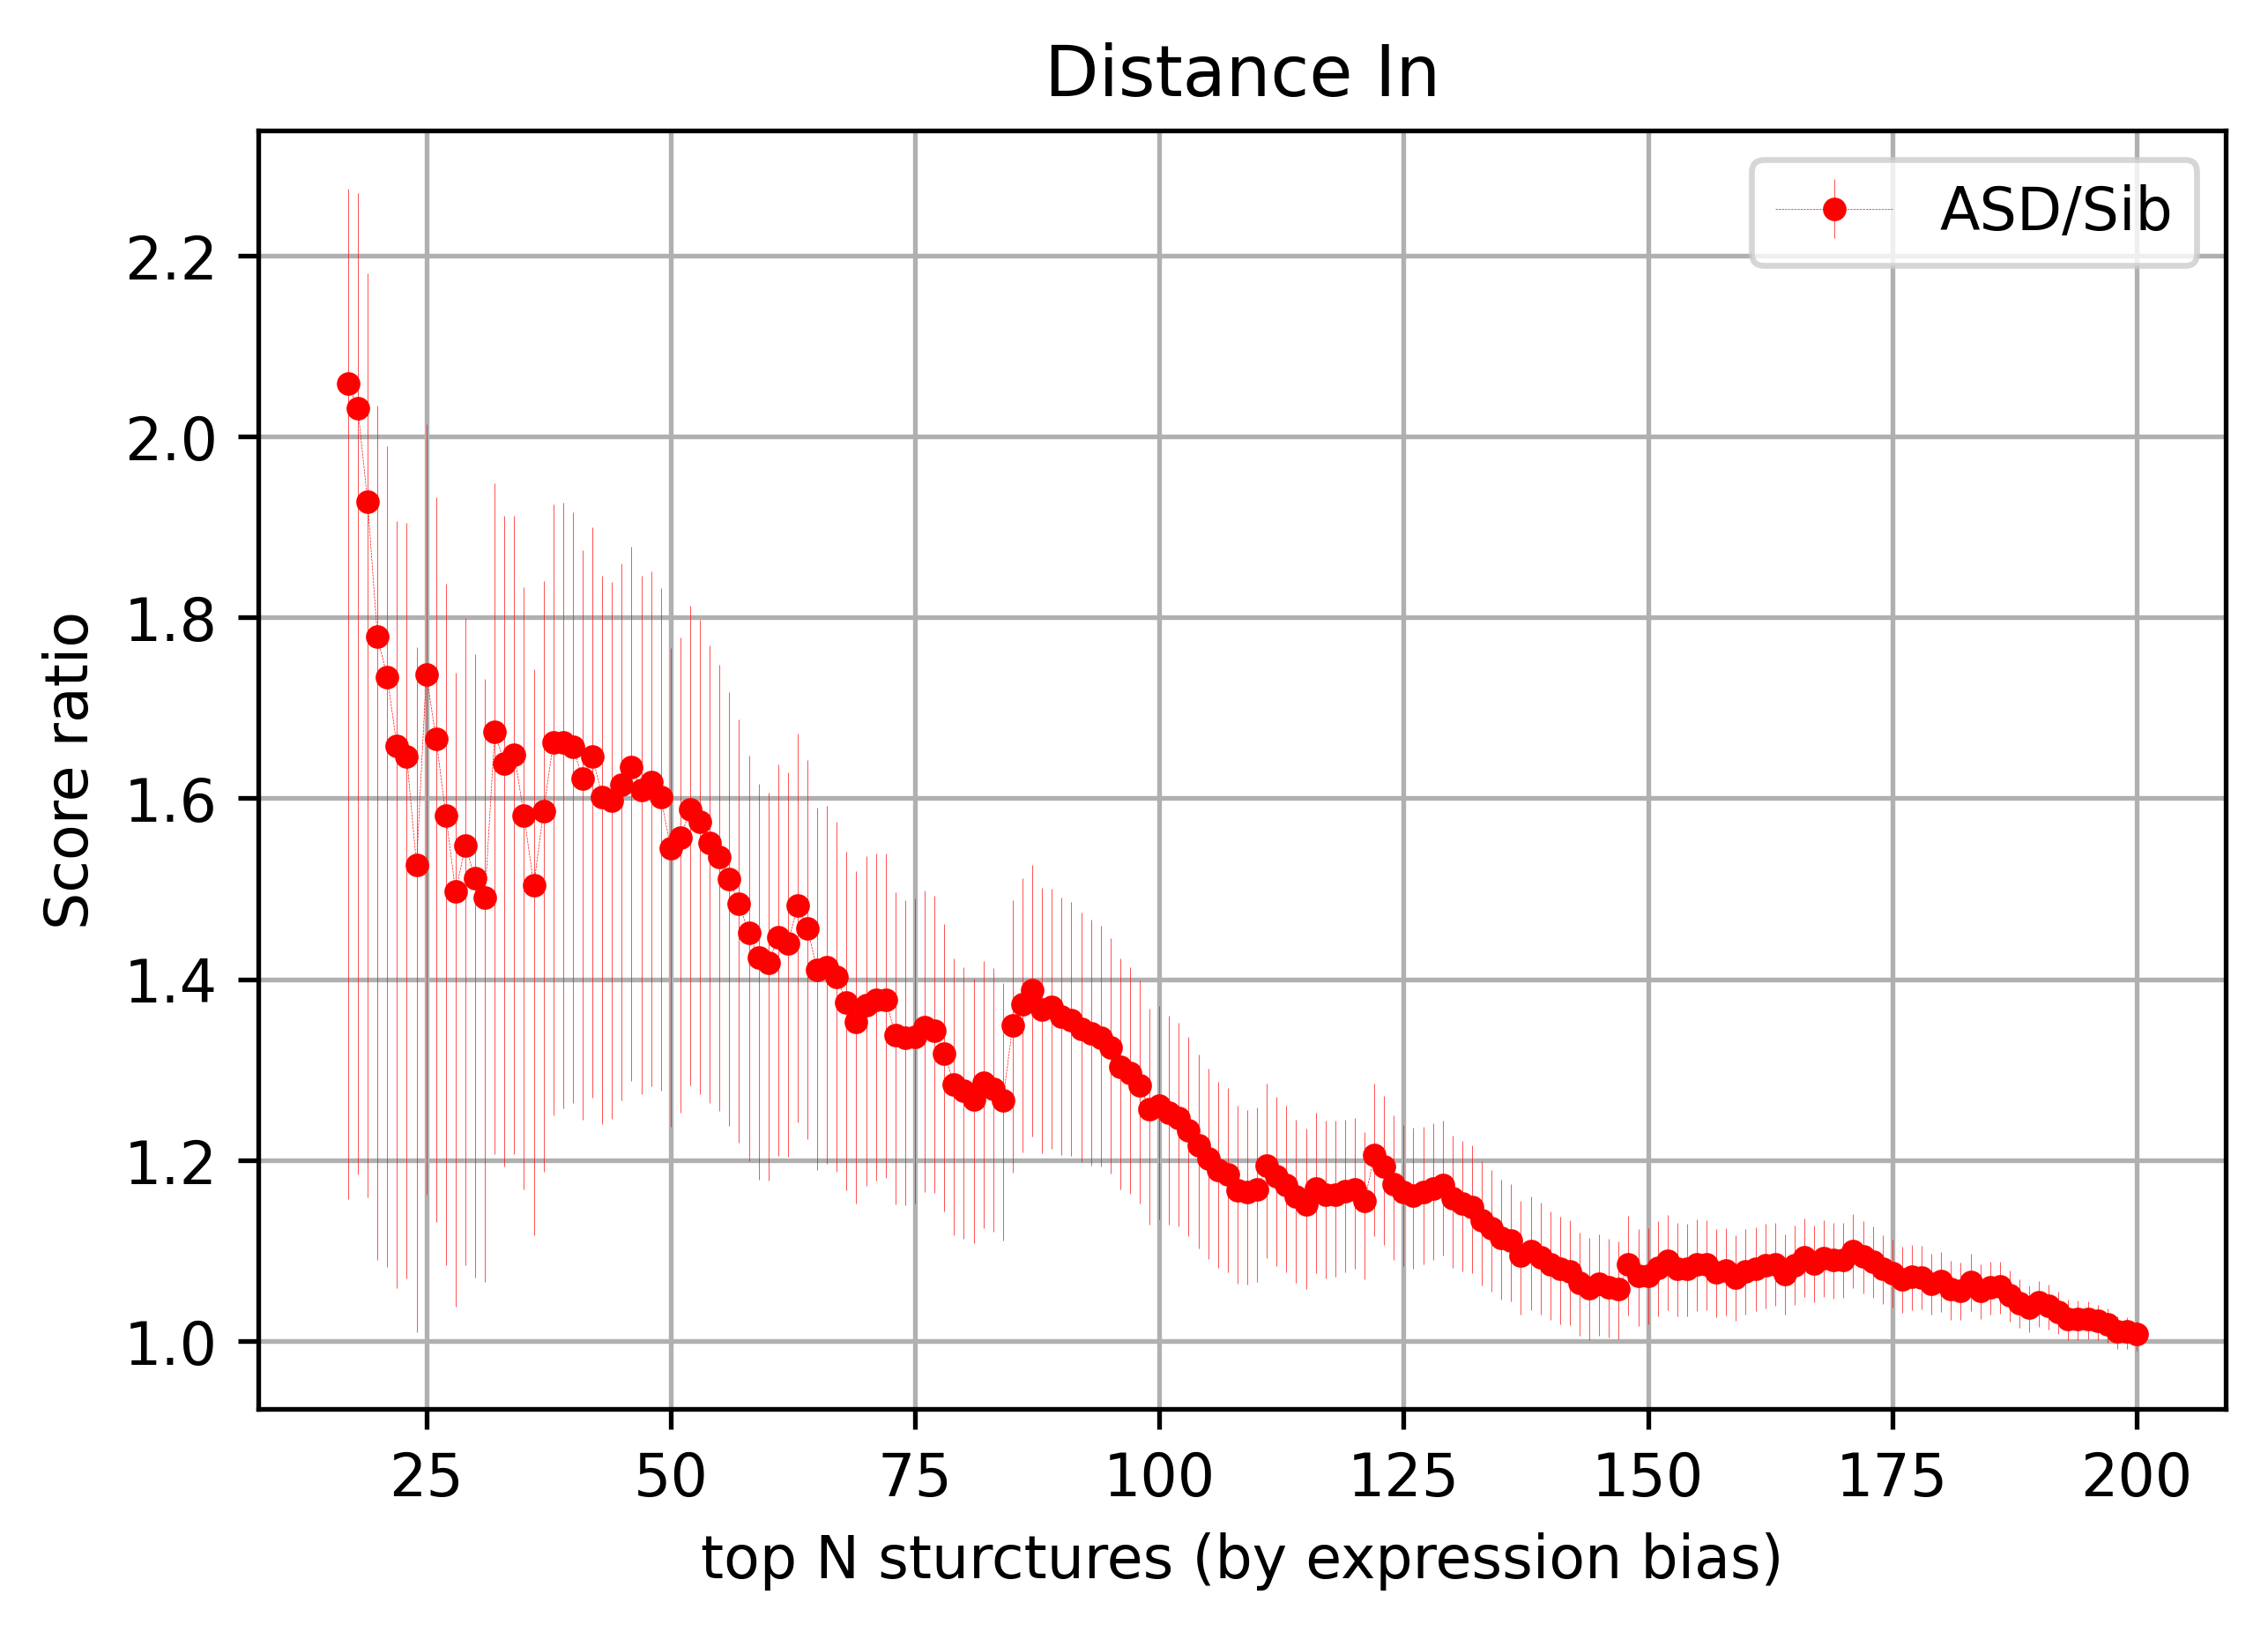

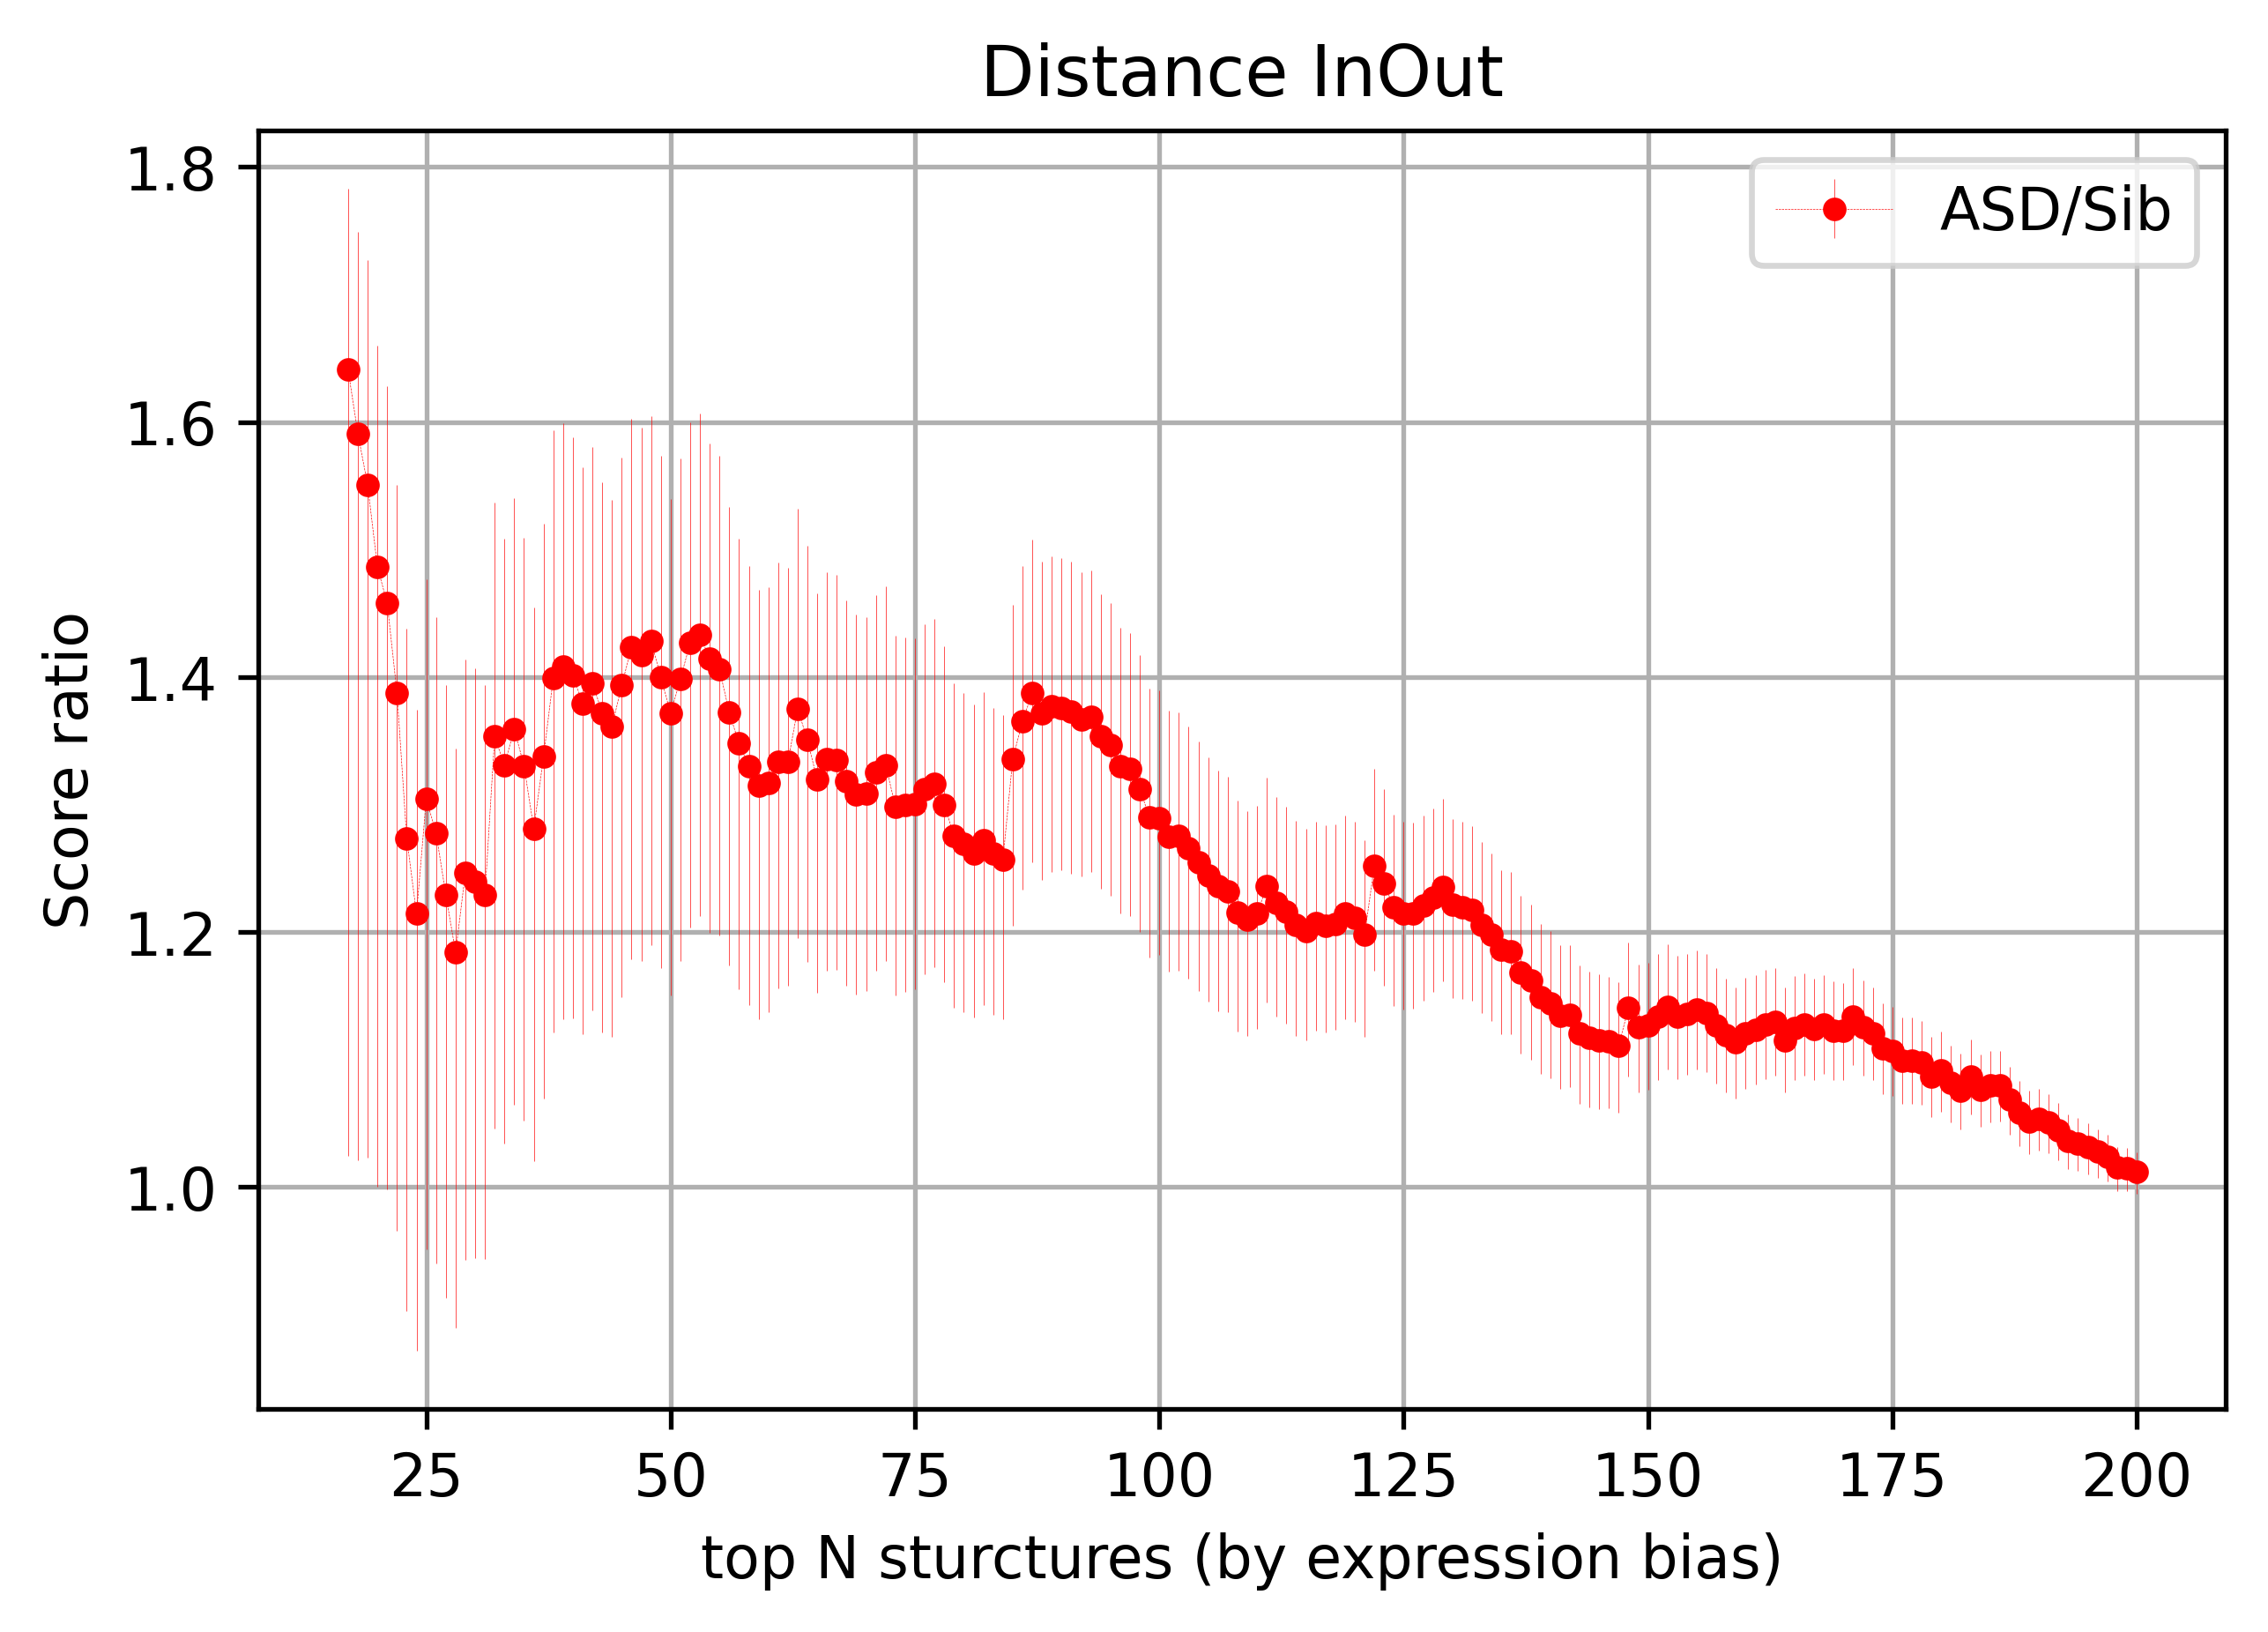

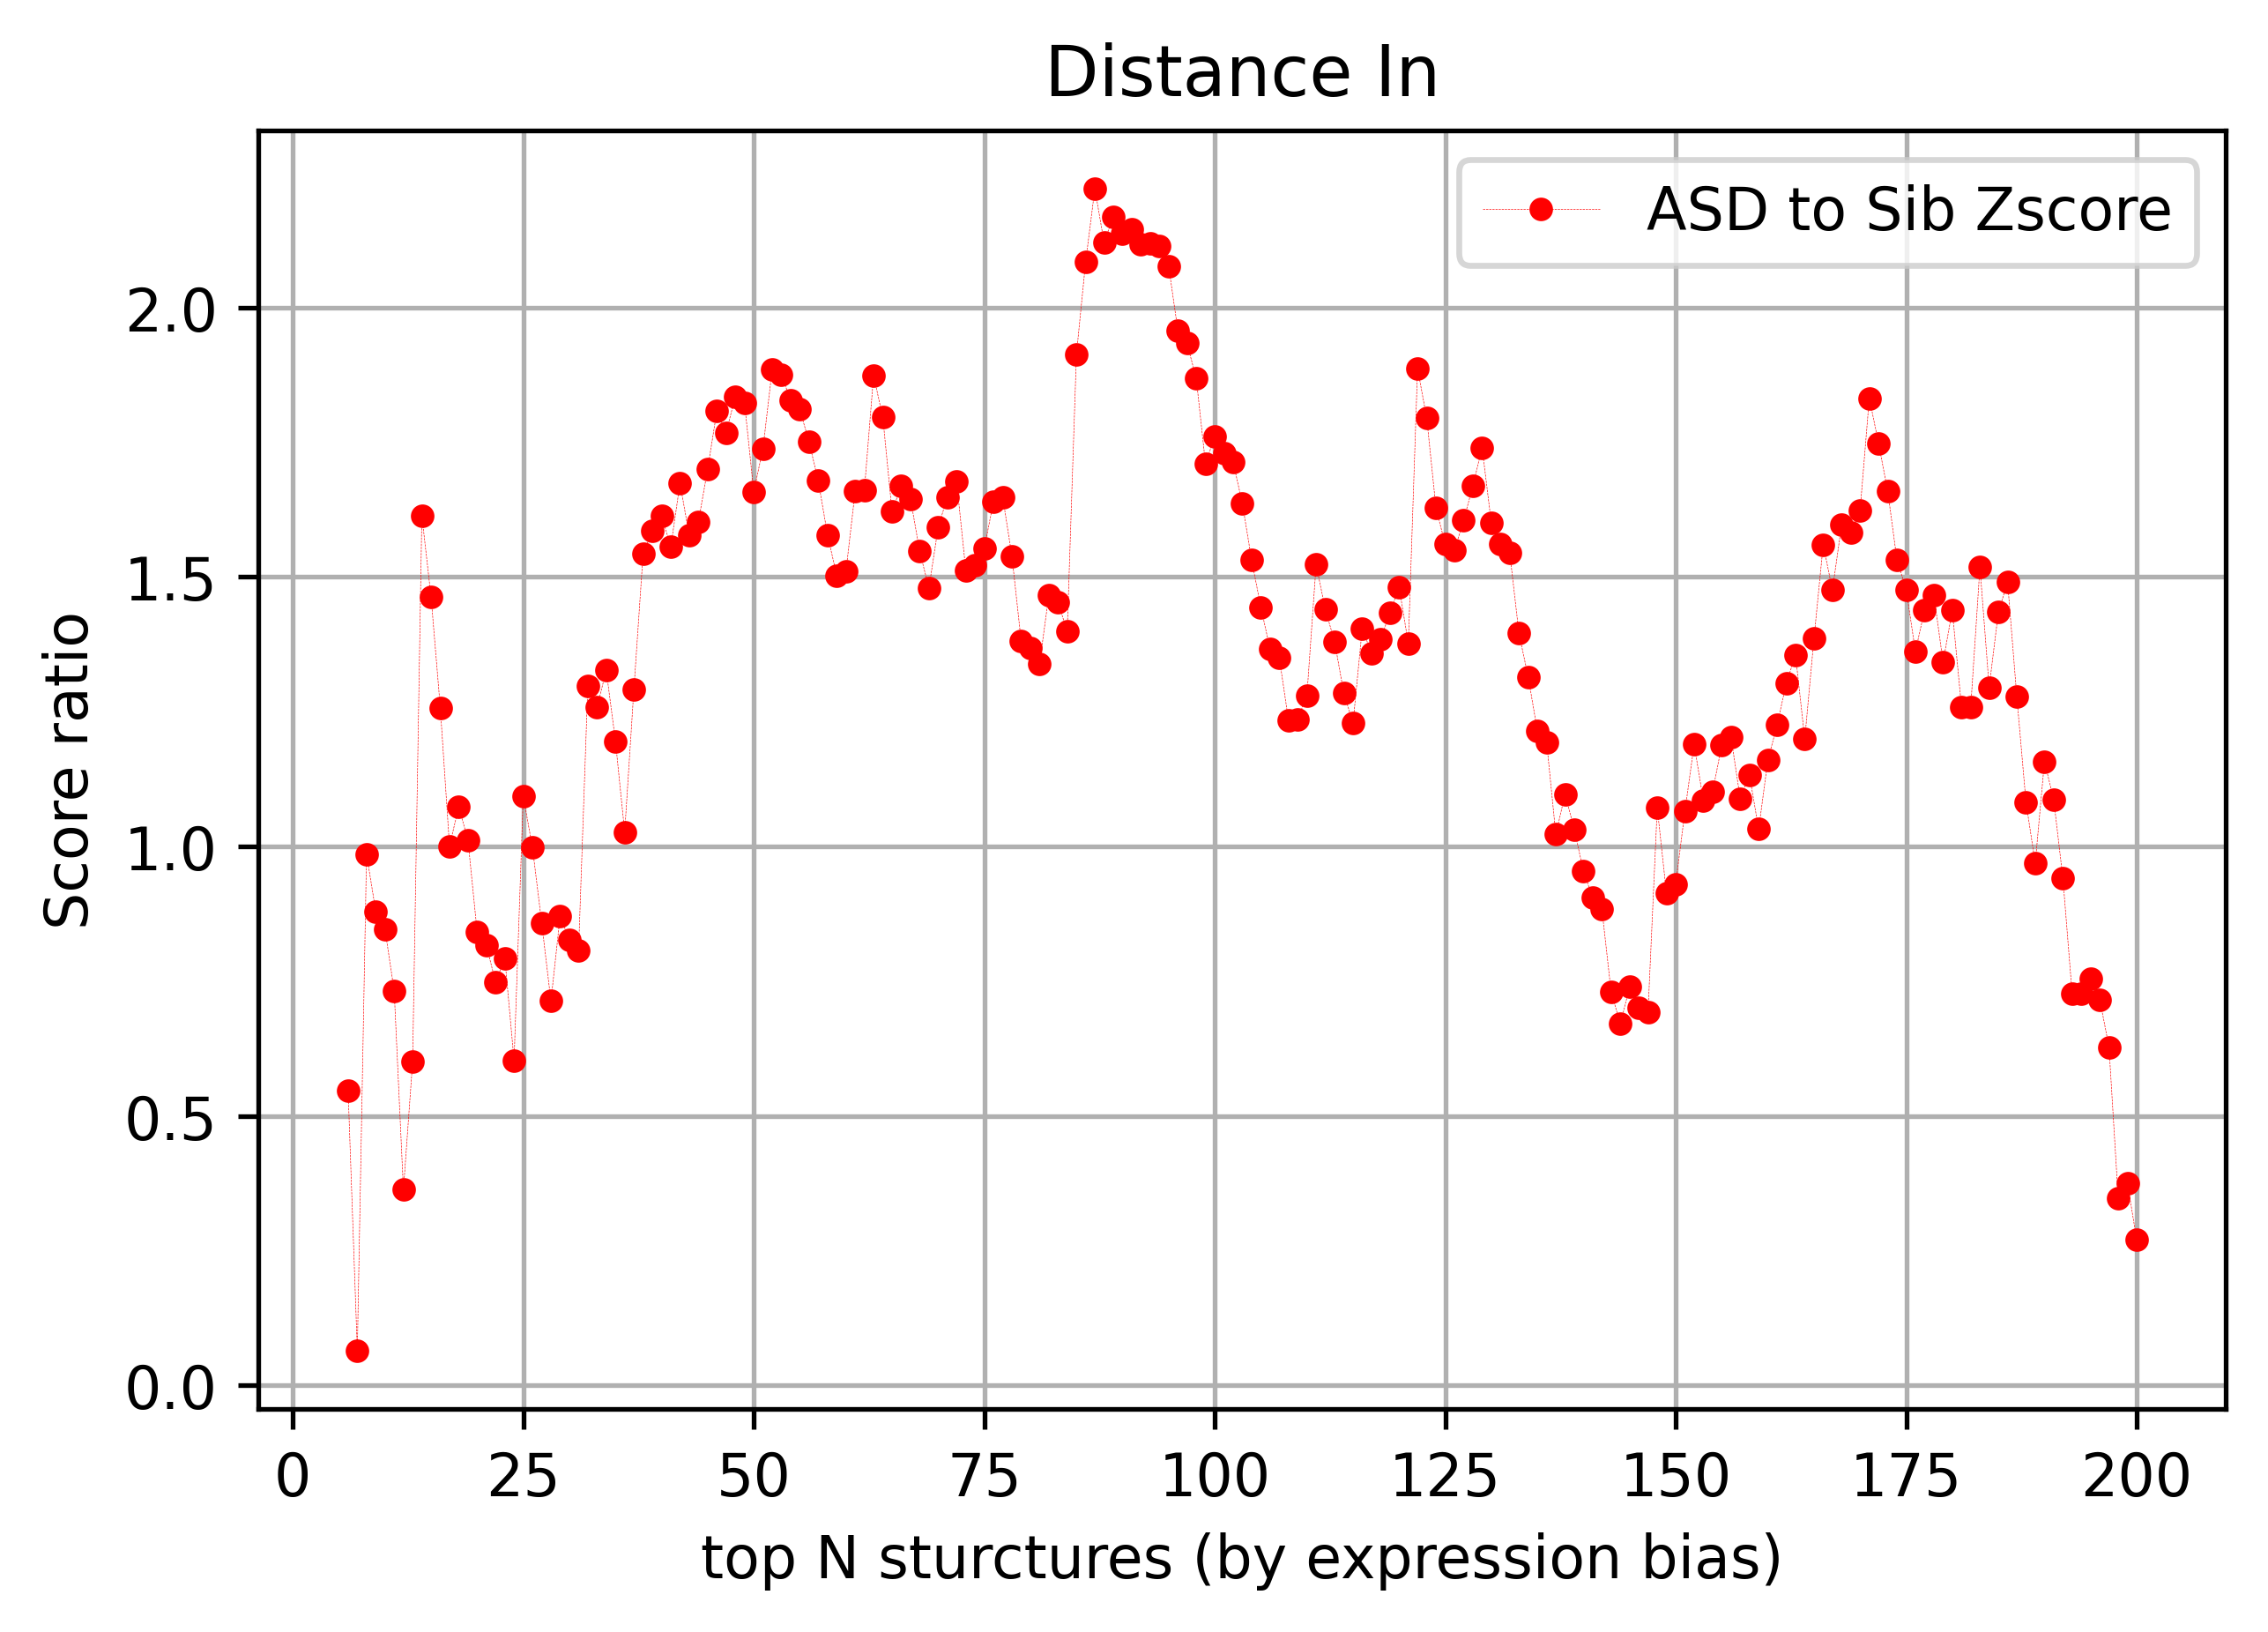

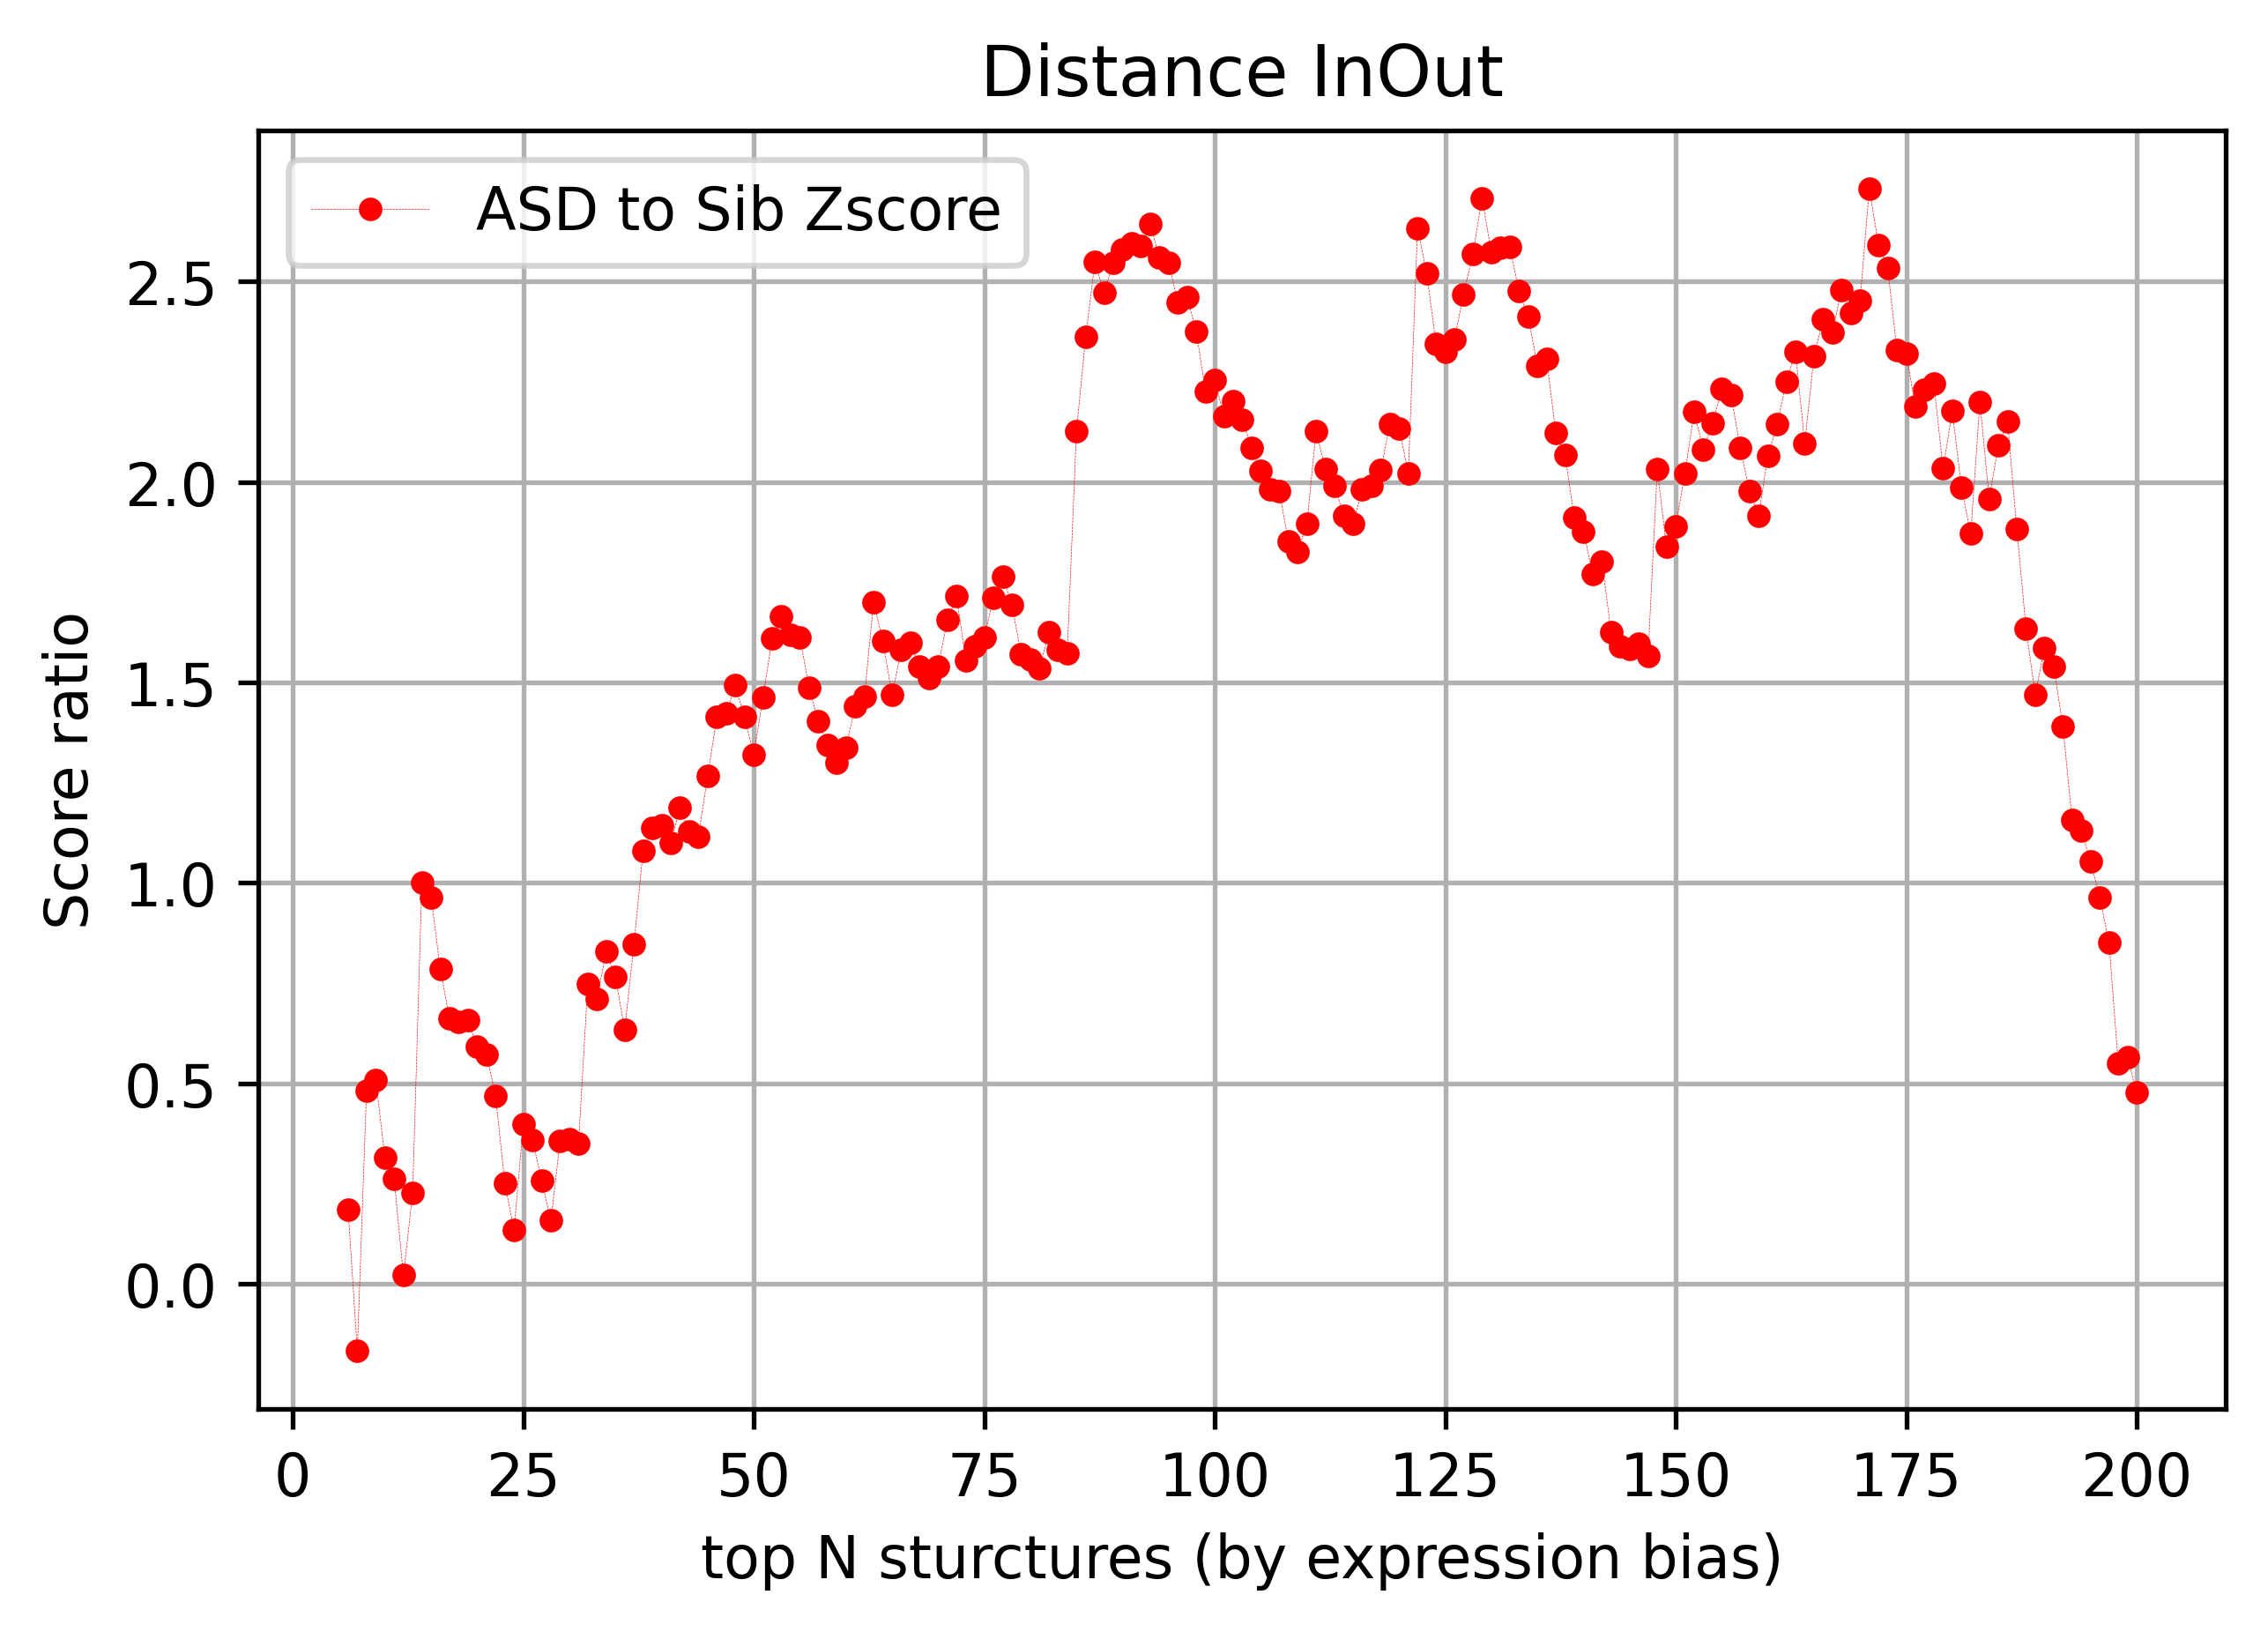

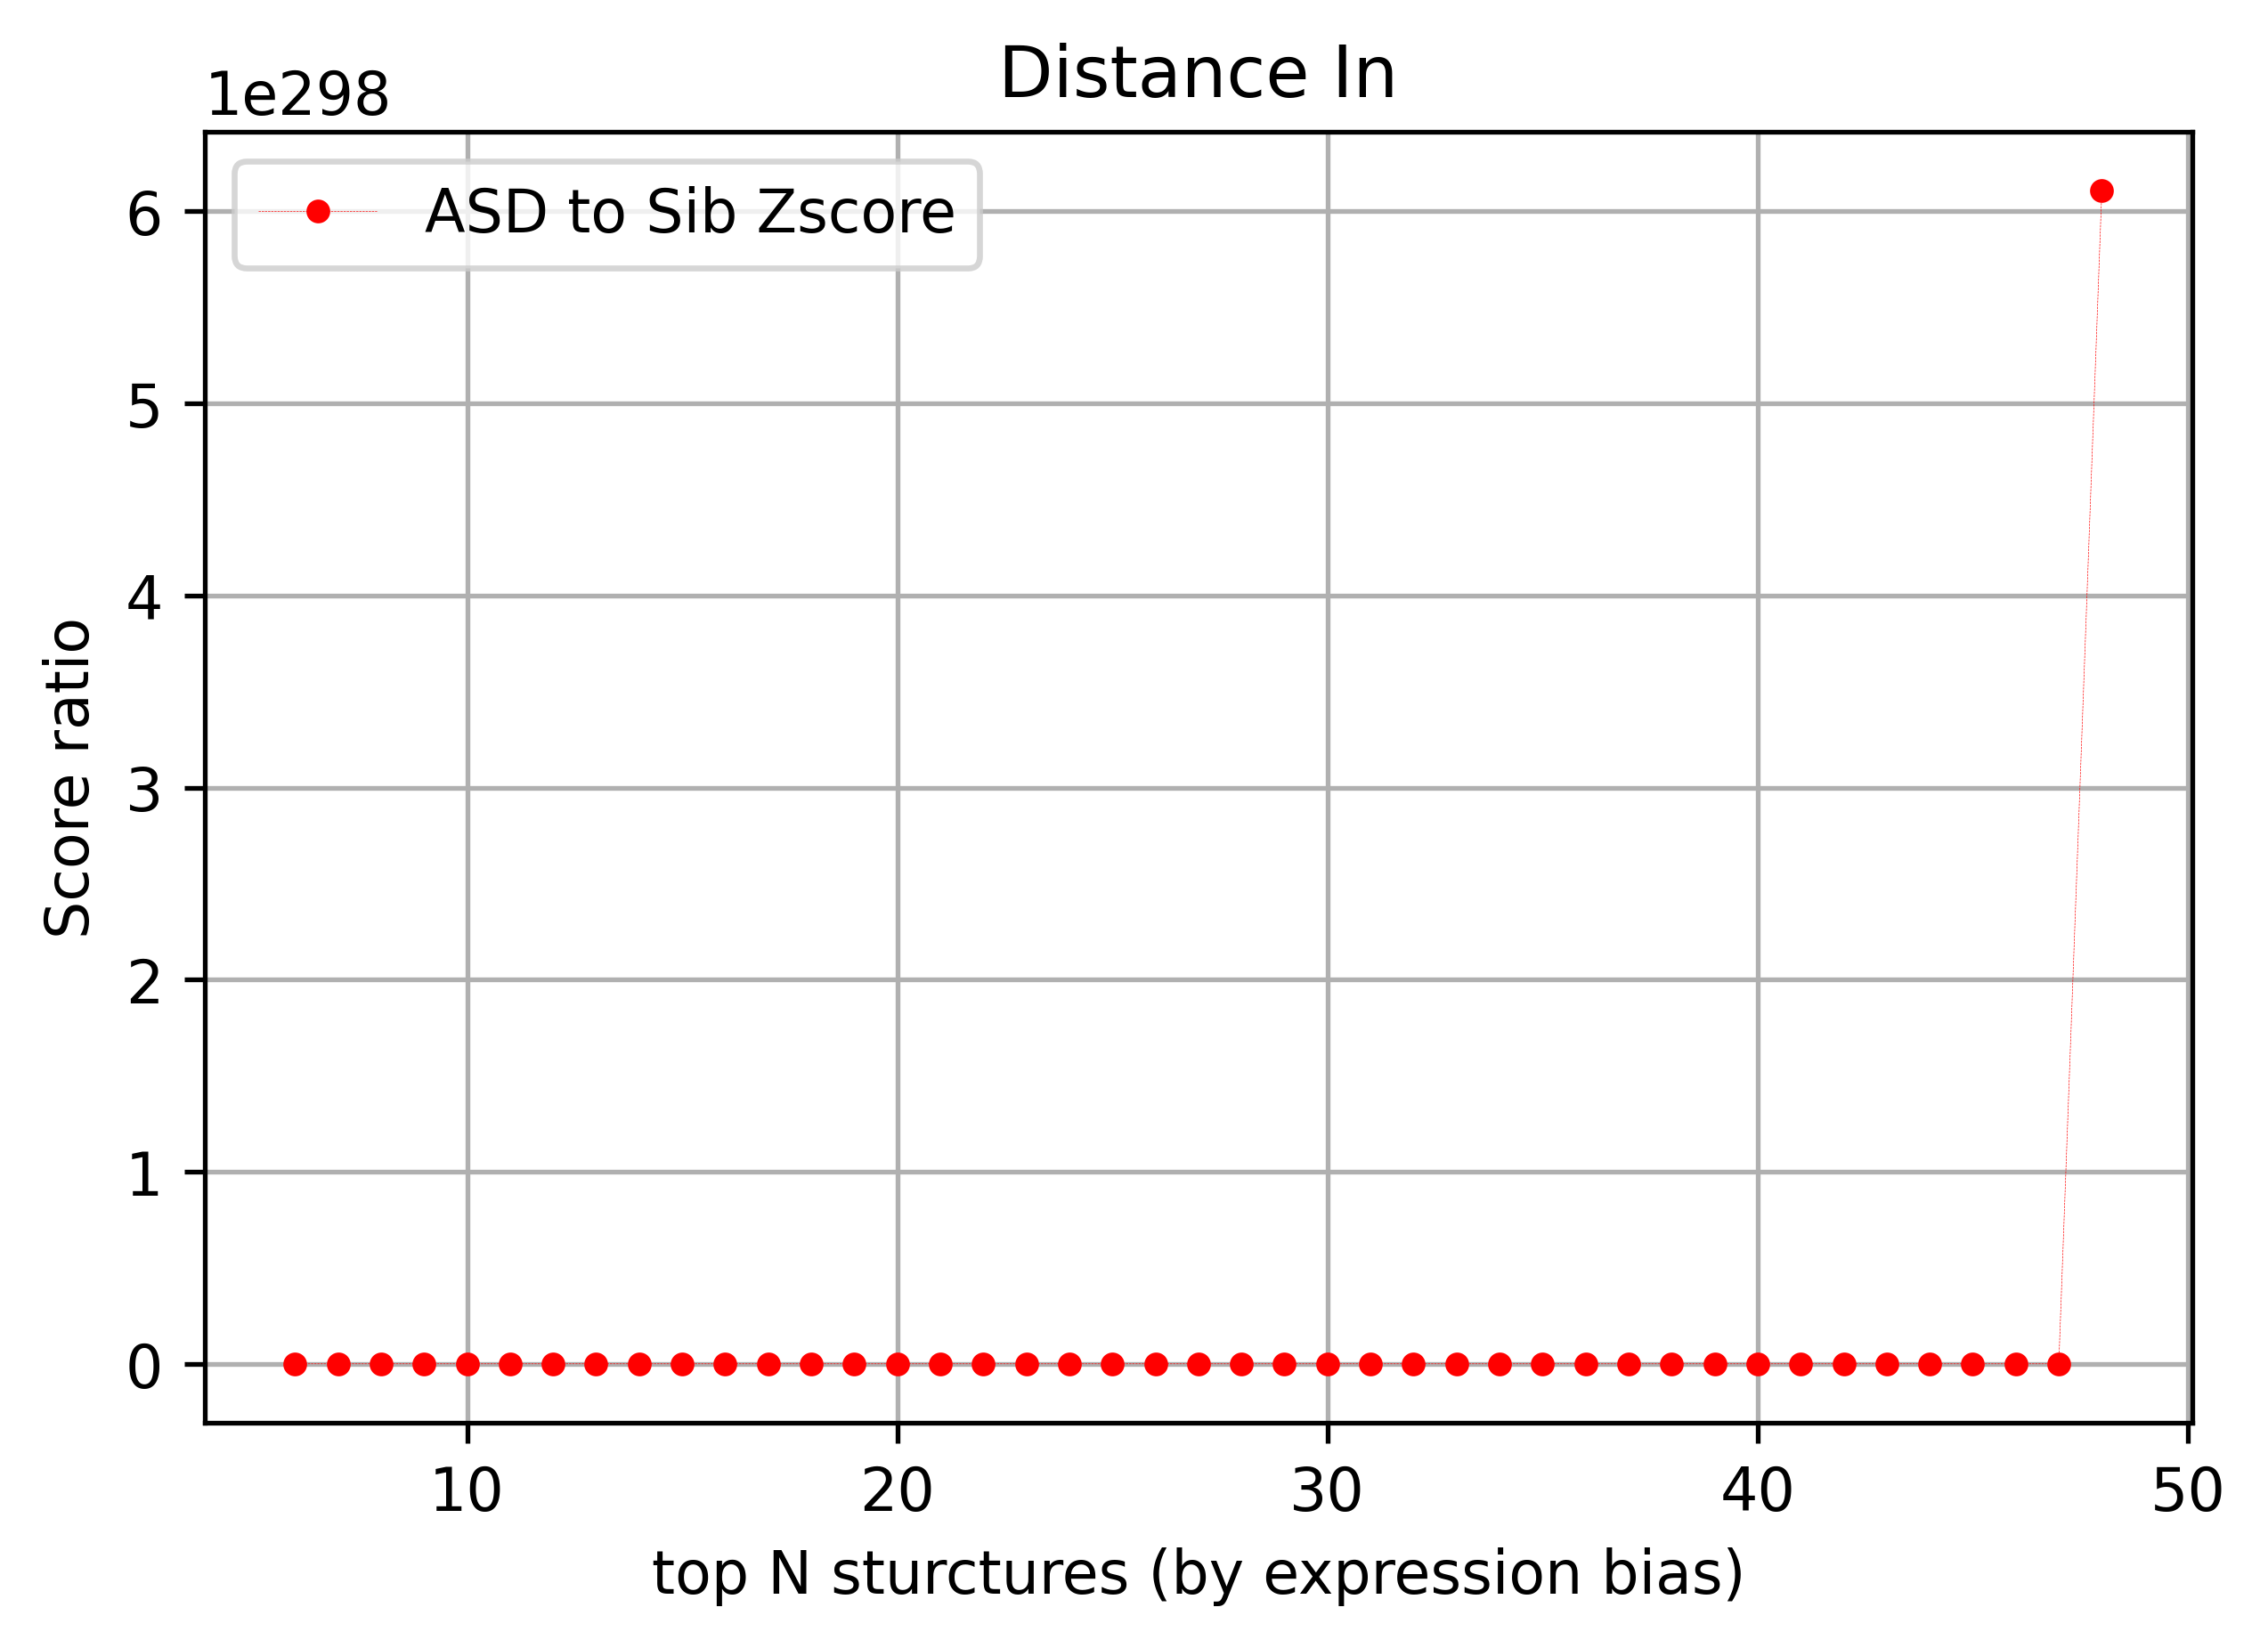

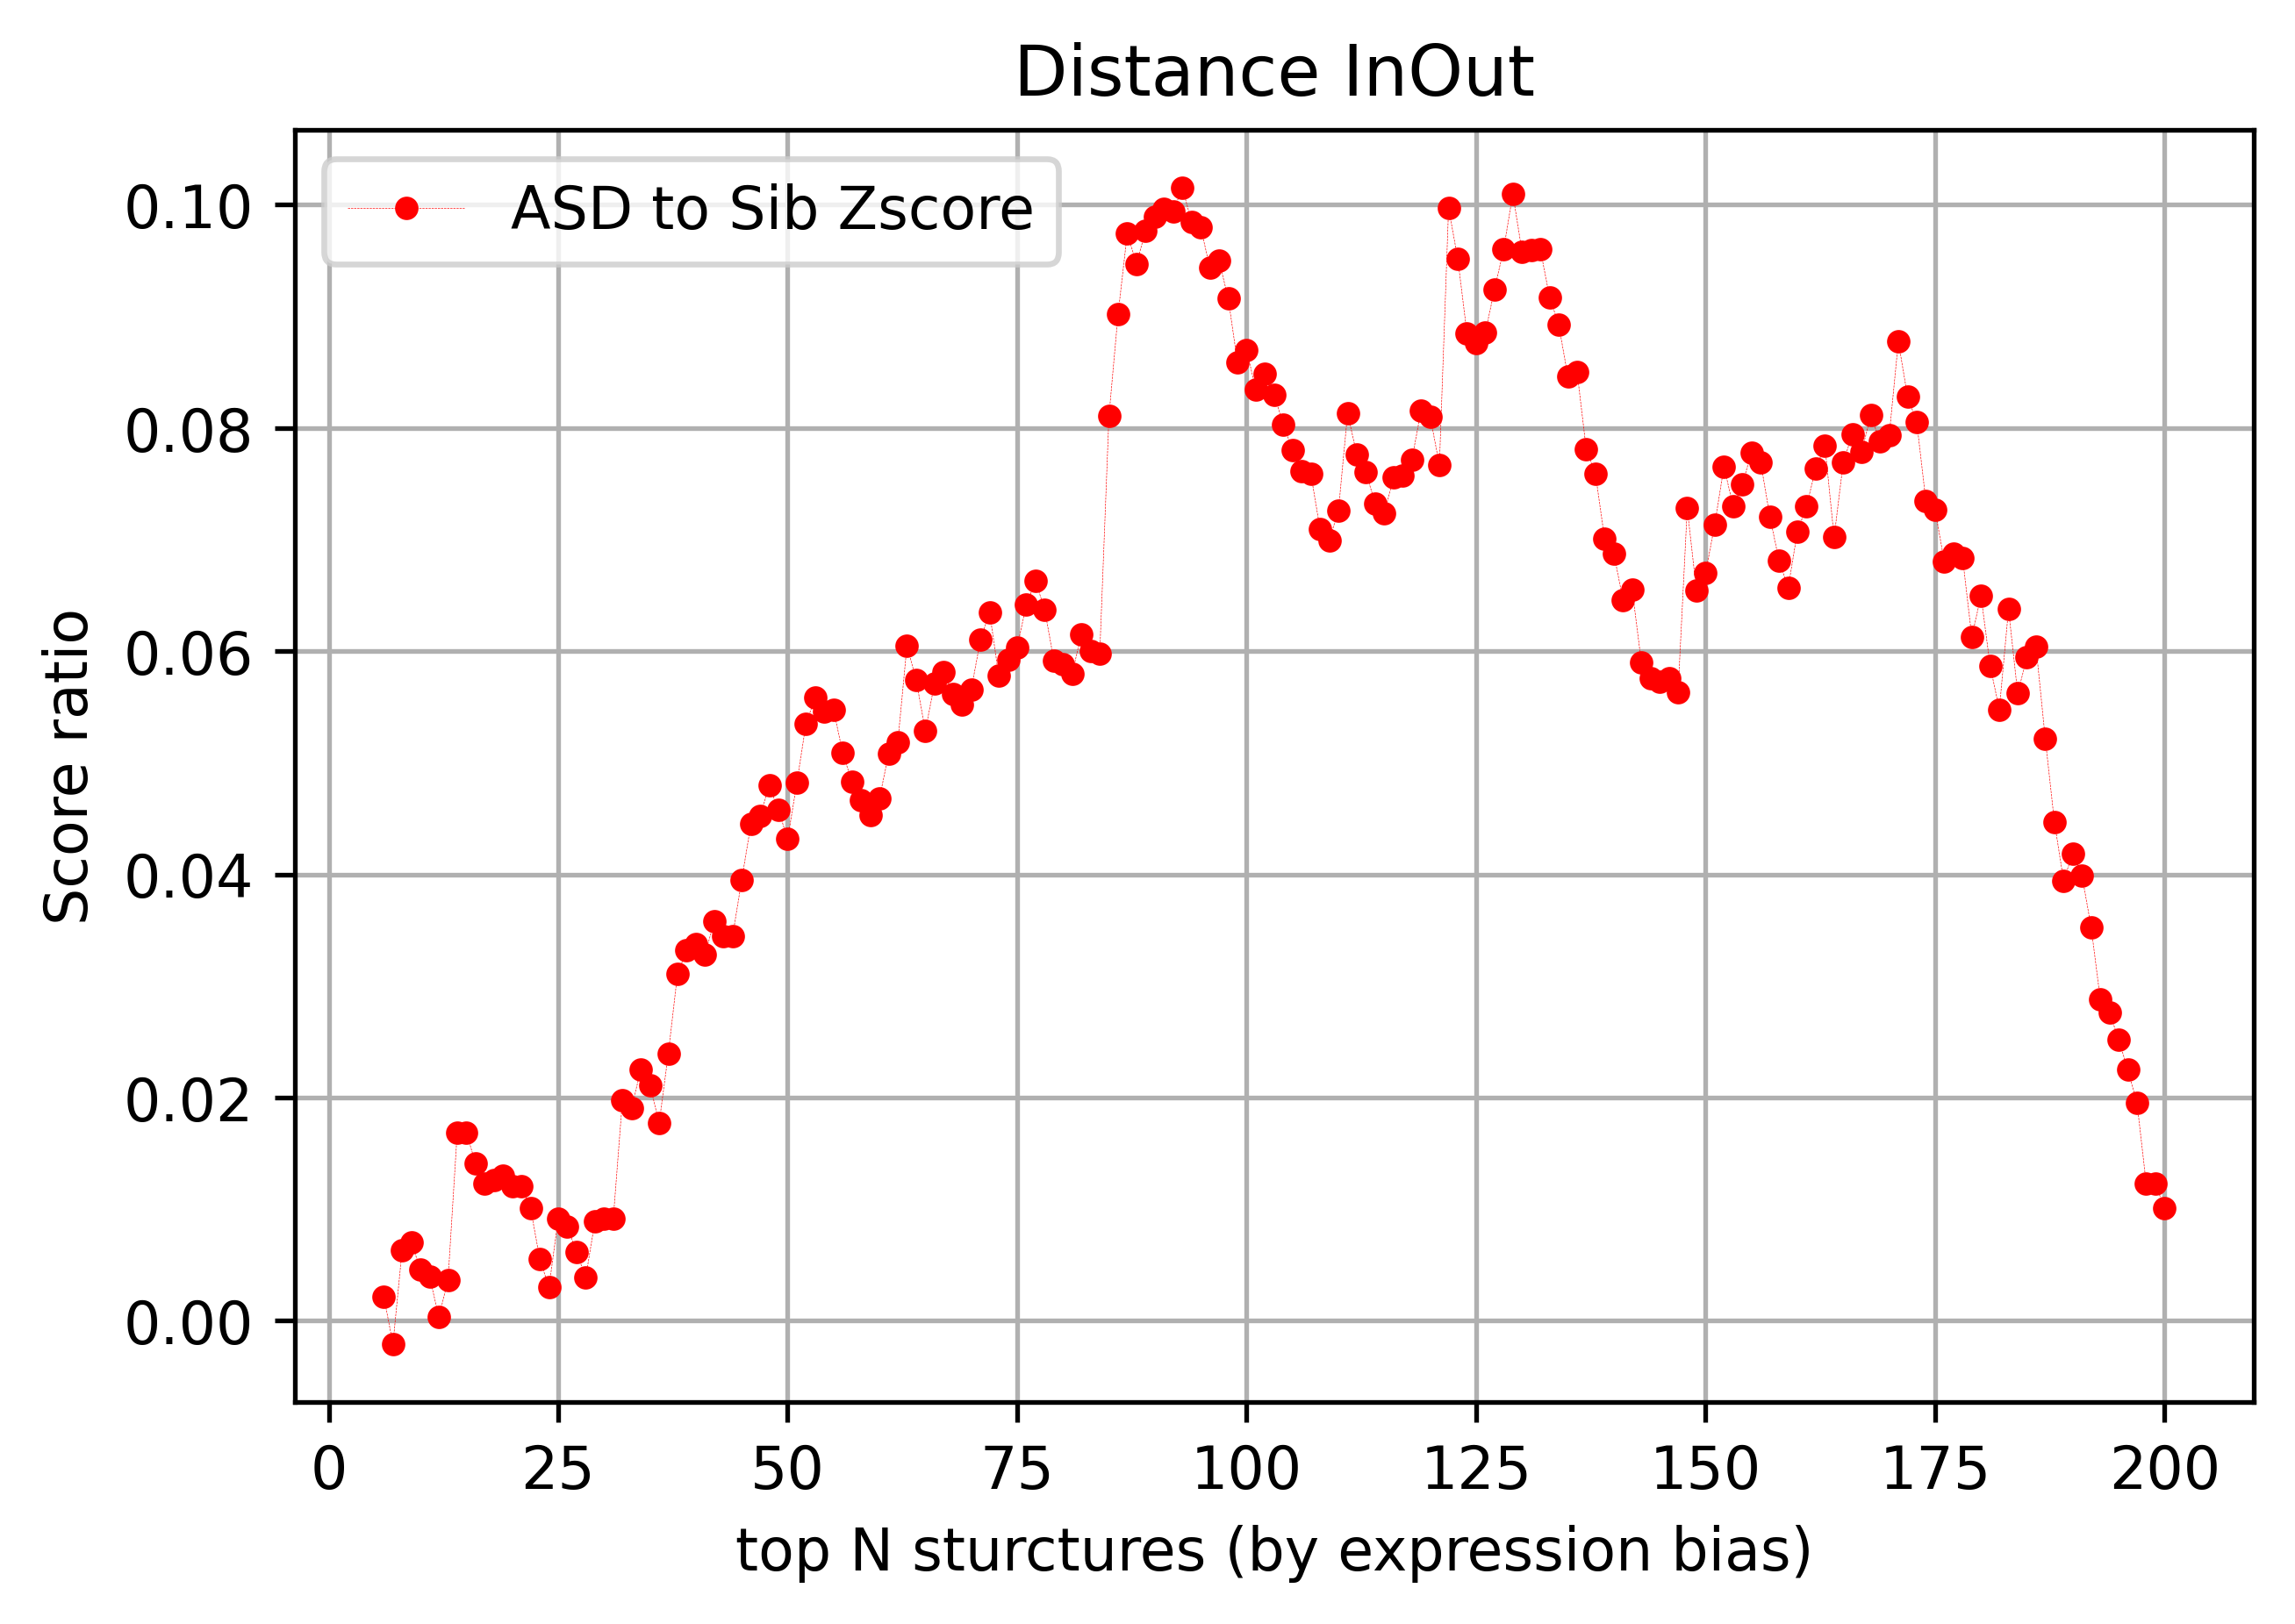

In [219]:
PlotingScore_profile(ASD_Distance_In, Cont_Distance_In, "Distance In")
PlotingScore_profile(ASD_Distance_InOut, Cont_Distance_InOut, "Distance InOut")
PlotingScore_profile(ASD_Distance_In, Cont_Distance_In, "Distance In", method="zscore")
PlotingScore_profile(ASD_Distance_InOut, Cont_Distance_InOut, "Distance InOut", method="zscore")
PlotingScore_profile(np.exp2(ASD_Distance_In), Cont_Distance_In, "Distance In", method="diff")
PlotingScore_profile(ASD_Distance_InOut, Cont_Distance_InOut, "Distance InOut", method="diff")

#### test ASD stability 

In [76]:
def BlockShuffle(List, BlockSize):
    new_list = []
    for i in range(0, len(List), BlockSize):
        if i + BlockSize < len(List):
            x = list(List[i:i+BlockSize])
            x = random.sample(x, BlockSize)
            new_list.extend(x)
        else:
            x = list(List[i: len(List)])
            x = random.sample(x, len(x))     
            new_list.extend(x)
    return new_list

def run_profile(Ranks, ScoreMat, topNs=topNs):
    scores = []
    for topN in topNs:
        top_strs = Ranks[:topN]
        asd_score1, asd_score2 = ScoringCircuit_v3(top_strs, ScoreMat)
        scores.append(asd_score1)
    return scores

In [77]:
ScoreMat = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw/ScoreMat_Distance.csv", index_col=0)
ASD_BiasDF = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR")
Shuff_Ranks = BlockShuffle(ASD_BiasDF.index.values, 10)

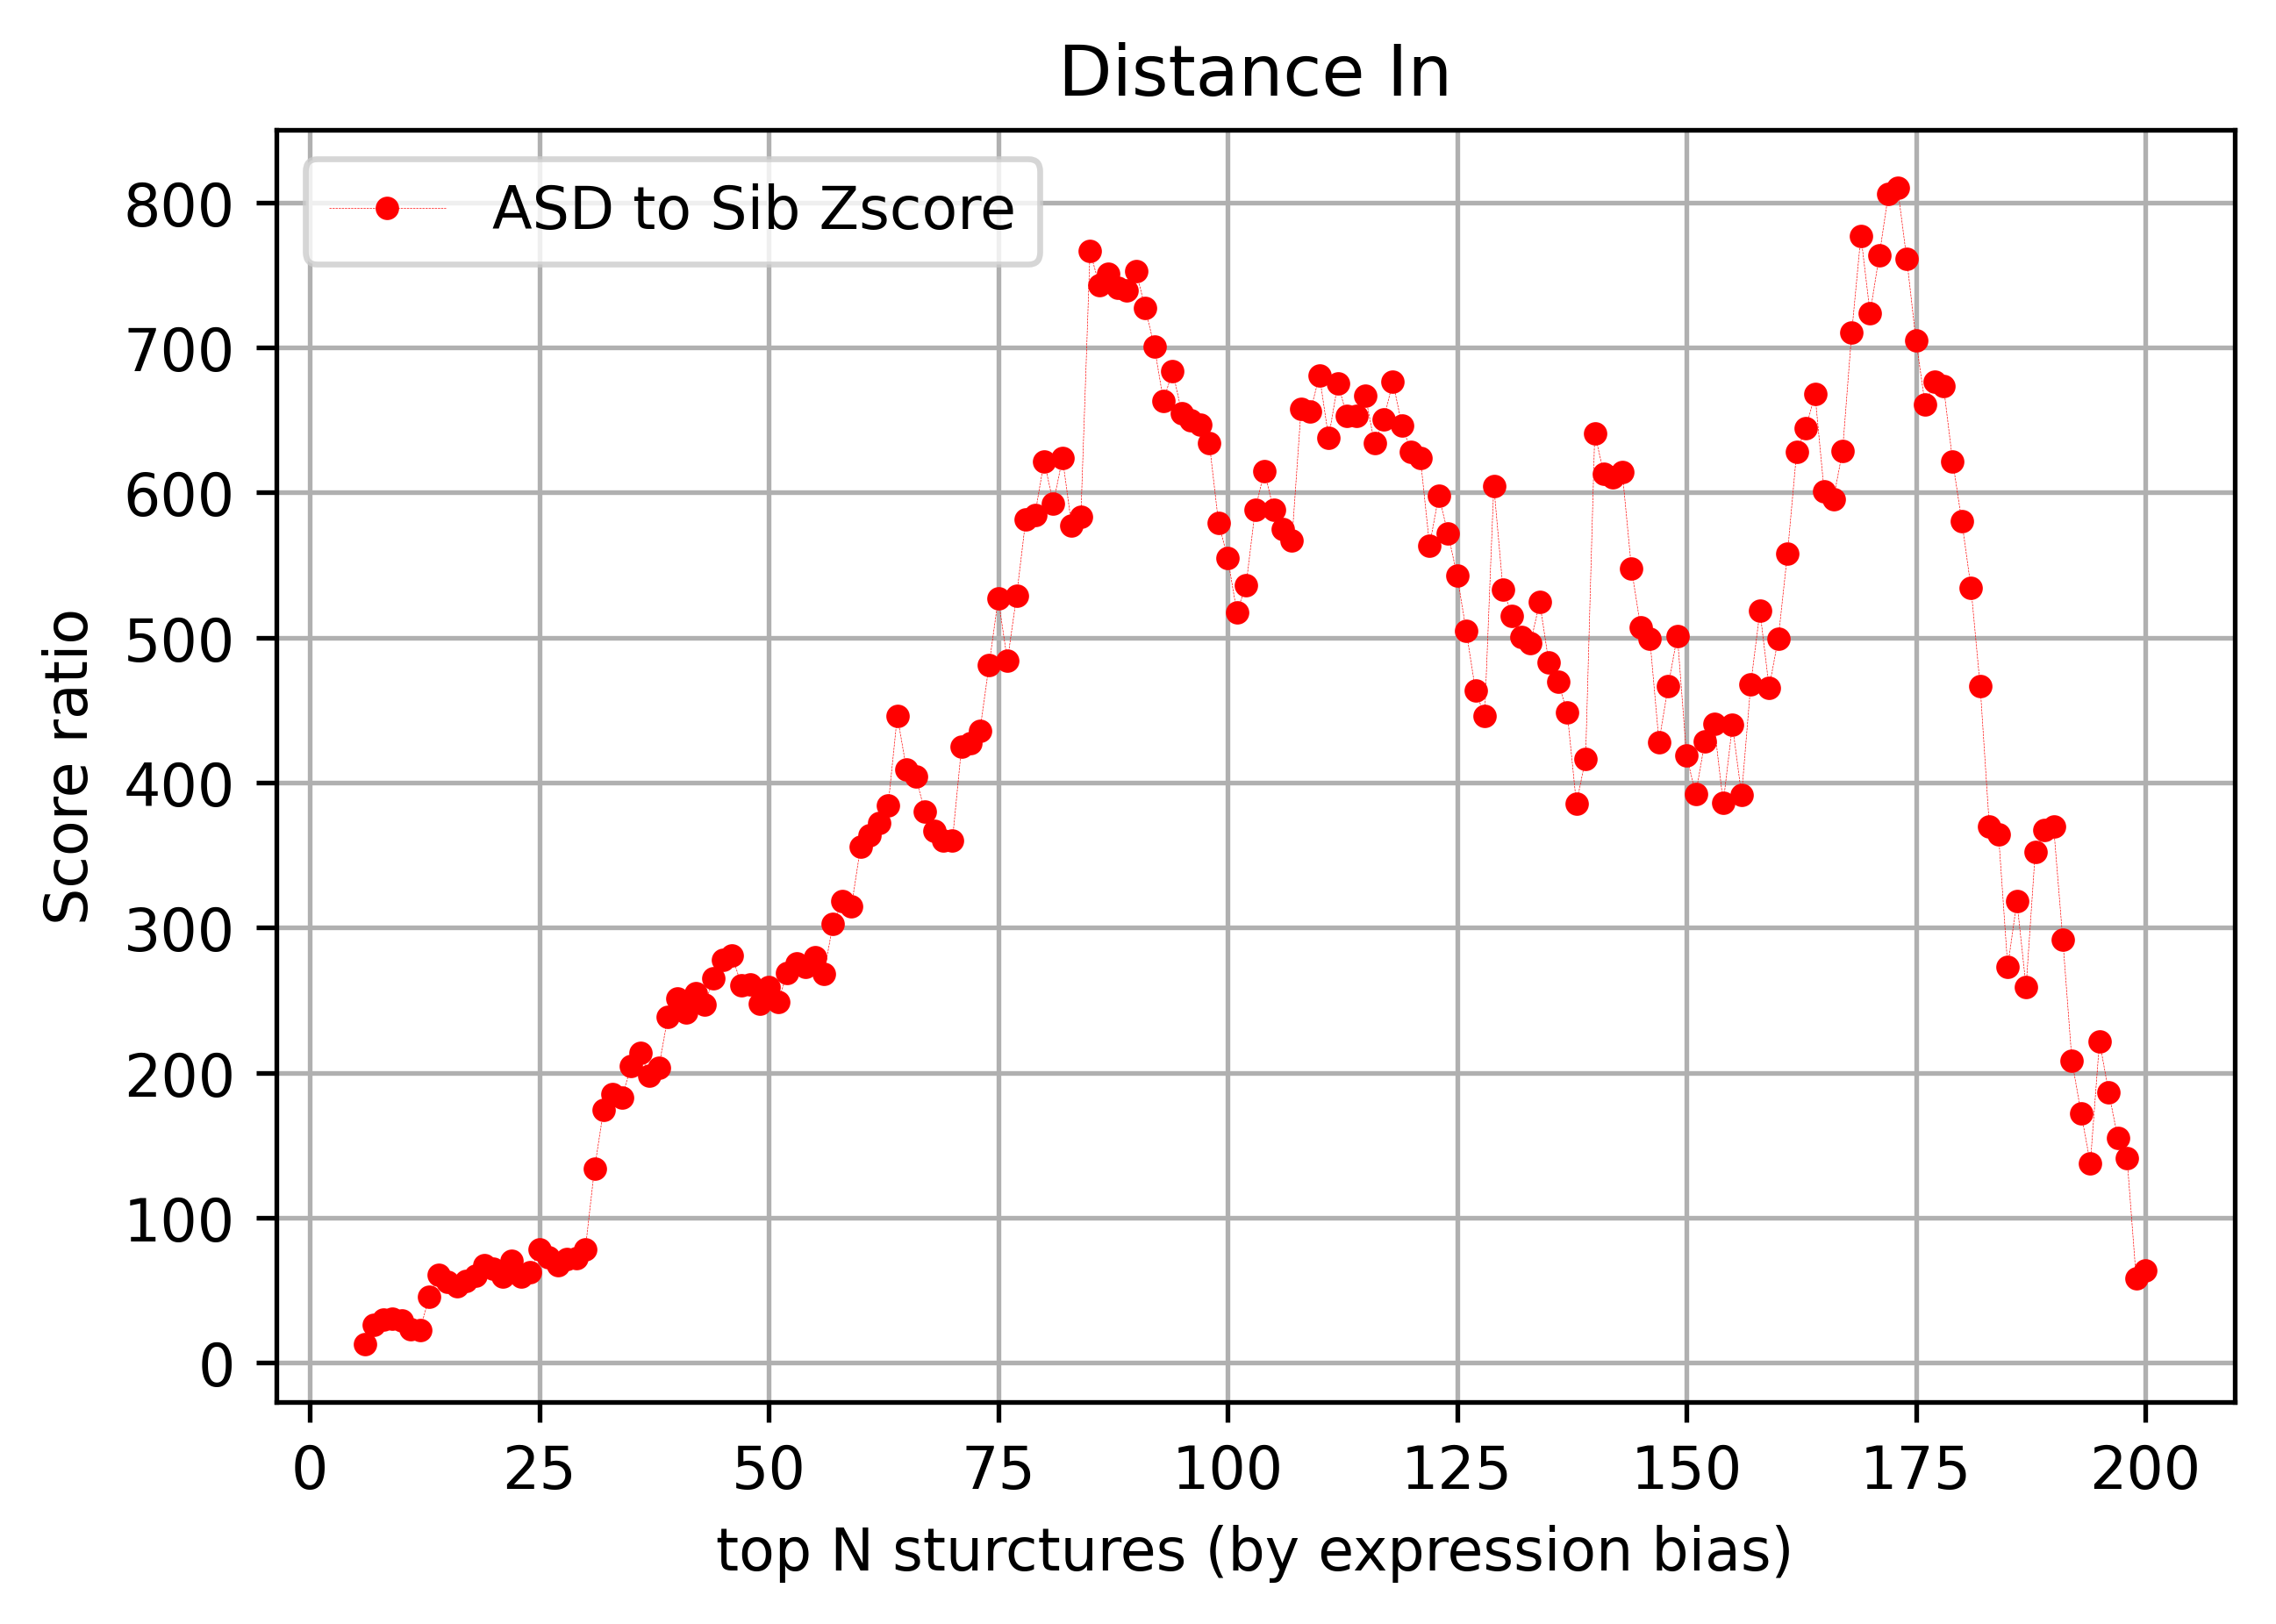

In [114]:
scores0 = run_profile(ASD_BiasDF.index.values, ScoreMat)
PlotingScore_profile(scores, Cont_Distance_In, "Distance In", method="diff")

/tmp/ipykernel_216019/1109656173.py:3: RuntimeWarning: overflow encountered in exp2
  PlotingScore_profile(np.exp2(scores), Cont_Distance_In, "Distance In", method="diff")


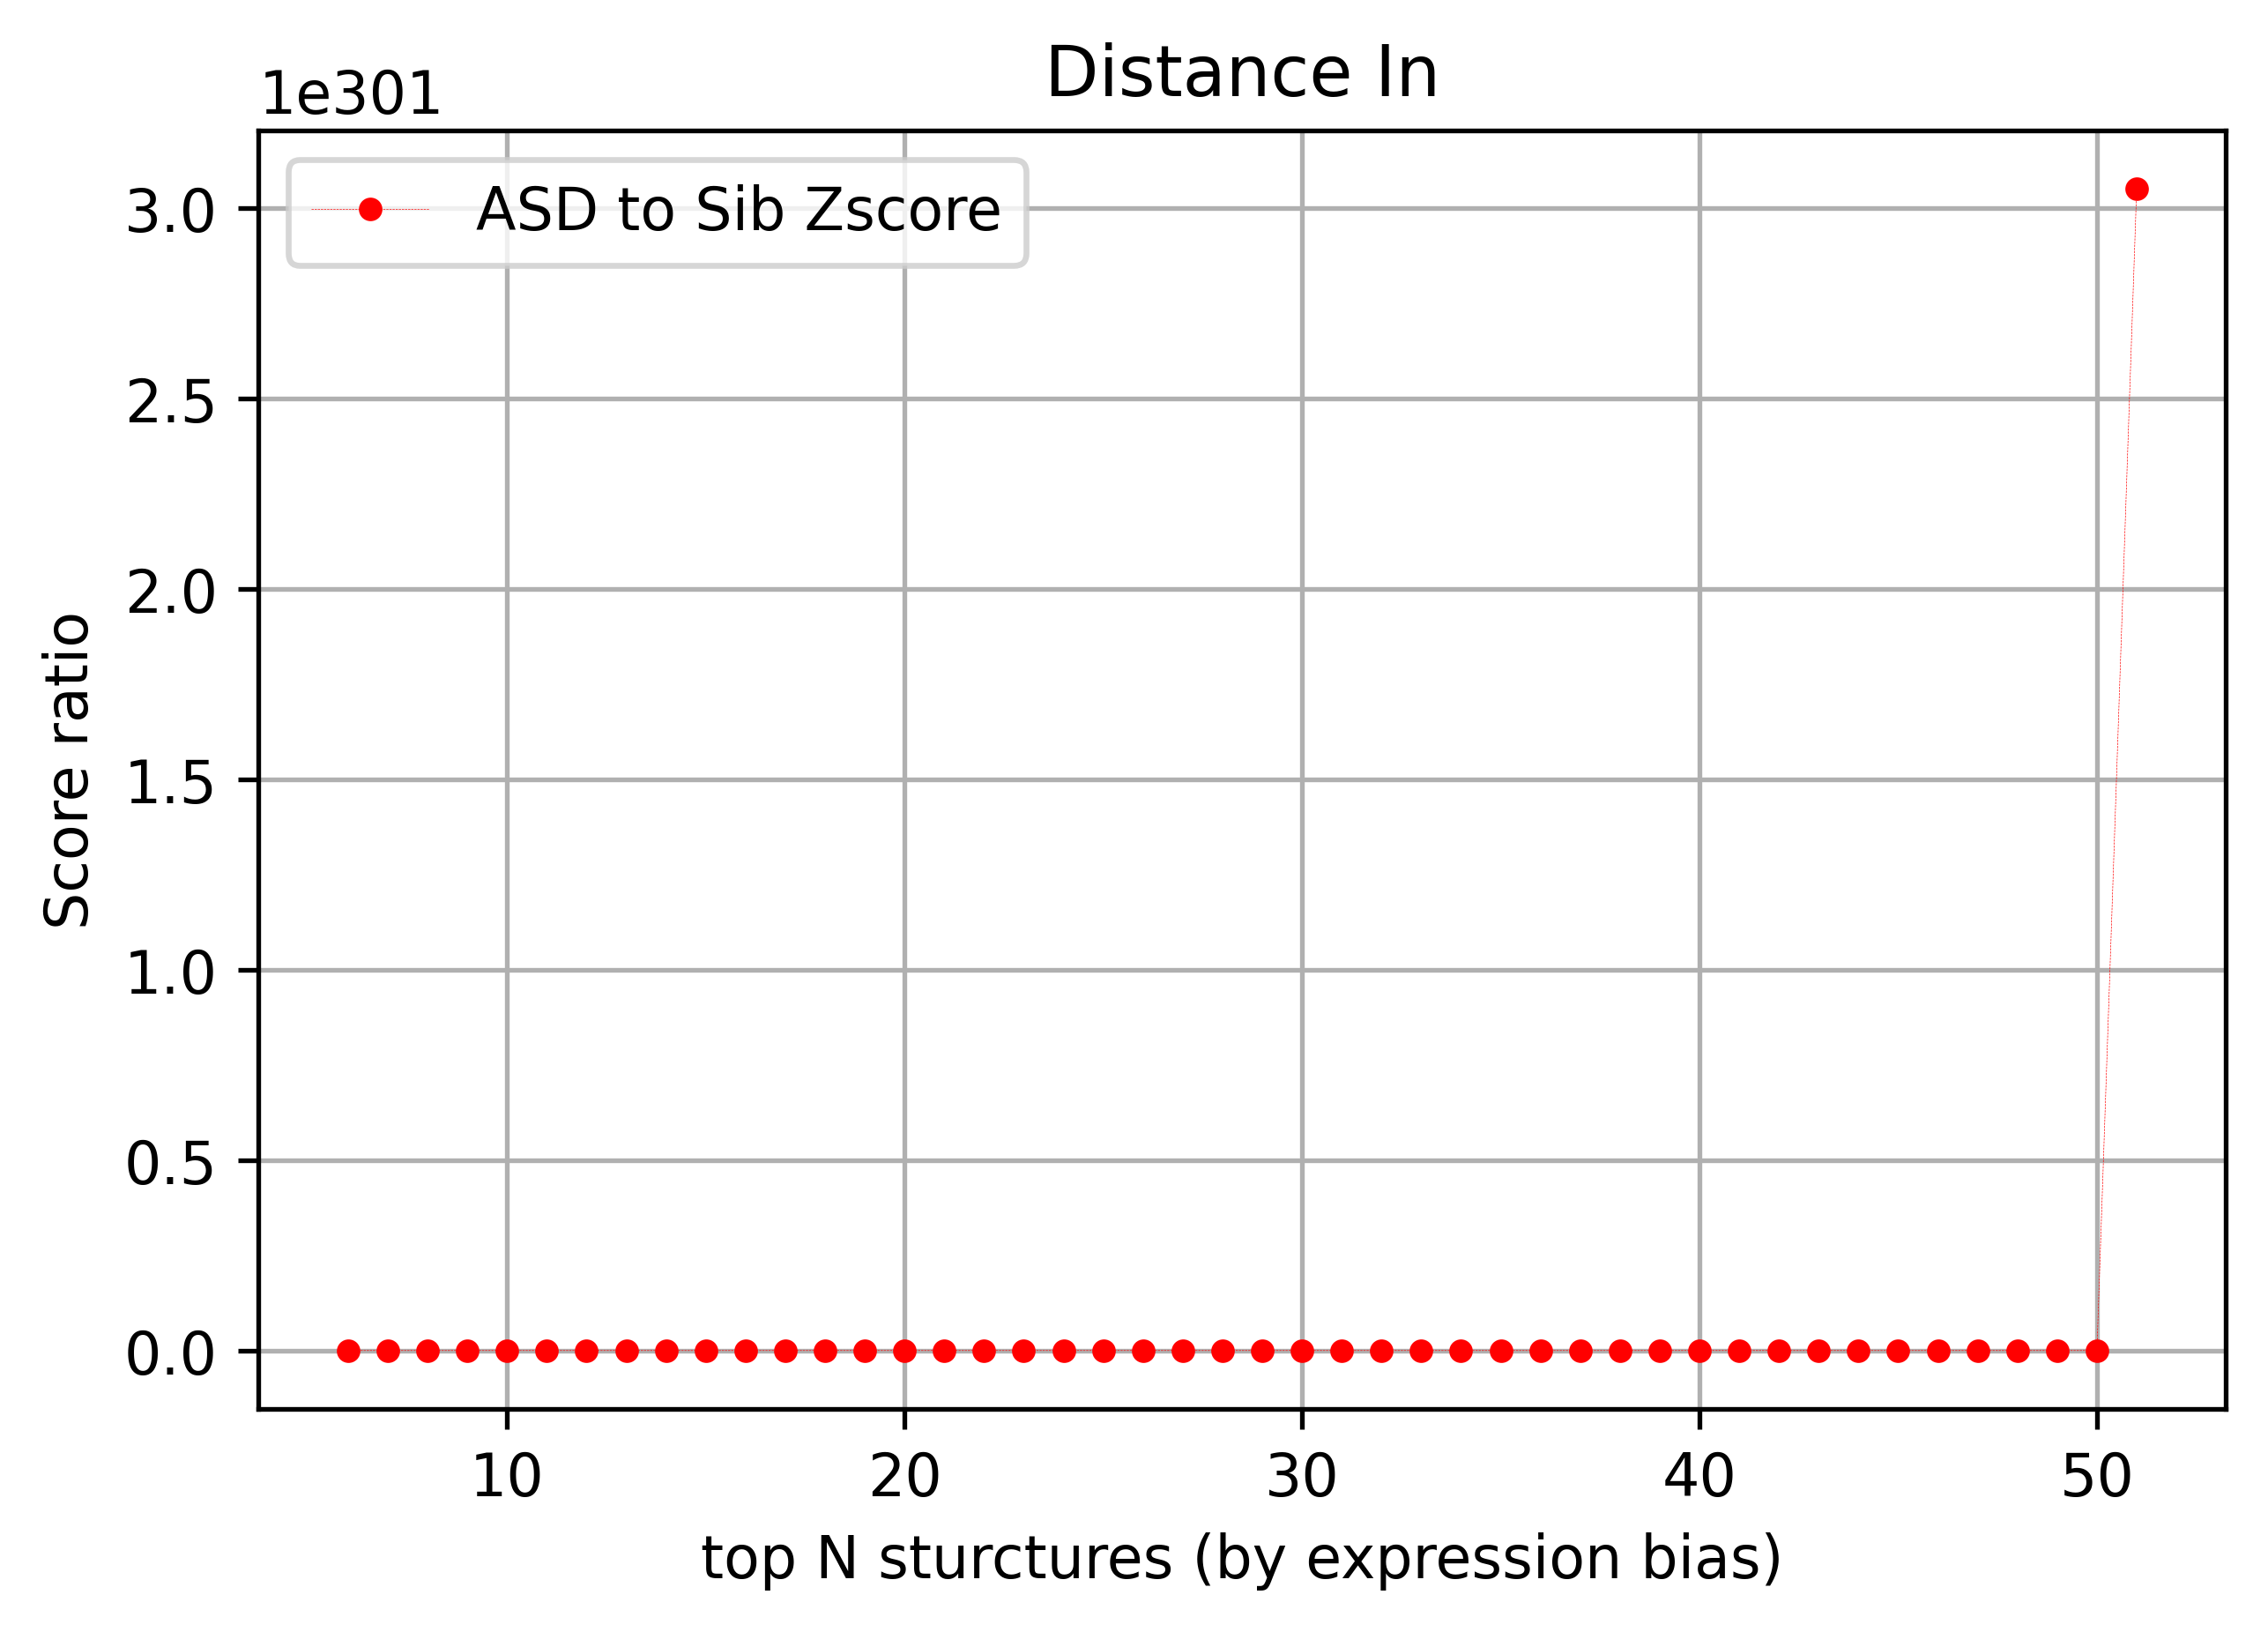

In [218]:
Shuff_Ranks = BlockShuffle(ASD_BiasDF.index.values, 30)
scores = run_profile(Shuff_Ranks, ScoreMat)
PlotingScore_profile(np.exp2(scores), Cont_Distance_In, "Distance In", method="diff")

In [174]:
idx_50 = np.where(topNs==50)[0][0]
idx_90 = np.where(topNs==90)[0][0]
idx_170 = np.where(topNs==170)[0][0]

In [176]:
# Get P values for different site 
scores_50, socres_90, scores_175 = [], [], []
for i in range(1000):
    Shuff_Ranks = BlockShuffle(ASD_BiasDF.index.values, 213)
    scores = run_profile(Shuff_Ranks, ScoreMat)
    xx = scores - Cont_Distance_In.mean(axis=0)
    #print(xx)
    scores_50.append(xx[idx_50])
    socres_90.append(xx[idx_90])
    scores_175.append(xx[idx_170])
    #print(xx.shape)

<AxesSubplot:title={'center':'170'}, xlabel='Score'>

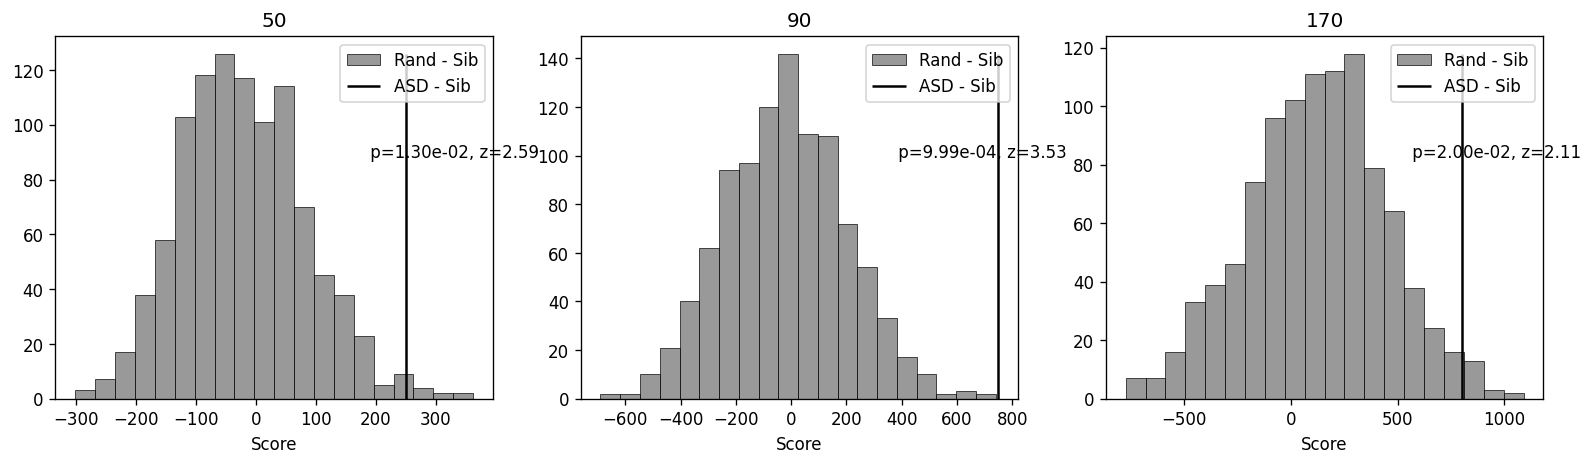

In [180]:
size = 50
idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2, ax3) = plt.subplots(1,3,dpi=120, figsize=(16,4))
PlotPermutationP(scores_50, 250, ax1,
                     title="50", xlabel="Score", 
                     dist_label="Rand - Sib", bar_label="ASD - Sib")
PlotPermutationP(socres_90, 750, ax2,
                     title="90", xlabel="Score", 
                     dist_label="Rand - Sib", bar_label="ASD - Sib")
PlotPermutationP(scores_175, 800, ax3,
                     title="170", xlabel="Score", 
                     dist_label="Rand - Sib", bar_label="ASD - Sib")

In [193]:
scores_50, socres_90, scores_175 = [], [], []
for i in range(1000):
    Shuff_Ranks = BlockShuffle(ASD_BiasDF.index.values, 50)
    scores = run_profile(Shuff_Ranks, ScoreMat)
    xx = scores - Cont_Distance_In.mean(axis=0)
    #print(xx)
    scores_50.append(xx[idx_50])
    socres_90.append(xx[idx_90])
    scores_175.append(xx[idx_170])

<AxesSubplot:title={'center':'170'}, xlabel='Score'>

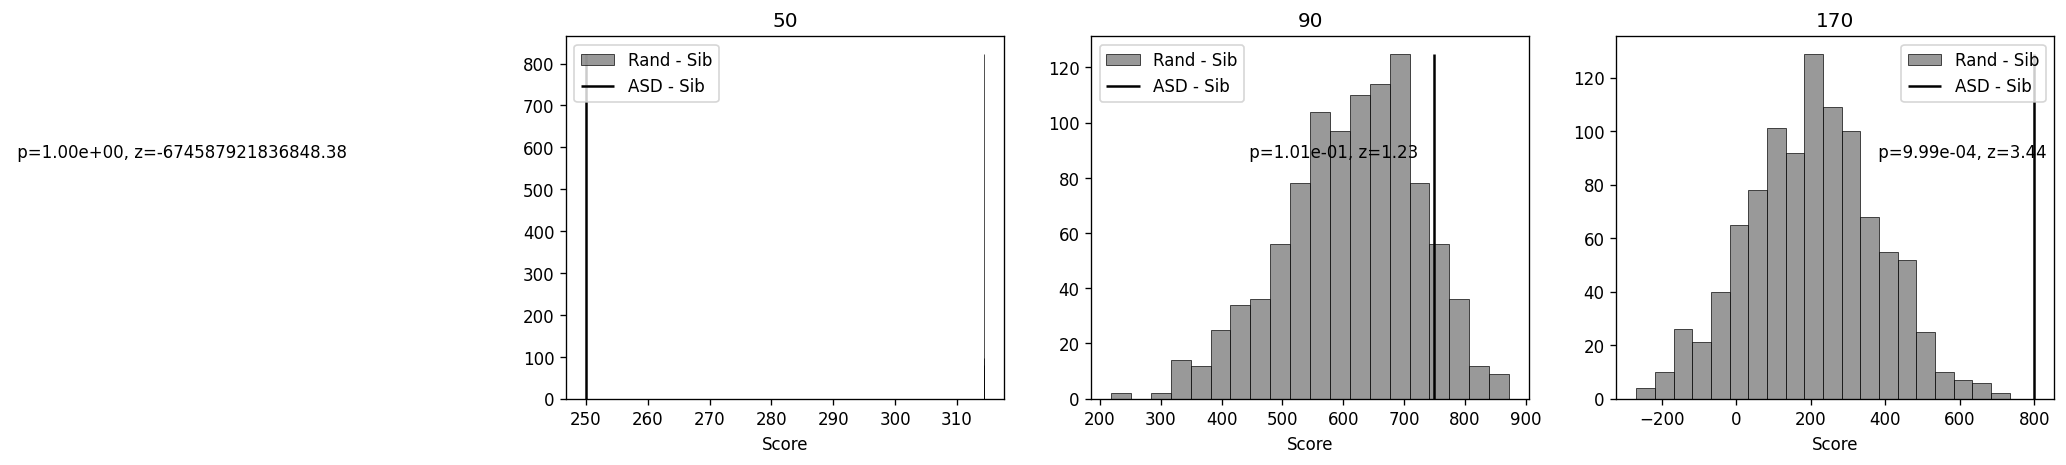

In [194]:
idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2, ax3) = plt.subplots(1,3,dpi=120, figsize=(16,4))
PlotPermutationP(scores_50, 250, ax1,
                     title="50", xlabel="Score", 
                     dist_label="Rand - Sib", bar_label="ASD - Sib")
PlotPermutationP(socres_90, 750, ax2,
                     title="90", xlabel="Score", 
                     dist_label="Rand - Sib", bar_label="ASD - Sib")
PlotPermutationP(scores_175, 800, ax3,
                     title="170", xlabel="Score", 
                     dist_label="Rand - Sib", bar_label="ASD - Sib")

In [196]:
scores_50, socres_90, scores_175 = [], [], []
for i in range(1000):
    Shuff_Ranks = BlockShuffle(ASD_BiasDF.index.values, 60)
    scores = run_profile(Shuff_Ranks, ScoreMat)
    xx = scores - Cont_Distance_In.mean(axis=0)
    #print(xx)
    scores_50.append(xx[idx_50])
    socres_90.append(xx[idx_90])
    scores_175.append(xx[idx_170])

<AxesSubplot:title={'center':'170'}, xlabel='Score'>

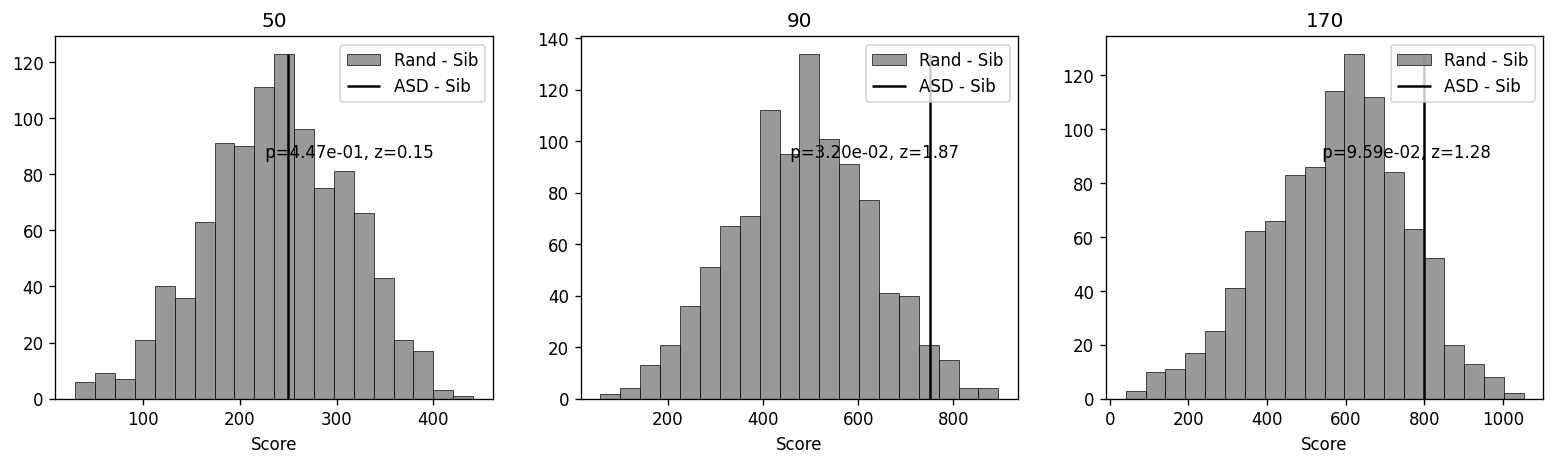

In [197]:
idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2, ax3) = plt.subplots(1,3,dpi=120, figsize=(16,4))
PlotPermutationP(scores_50, 250, ax1,
                     title="50", xlabel="Score", 
                     dist_label="Rand - Sib", bar_label="ASD - Sib")
PlotPermutationP(socres_90, 750, ax2,
                     title="90", xlabel="Score", 
                     dist_label="Rand - Sib", bar_label="ASD - Sib")
PlotPermutationP(scores_175, 800, ax3,
                     title="170", xlabel="Score", 
                     dist_label="Rand - Sib", bar_label="ASD - Sib")

In [209]:
scores_50, socres_90, scores_175 = [], [], []
All_rands = []
for i in range(100):
    Shuff_Ranks = BlockShuffle(ASD_BiasDF.index.values, 125)
    scores = run_profile(Shuff_Ranks, ScoreMat)
    xx = scores - Cont_Distance_In.mean(axis=0)
    #print(xx)
    scores_50.append(xx[idx_50])
    socres_90.append(xx[idx_90])
    scores_175.append(xx[idx_170])
    All_rands.append(xx)
All_rands = np.array(All_rands)

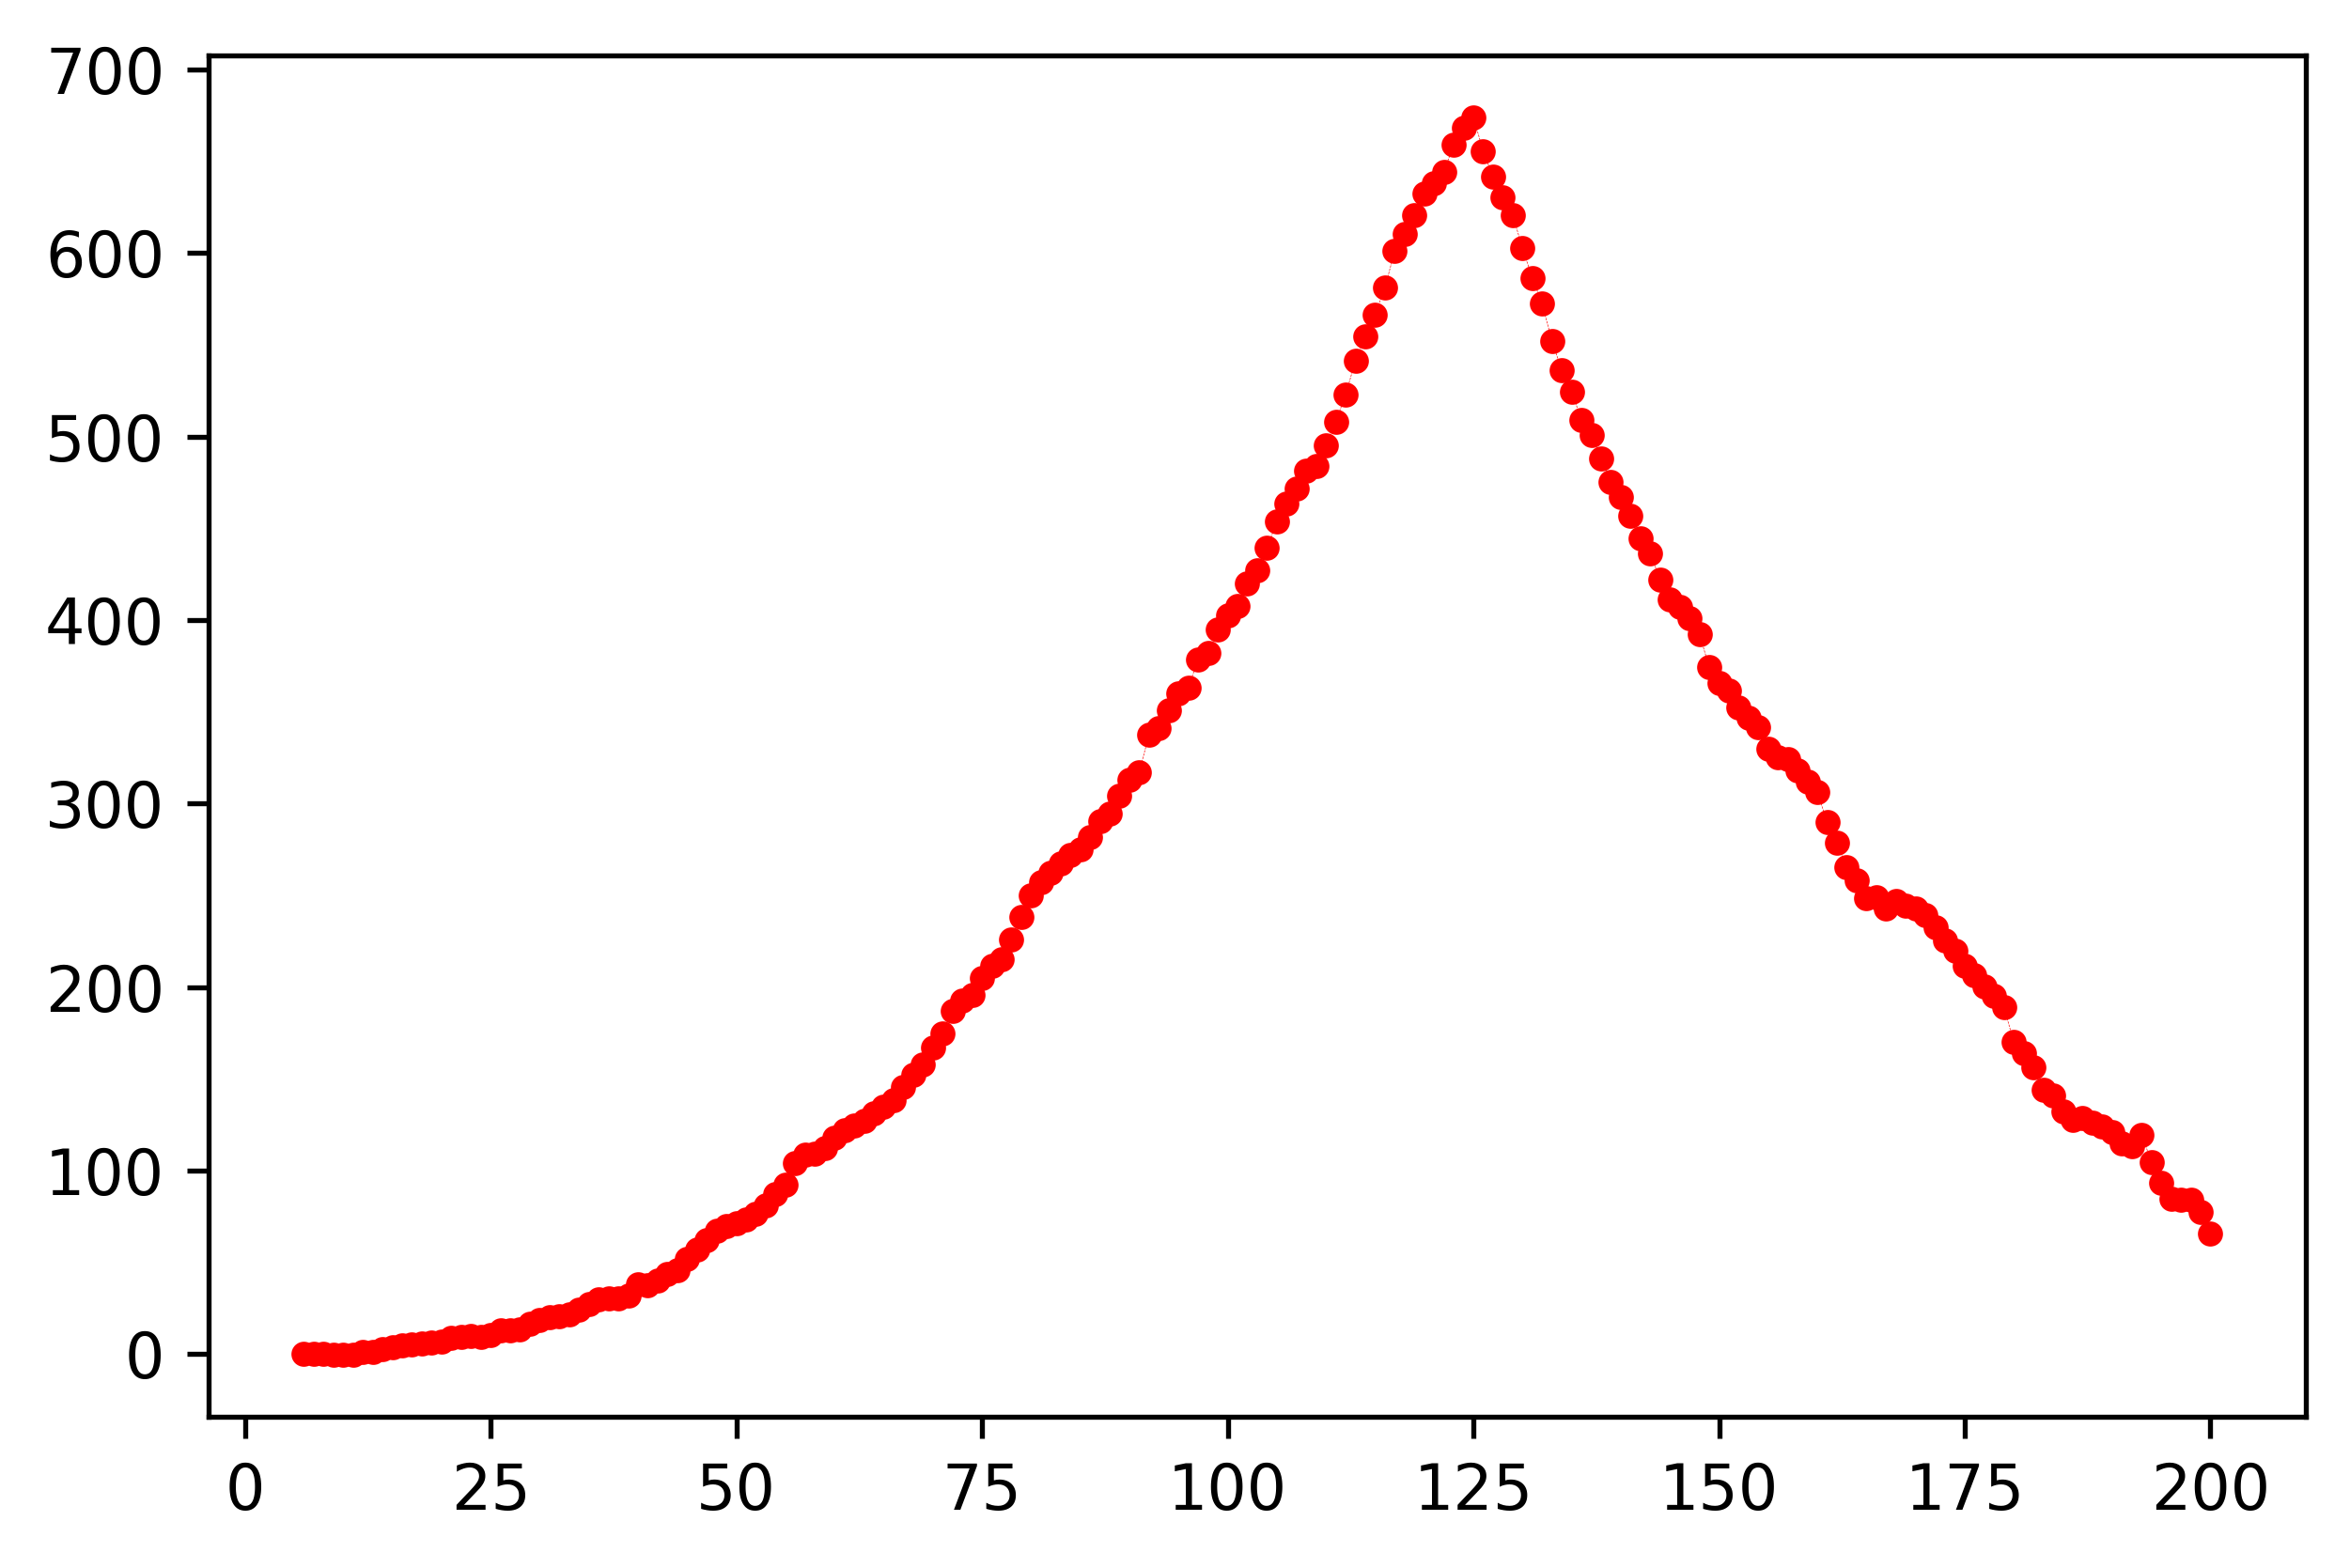

In [212]:
fig, ax = plt.subplots(dpi=480)
ax.plot(topNs, All_rands.mean(axis=0), color="red", marker="o", markersize=3, lw=0.1,
                     ls="dashed", label="ASD to Sib Zscore")

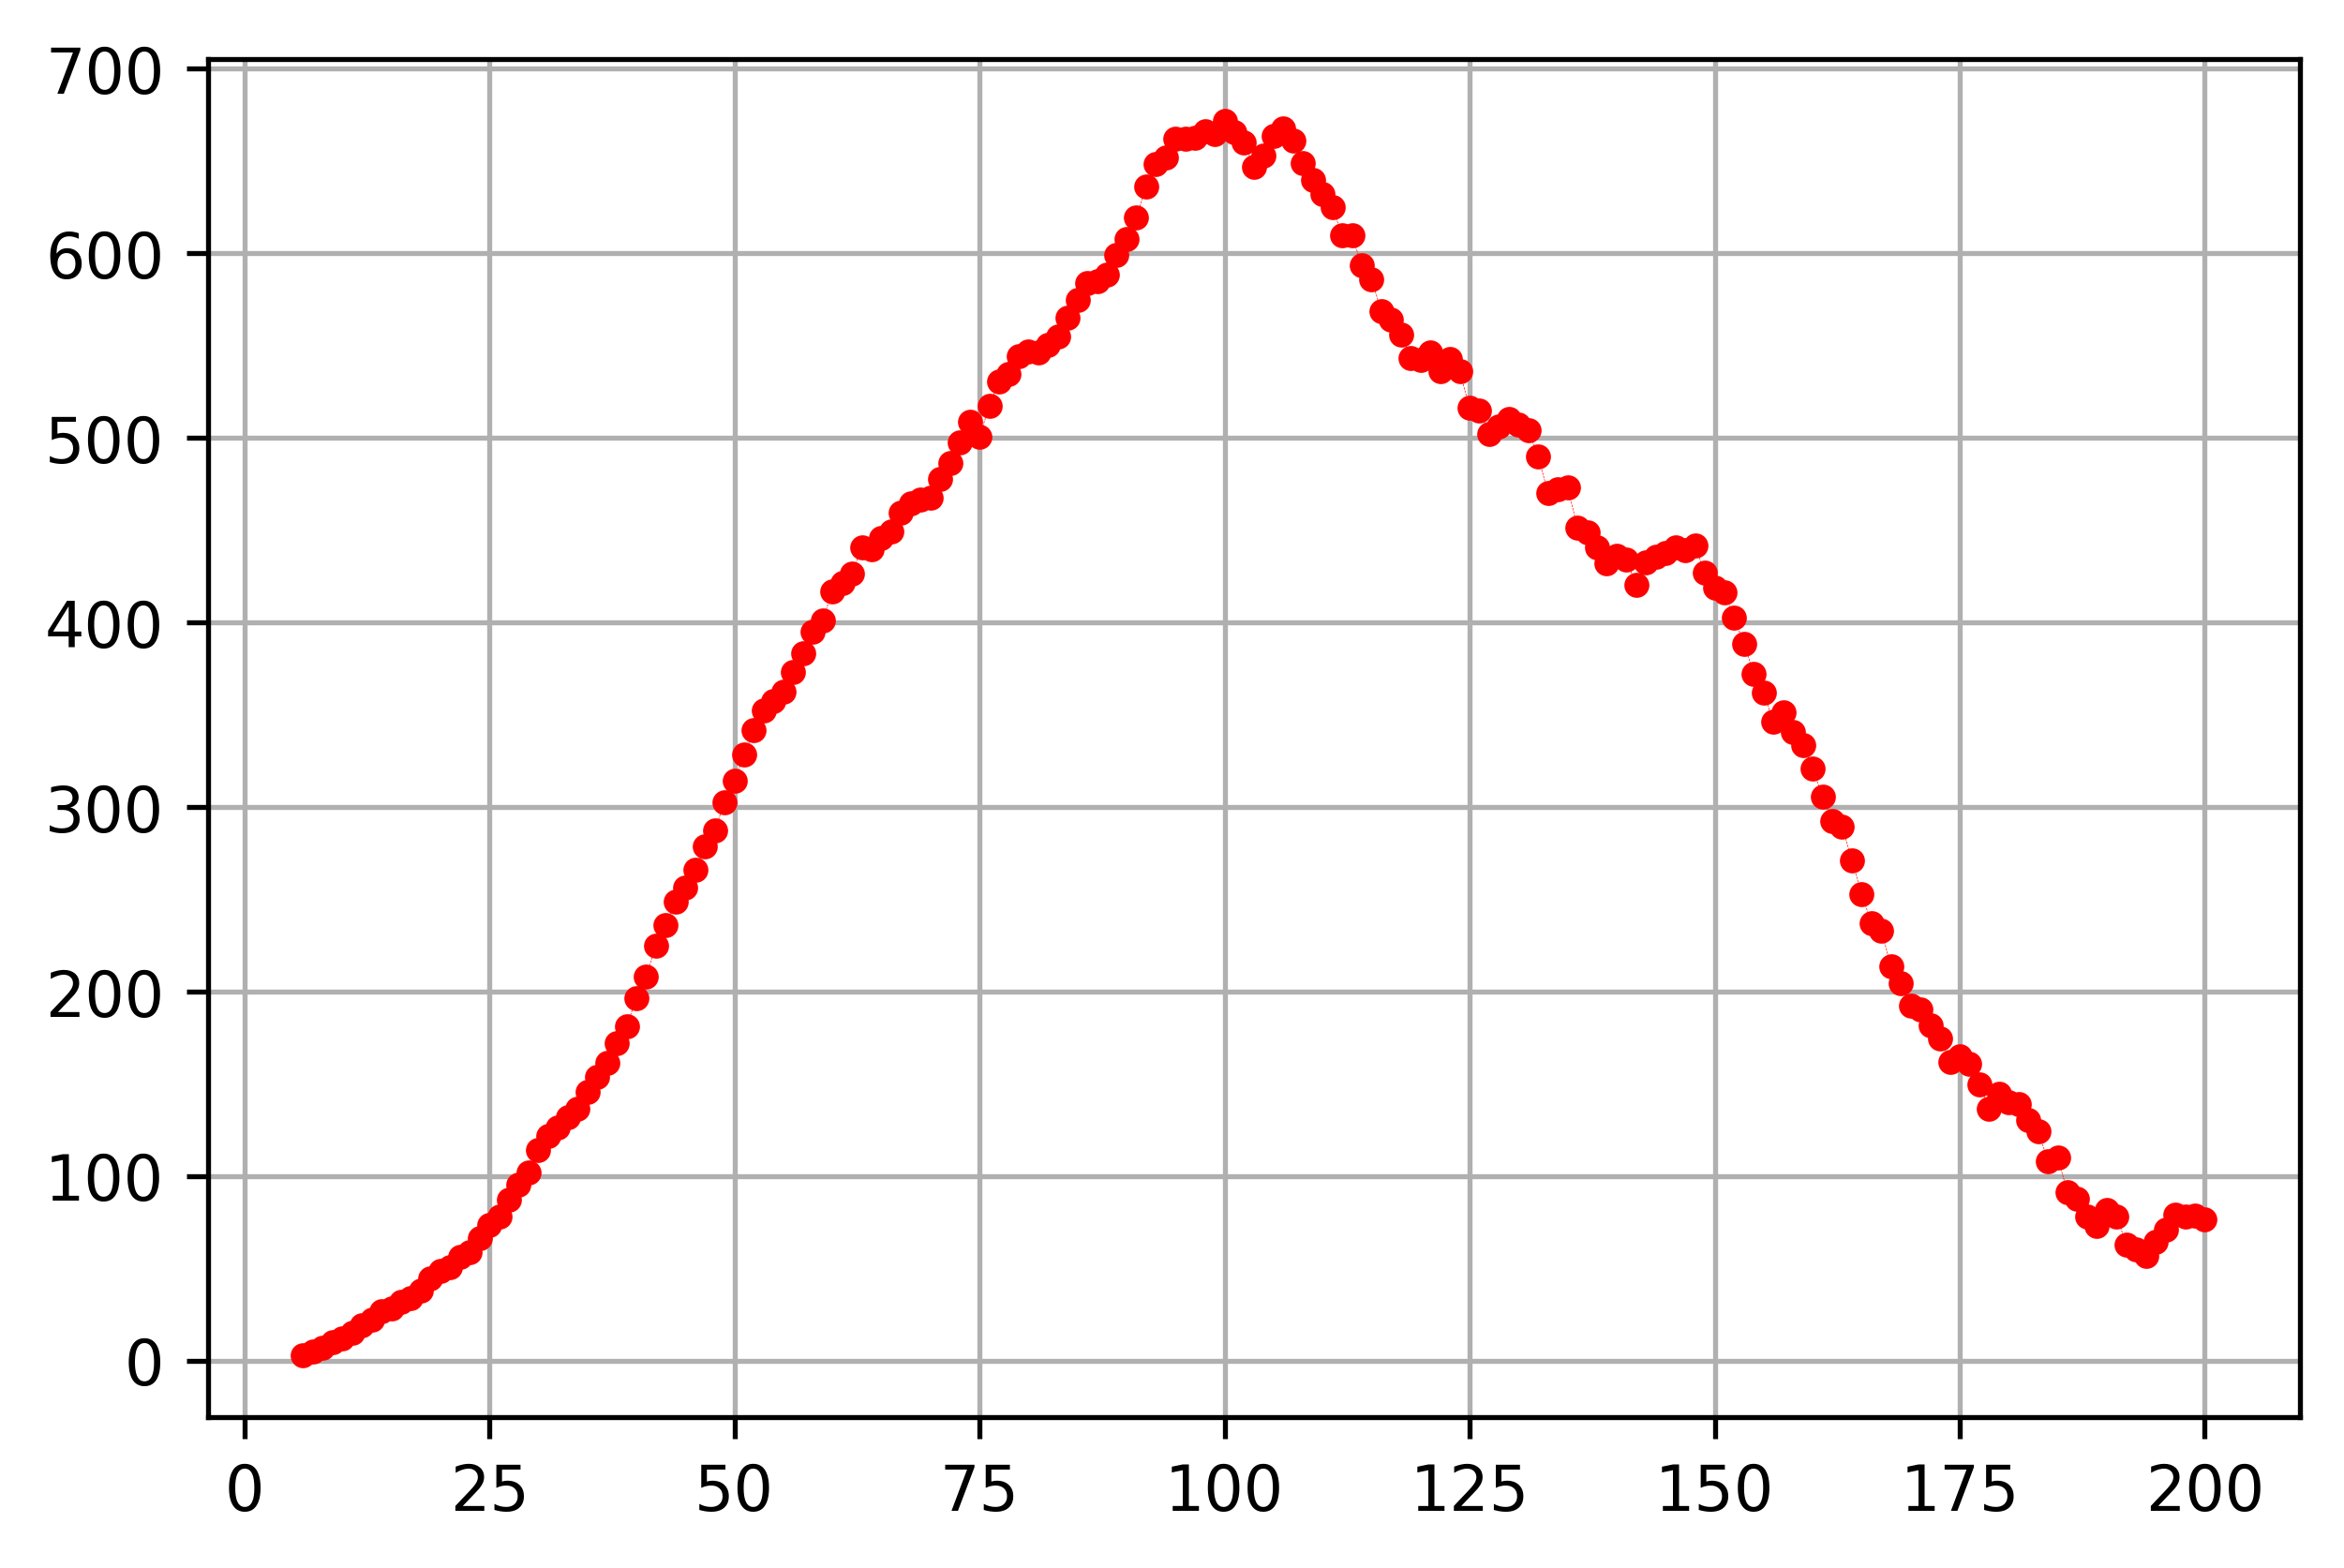

In [215]:
scores_50, socres_90, scores_175 = [], [], []
All_rands = []
for i in range(50):
    Shuff_Ranks = BlockShuffle(ASD_BiasDF.index.values, 50)
    scores = run_profile(Shuff_Ranks, ScoreMat)
    xx = scores - Cont_Distance_In.mean(axis=0)
    #print(xx)
    scores_50.append(xx[idx_50])
    socres_90.append(xx[idx_90])
    scores_175.append(xx[idx_170])
    All_rands.append(xx)
All_rands = np.array(All_rands)
fig, ax = plt.subplots(dpi=480)
ax.plot(topNs, All_rands.mean(axis=0), color="red", marker="o", markersize=3, lw=0.1,
                     ls="dashed", label="ASD to Sib Zscore")
ax.grid(True)

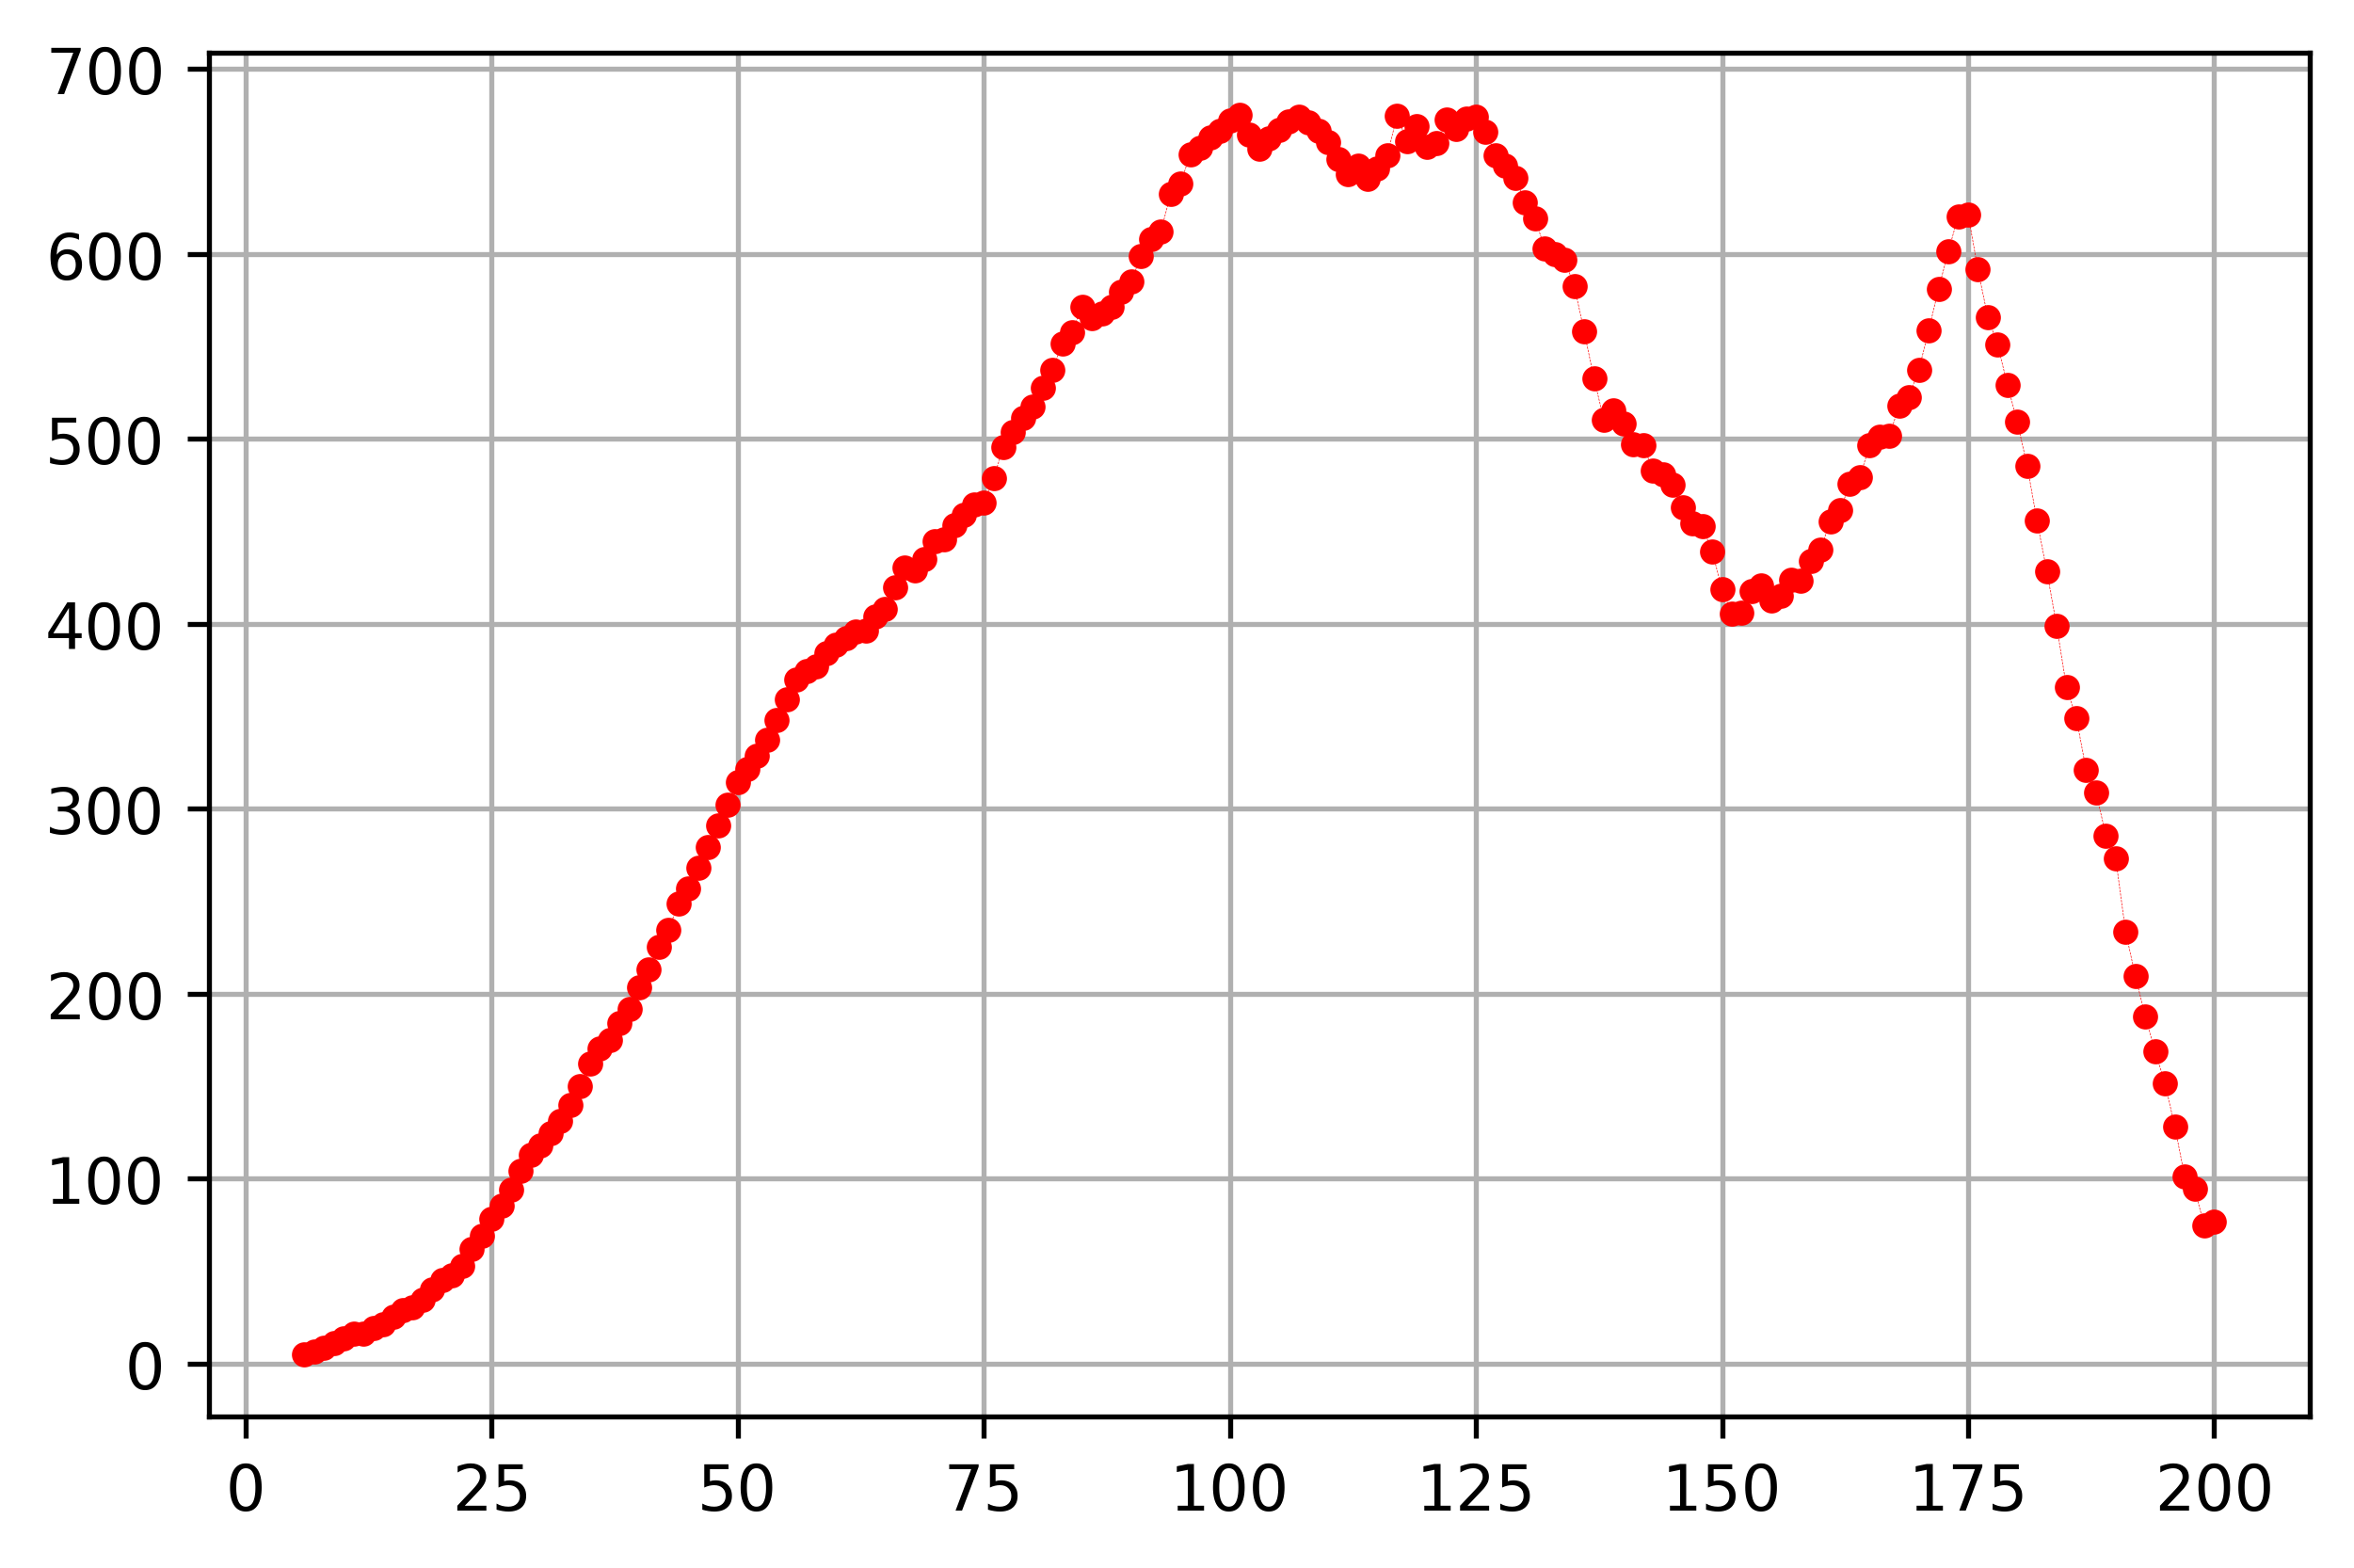

In [217]:
scores_50, socres_90, scores_175 = [], [], []
All_rands = []
for i in range(50):
    Shuff_Ranks = BlockShuffle(ASD_BiasDF.index.values, 25)
    scores = run_profile(Shuff_Ranks, ScoreMat)
    xx = scores - Cont_Distance_In.mean(axis=0)
    #print(xx)
    scores_50.append(xx[idx_50])
    socres_90.append(xx[idx_90])
    scores_175.append(xx[idx_170])
    All_rands.append(xx)
All_rands = np.array(All_rands)
fig, ax = plt.subplots(dpi=480)
ax.plot(topNs, All_rands.mean(axis=0), color="red", marker="o", markersize=3, lw=0.1,
                     ls="dashed", label="ASD to Sib Zscore")
ax.grid(True)

<AxesSubplot:title={'center':'Likelihood Inside / Outside Circuit'}, xlabel='Score'>

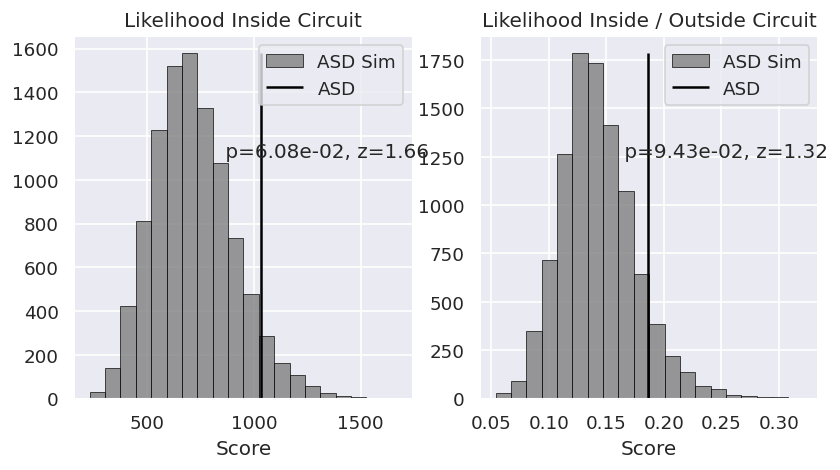

In [257]:
size = 50
idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2) = plt.subplots(1,2,dpi=120, figsize=(8,4))
PlotPermutationP(Cont_Distance_In[:, idx], ASD_Distance_In[idx], ax1,
                     title="Likelihood Inside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")
PlotPermutationP(Cont_Distance_InOut[:, idx], ASD_Distance_InOut[idx], ax2,
                     title="Likelihood Inside / Outside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")

In [4]:
ASD_Distance_In_Short = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.DistanceShort.ASD.In.npy")
Cont_Distance_In_Short = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.DistanceShort.Cont.In.npy")

ASD_Distance_In_Long = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.DistanceLong.ASD.In.npy")
Cont_Distance_In_Long = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.DistanceLong.Cont.In.npy")

<AxesSubplot:title={'center':'Likelihood Inside / Outside Circuit'}, xlabel='Score'>

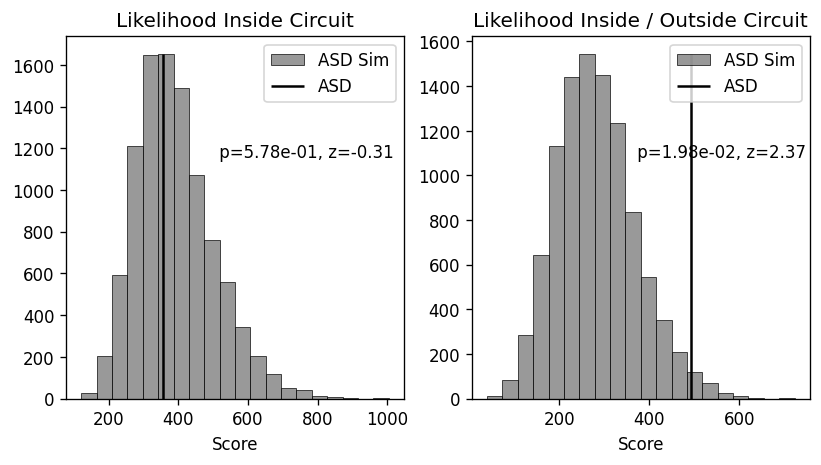

In [15]:
size = 50
idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2) = plt.subplots(1,2,dpi=120, figsize=(8,4))
PlotPermutationP(Cont_Distance_In_Short[:, idx], ASD_Distance_In_Short[idx], ax1,
                     title="Likelihood Inside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")
PlotPermutationP(Cont_Distance_In_Long[:, idx], ASD_Distance_In_Long[idx], ax2,
                     title="Likelihood Inside / Outside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")

/tmp/ipykernel_3307799/419305540.py:4: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3455: RuntimeWarning: invalid value encountered in double_scalars
  low = [v if lo else v - e for v, e, lo in zip(data, a, lolims)]
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3456: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
/tmp/ipykernel_3307799/419305540.py:4: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3455: RuntimeWarning: invalid value encountered in double_scalars
  low = [v if lo else v - e for v, e, lo in zip(d

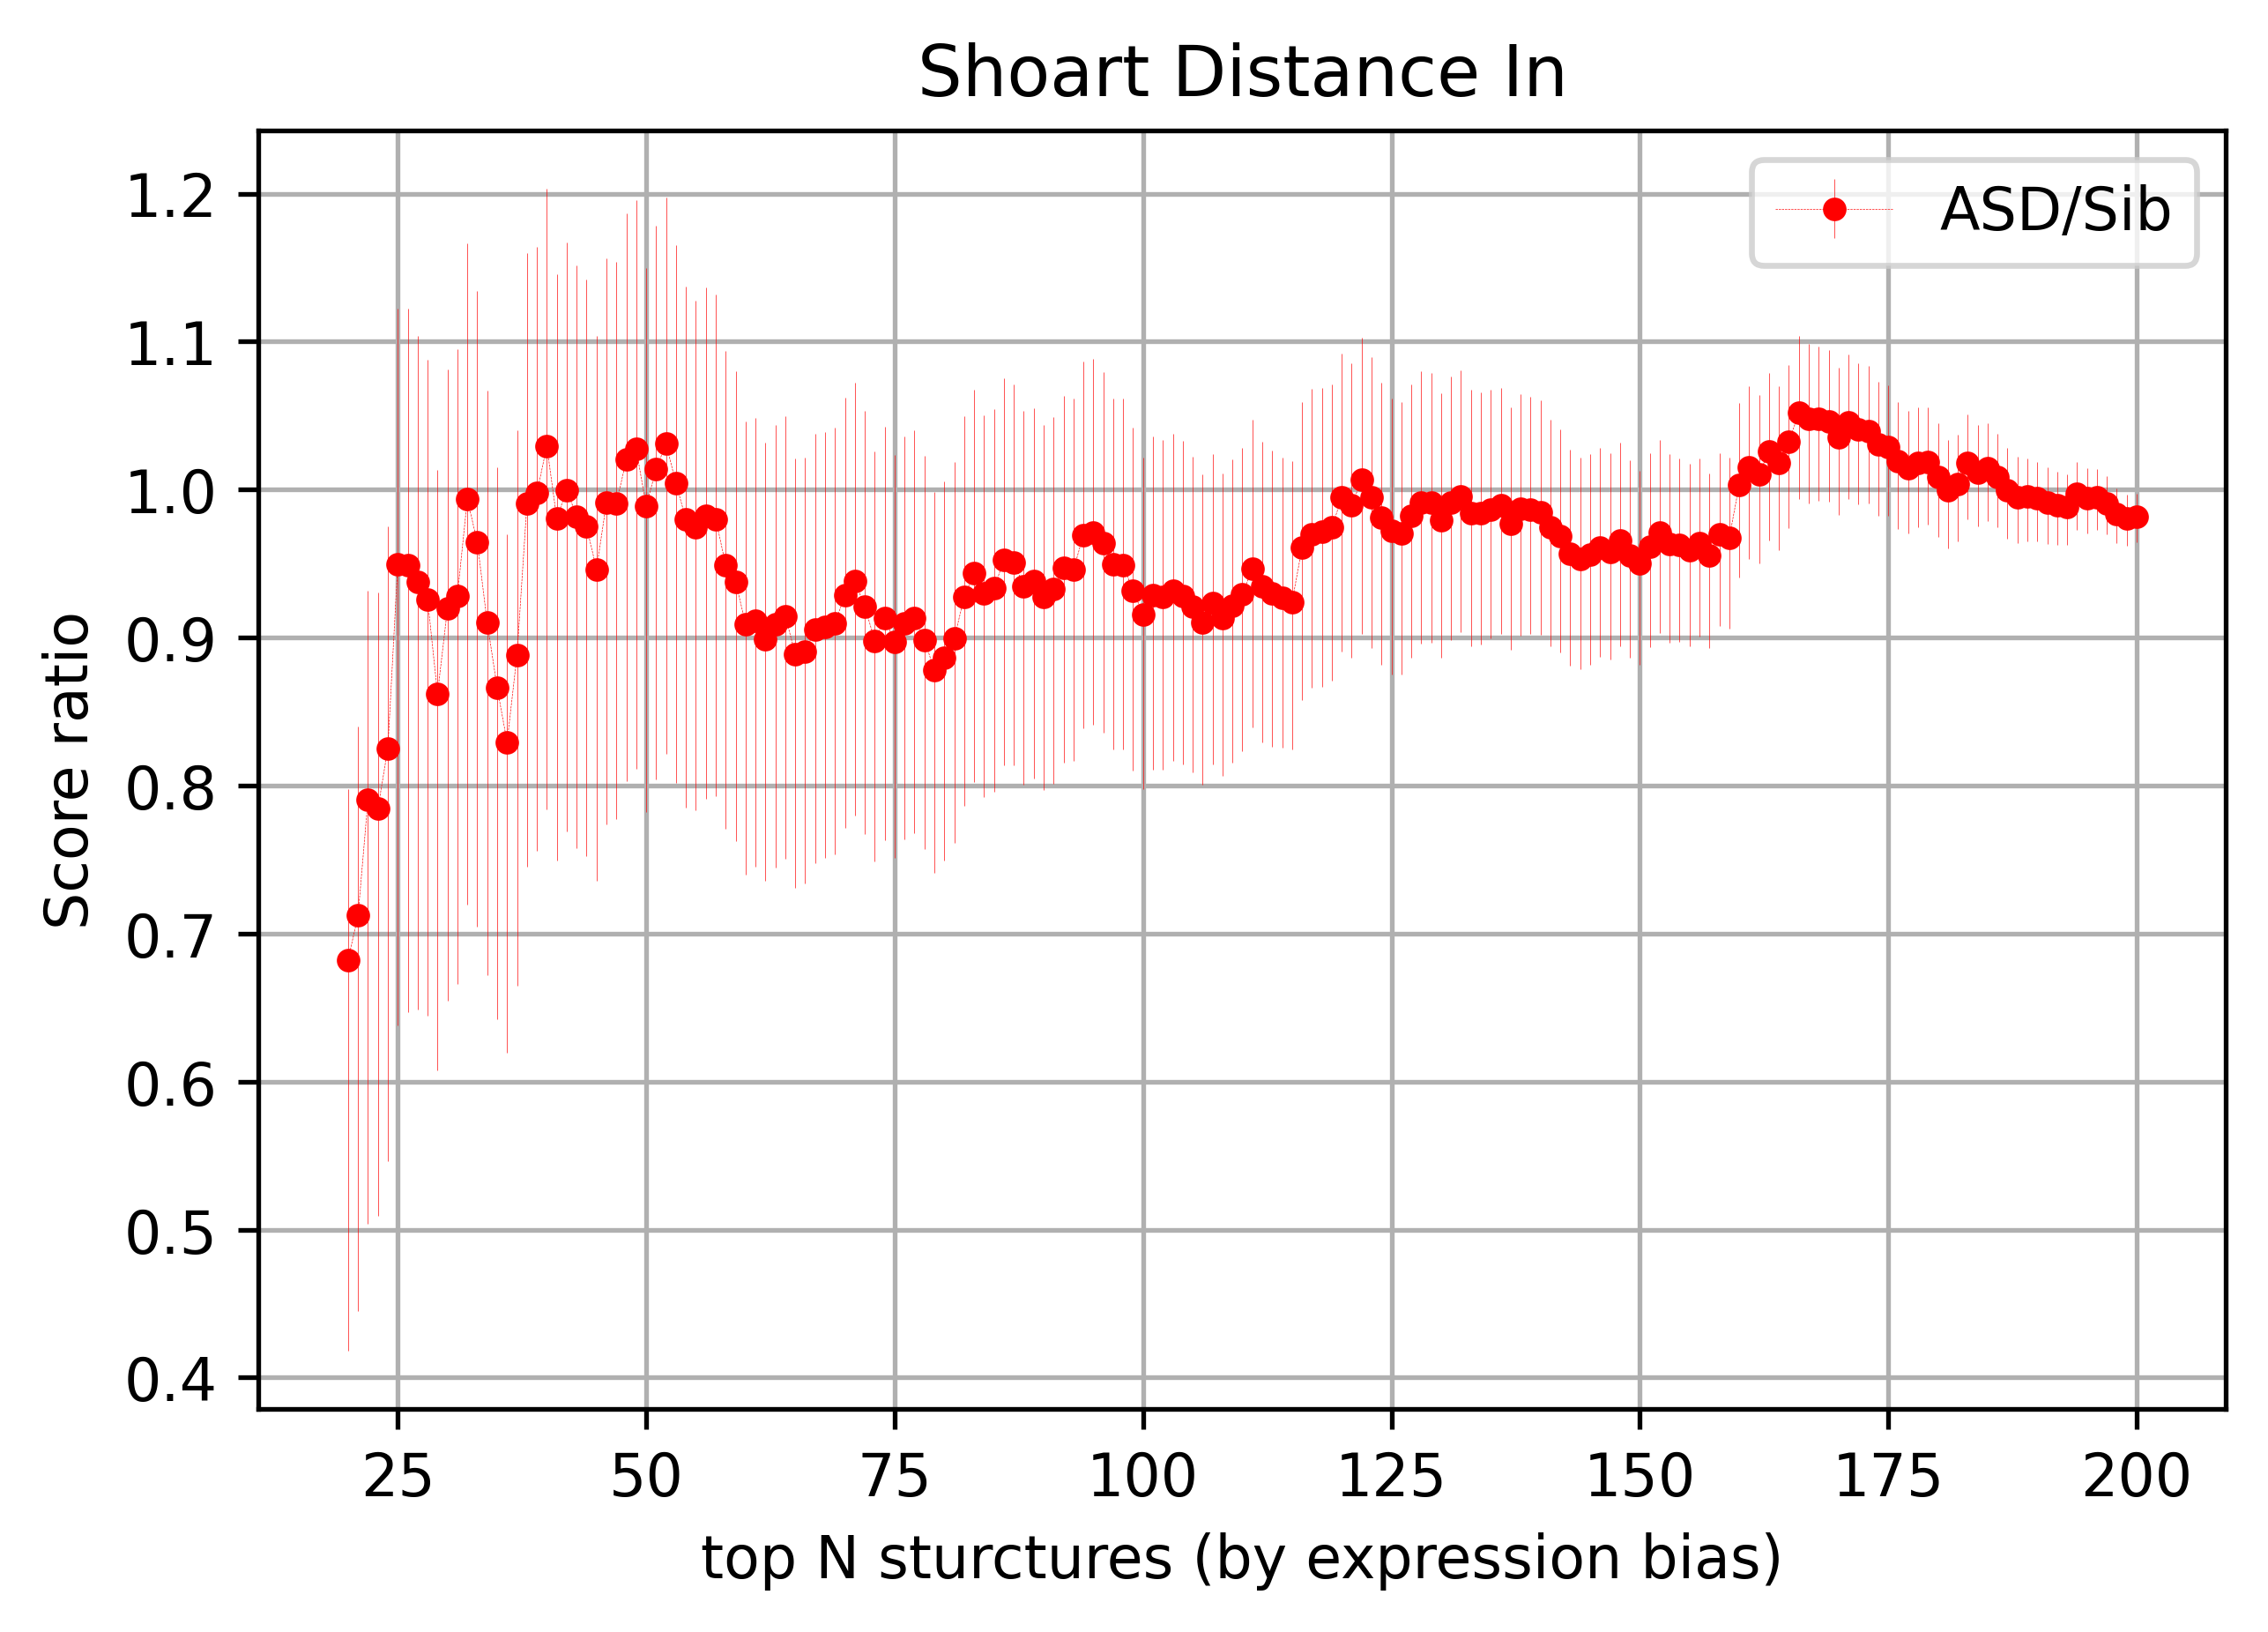

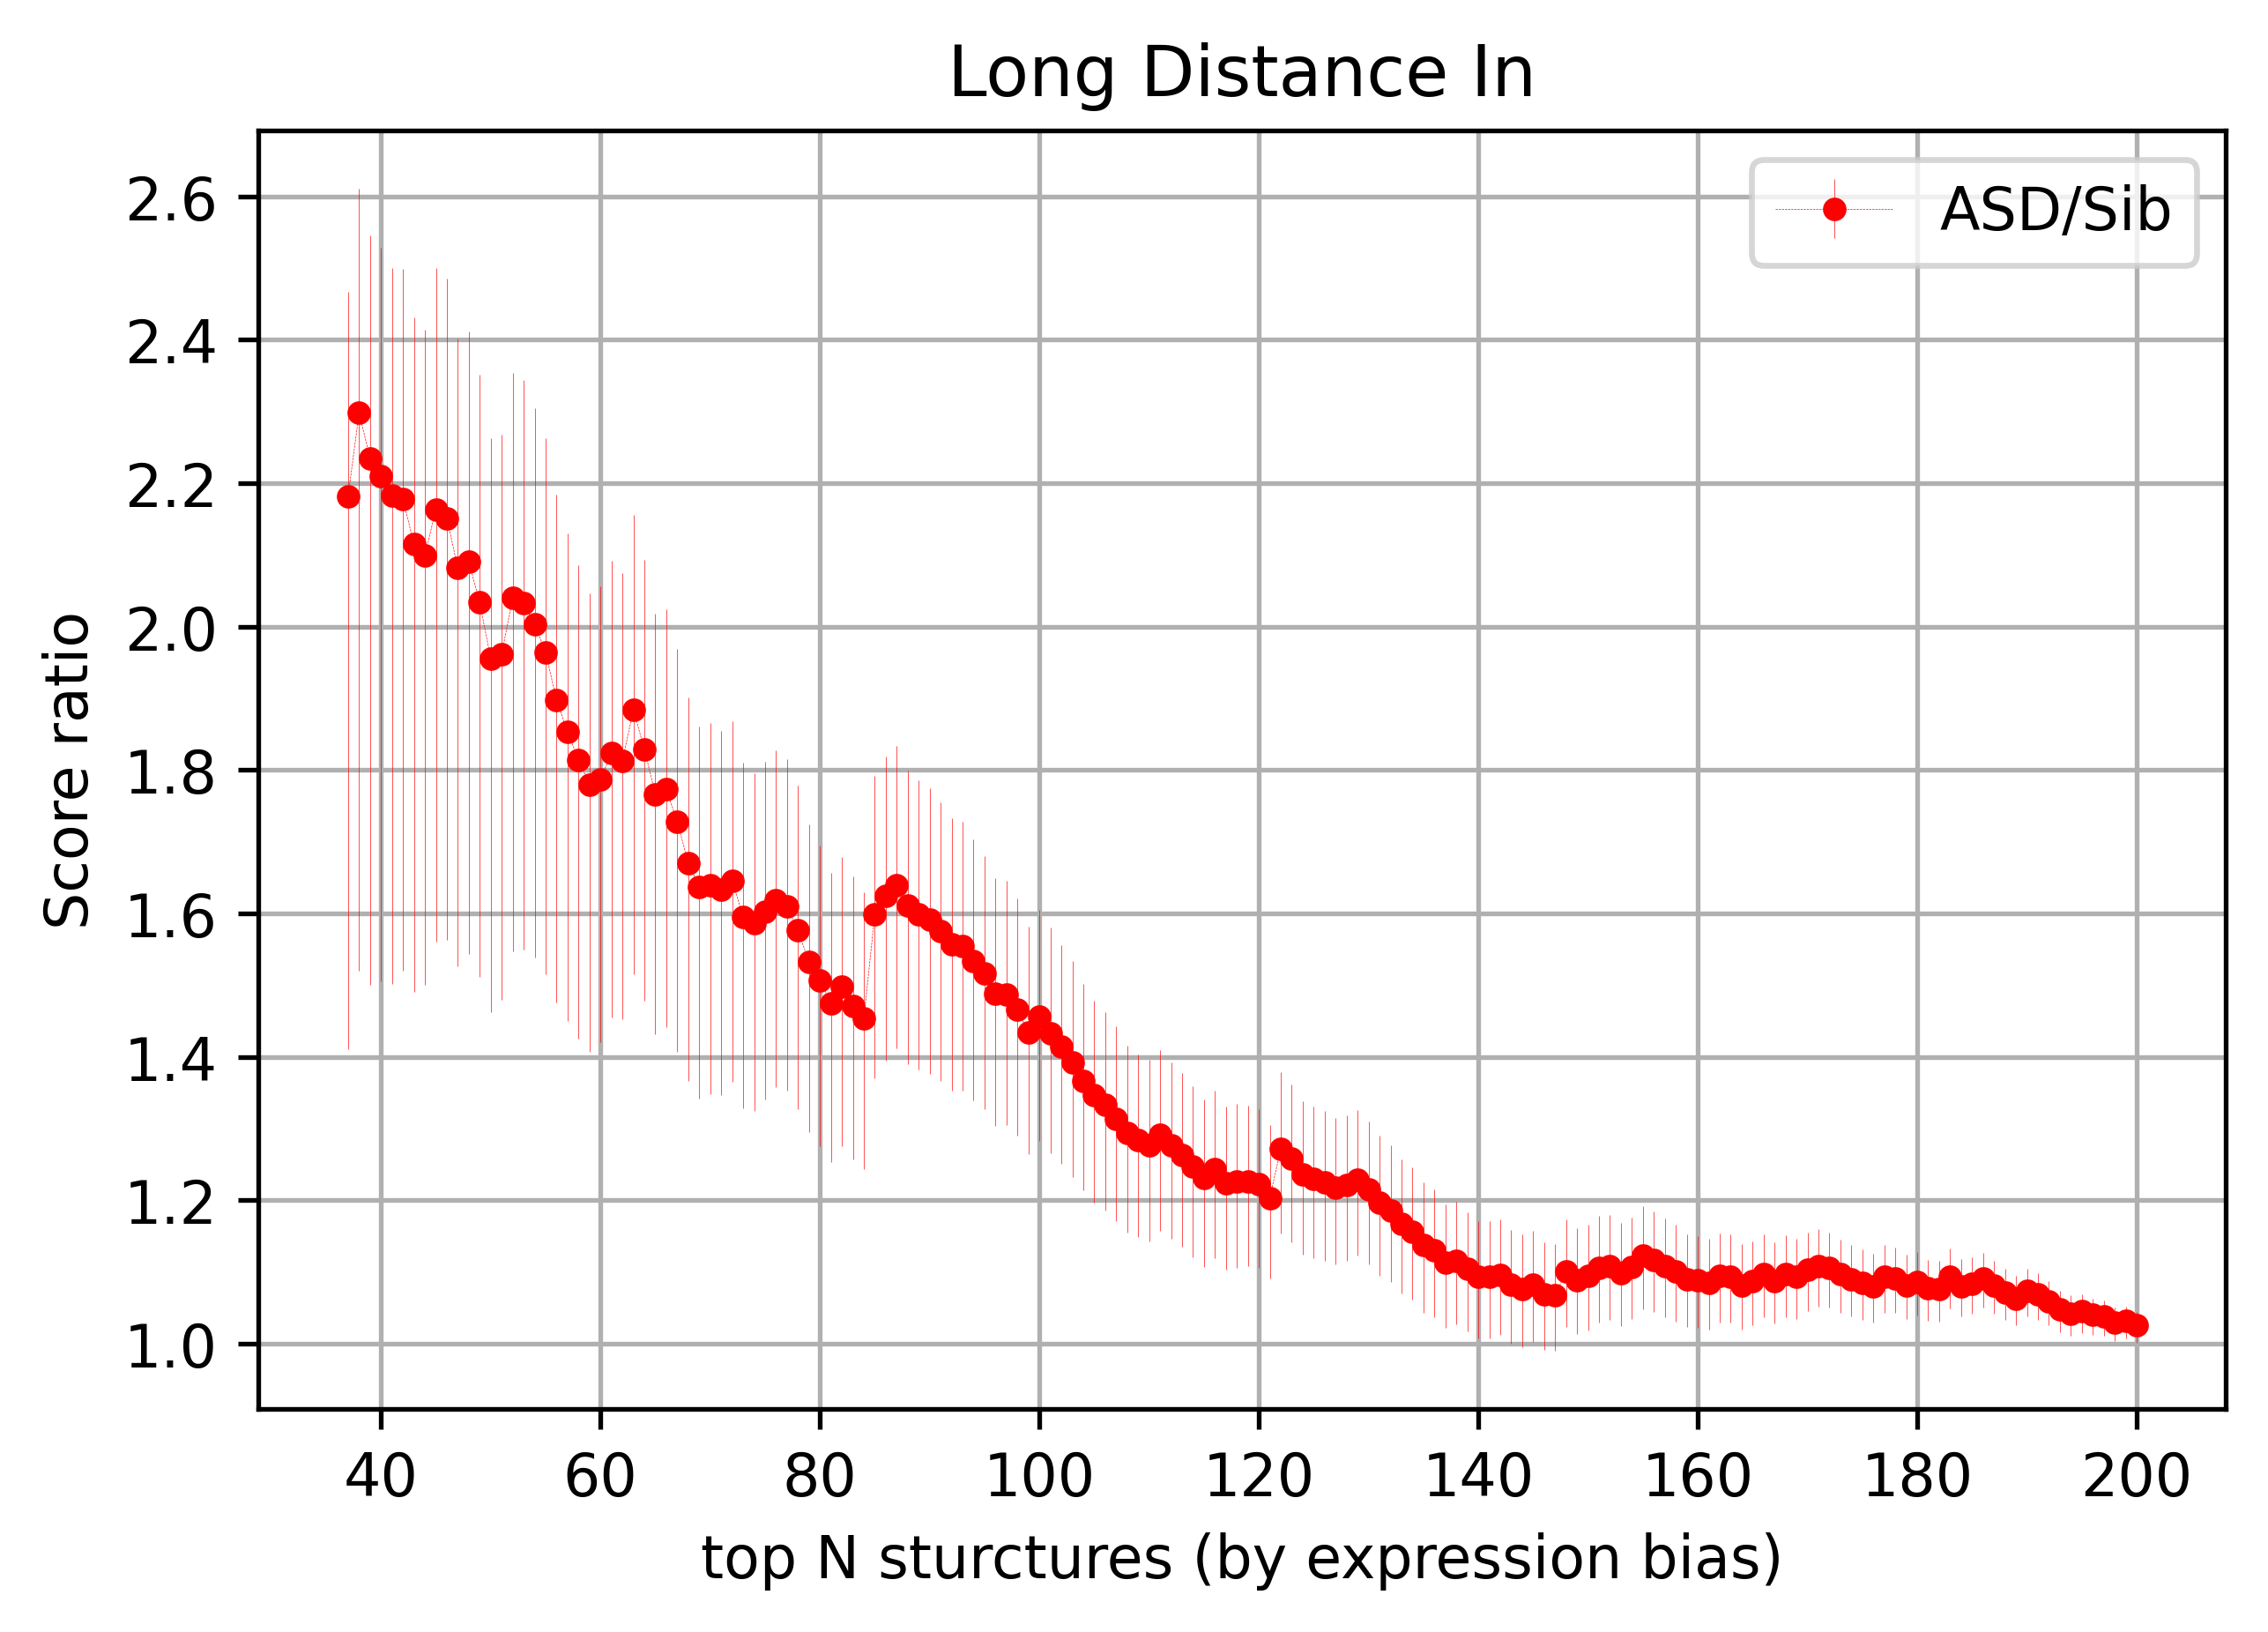

In [9]:
PlotingScore_profile(ASD_Distance_In_Short, Cont_Distance_In_Short, "Shoart Distance In")
PlotingScore_profile(ASD_Distance_In_Long, Cont_Distance_In_Long, "Long Distance In")

In [158]:
ASD_Uniform_In = np.load("../dat/Unionize_bias/RankScore.Uniform.ASD.In.npy")
Cont_Uniform_In = np.load("../dat/Unionize_bias/RankScore.Uniform.Cont.In.npy")

ASD_Uniform_InOut = np.load("../scripts/RankScore.Uniform.ASD.InOut.npy")
Cont_Uniform_InOut = np.load("../scripts/RankScore.Uniform.Cont.InOut.npy")

/tmp/ipykernel_2526300/2868931869.py:3: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_2526300/2868931869.py:3: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


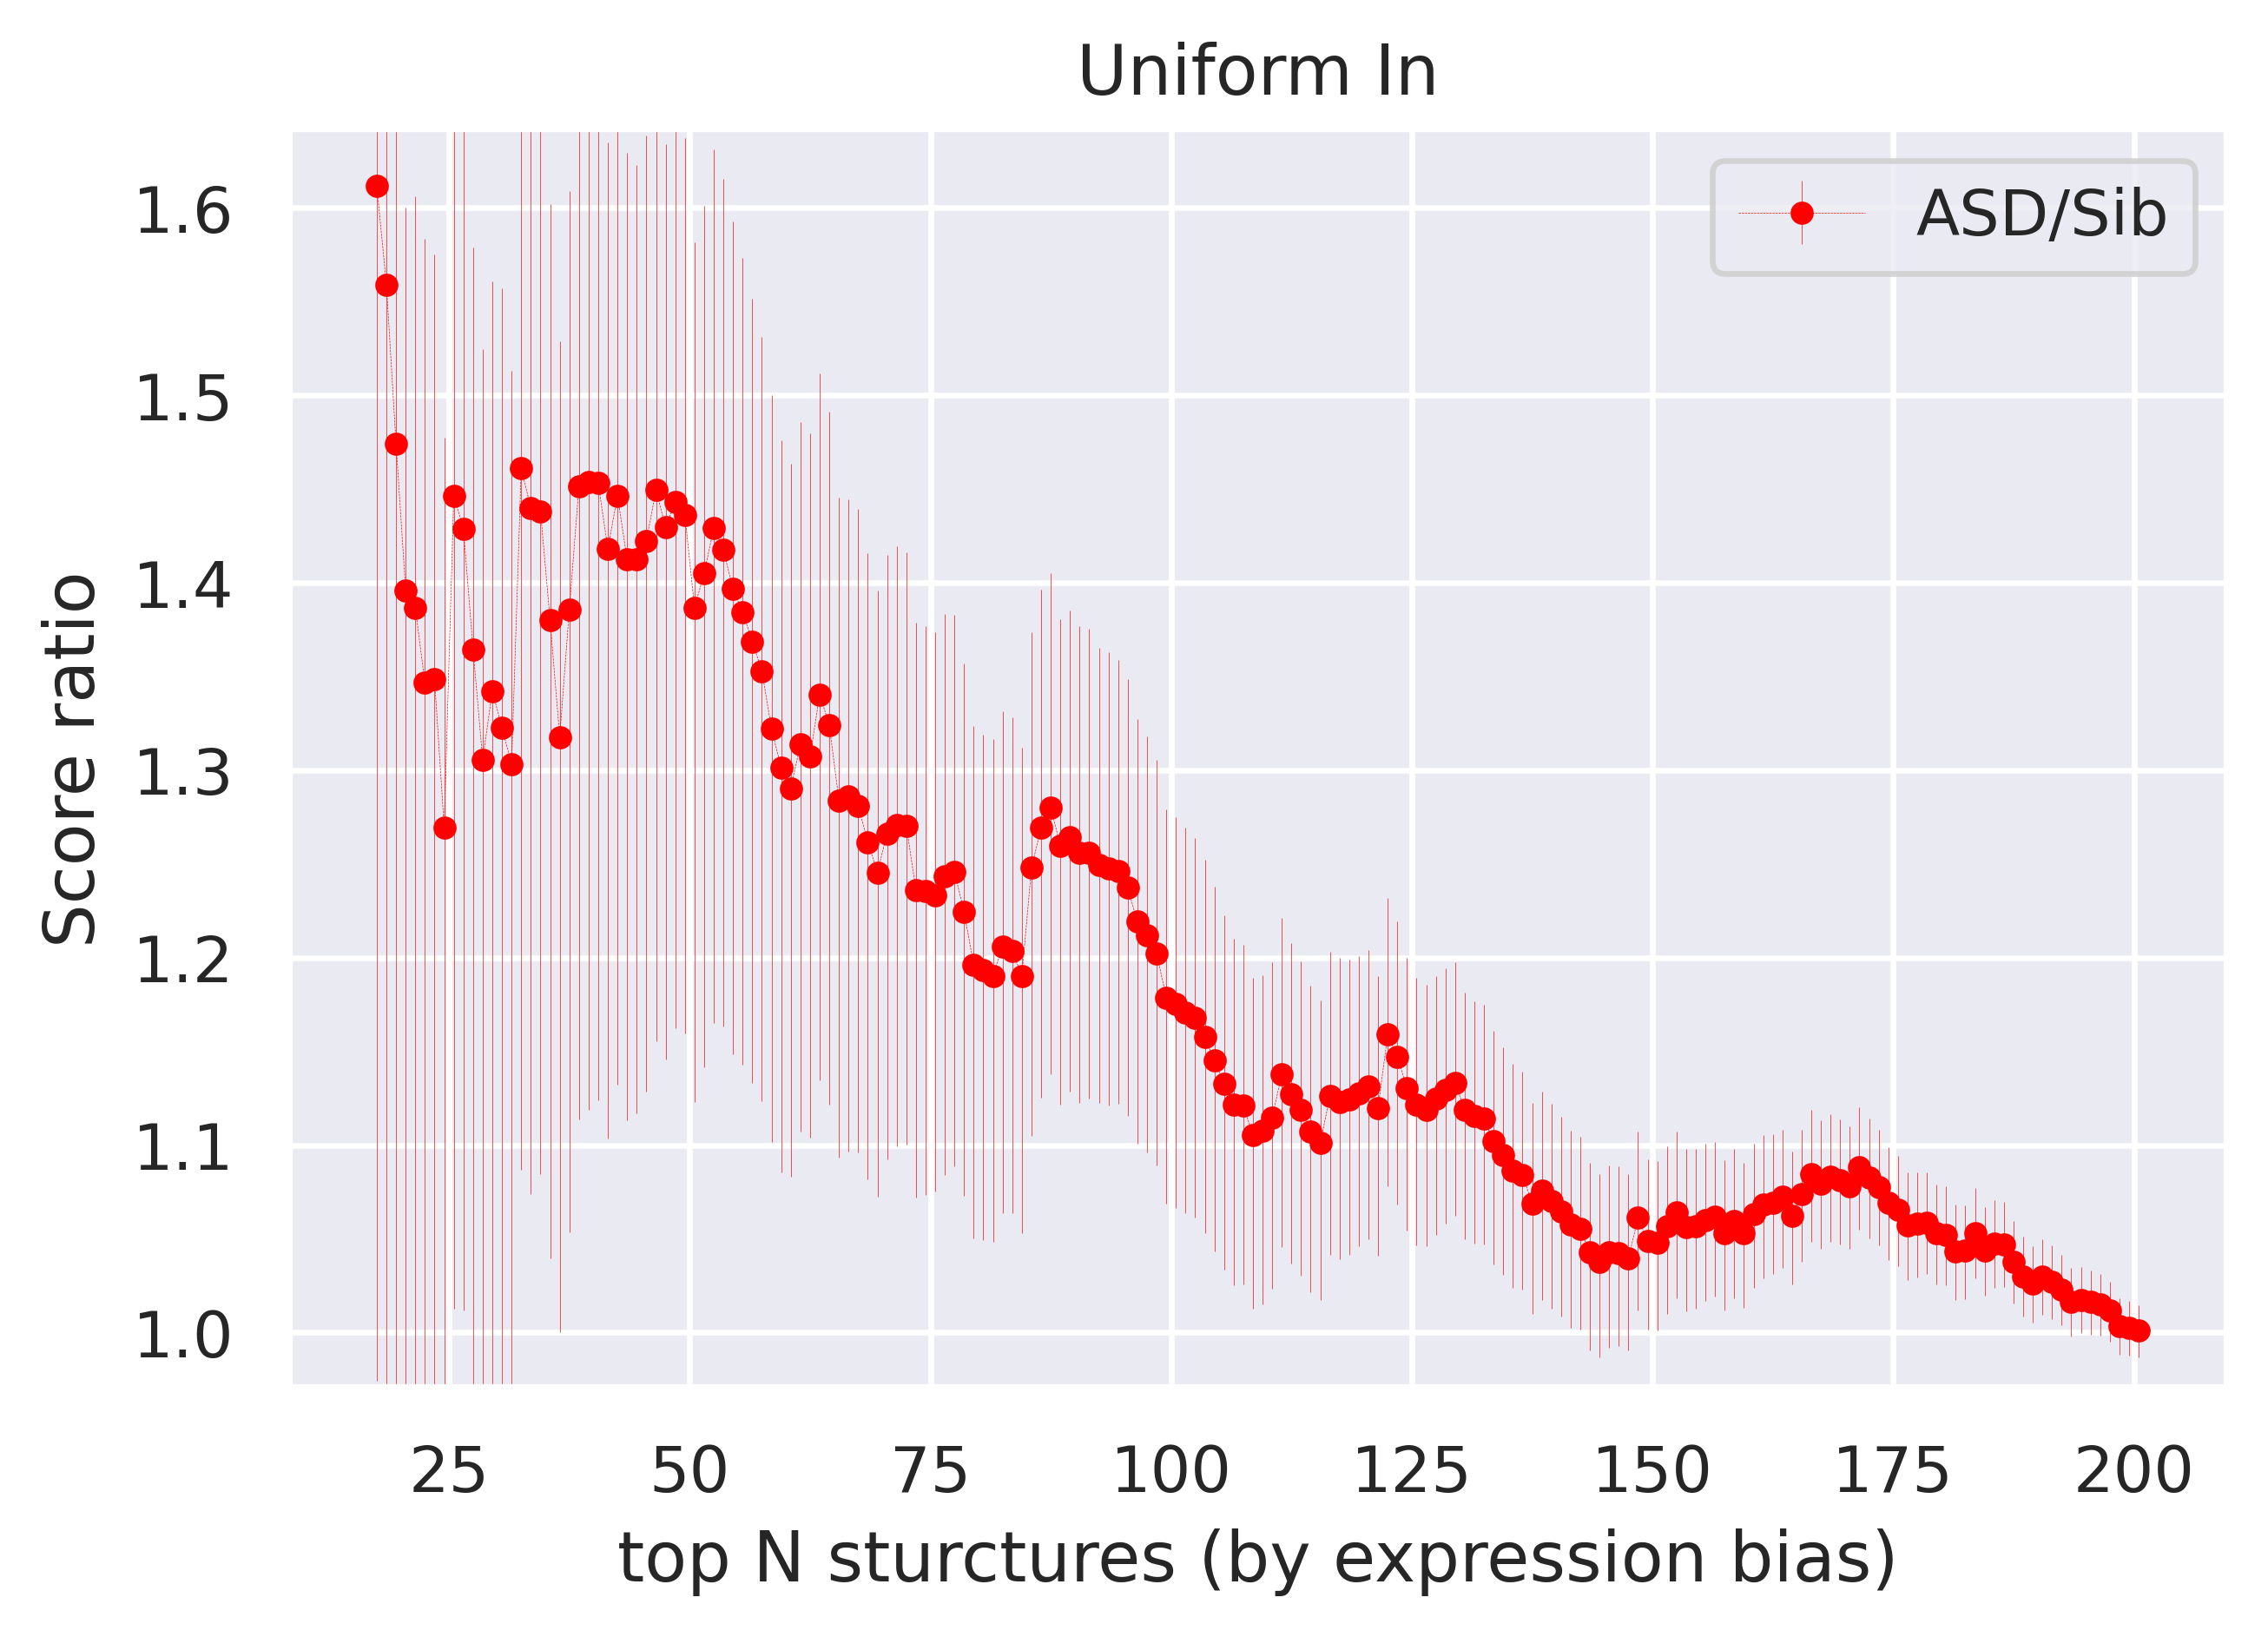

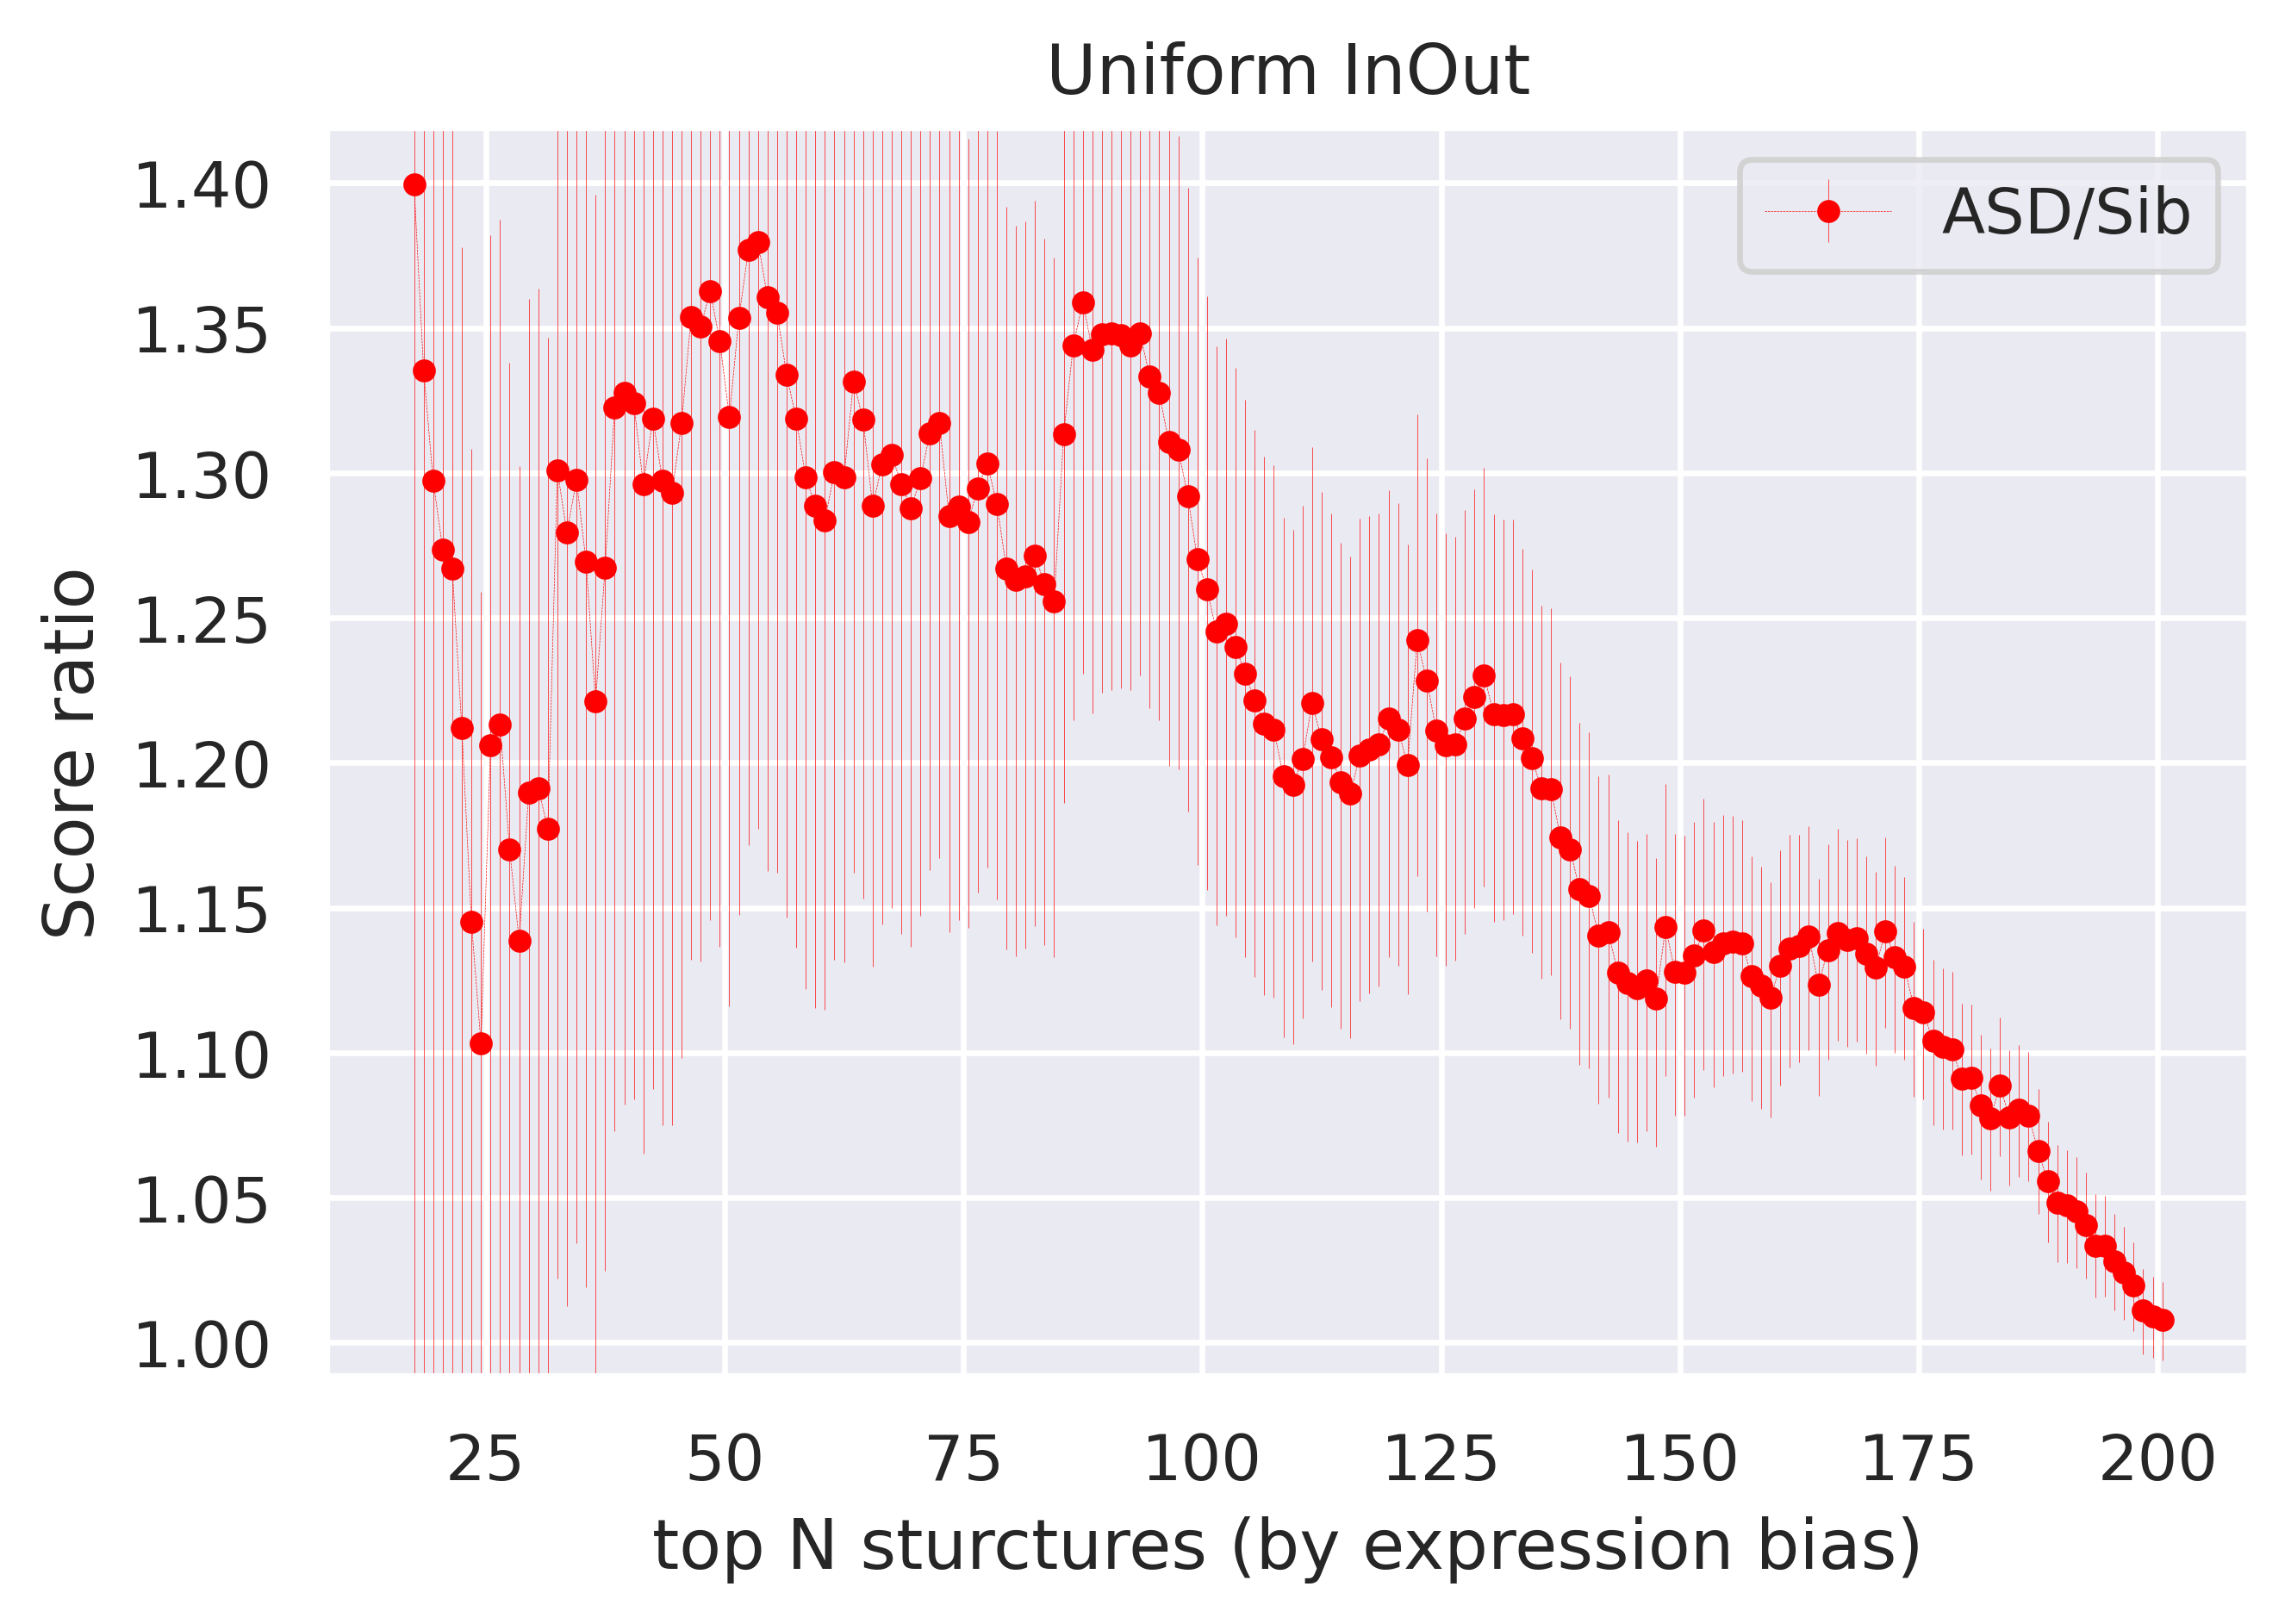

In [159]:
PlotingScore_profile(ASD_Uniform_In, Cont_Uniform_In, "Uniform In")
PlotingScore_profile(ASD_Uniform_InOut, Cont_Uniform_InOut, "Uniform InOut")

In [262]:
#ASD_ConnWeight_In = np.load("../dat/Unionize_bias/RankScore.ConnWeight.ASD.In.npy")
#Cont_ConnWeight_In = np.load("../dat/Unionize_bias/RankScore.ConnWeight.Cont.In.npy")

#ASD_ConnWeight_InOut = np.load("../scripts/RankScore.ConnWeight.ASD.InOut.npy")
#Cont_ConnWeight_InOut = np.load("../scripts/RankScore.ConnWeight.Cont.InOut.npy")

ASD_ConnWeight_In = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.ConnWeight.ASD.In.npy")
Cont_ConnWeight_In = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.ConnWeight.Cont.In.npy")

ASD_ConnWeight_InOut = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.ConnWeight.ASD.InOut.npy")
Cont_ConnWeight_InOut = np.load("../dat/Unionize_bias/RankScore_jw/RankScore.ConnWeight.Cont.InOut.npy")

/tmp/ipykernel_2526300/2868931869.py:3: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_2526300/2868931869.py:3: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


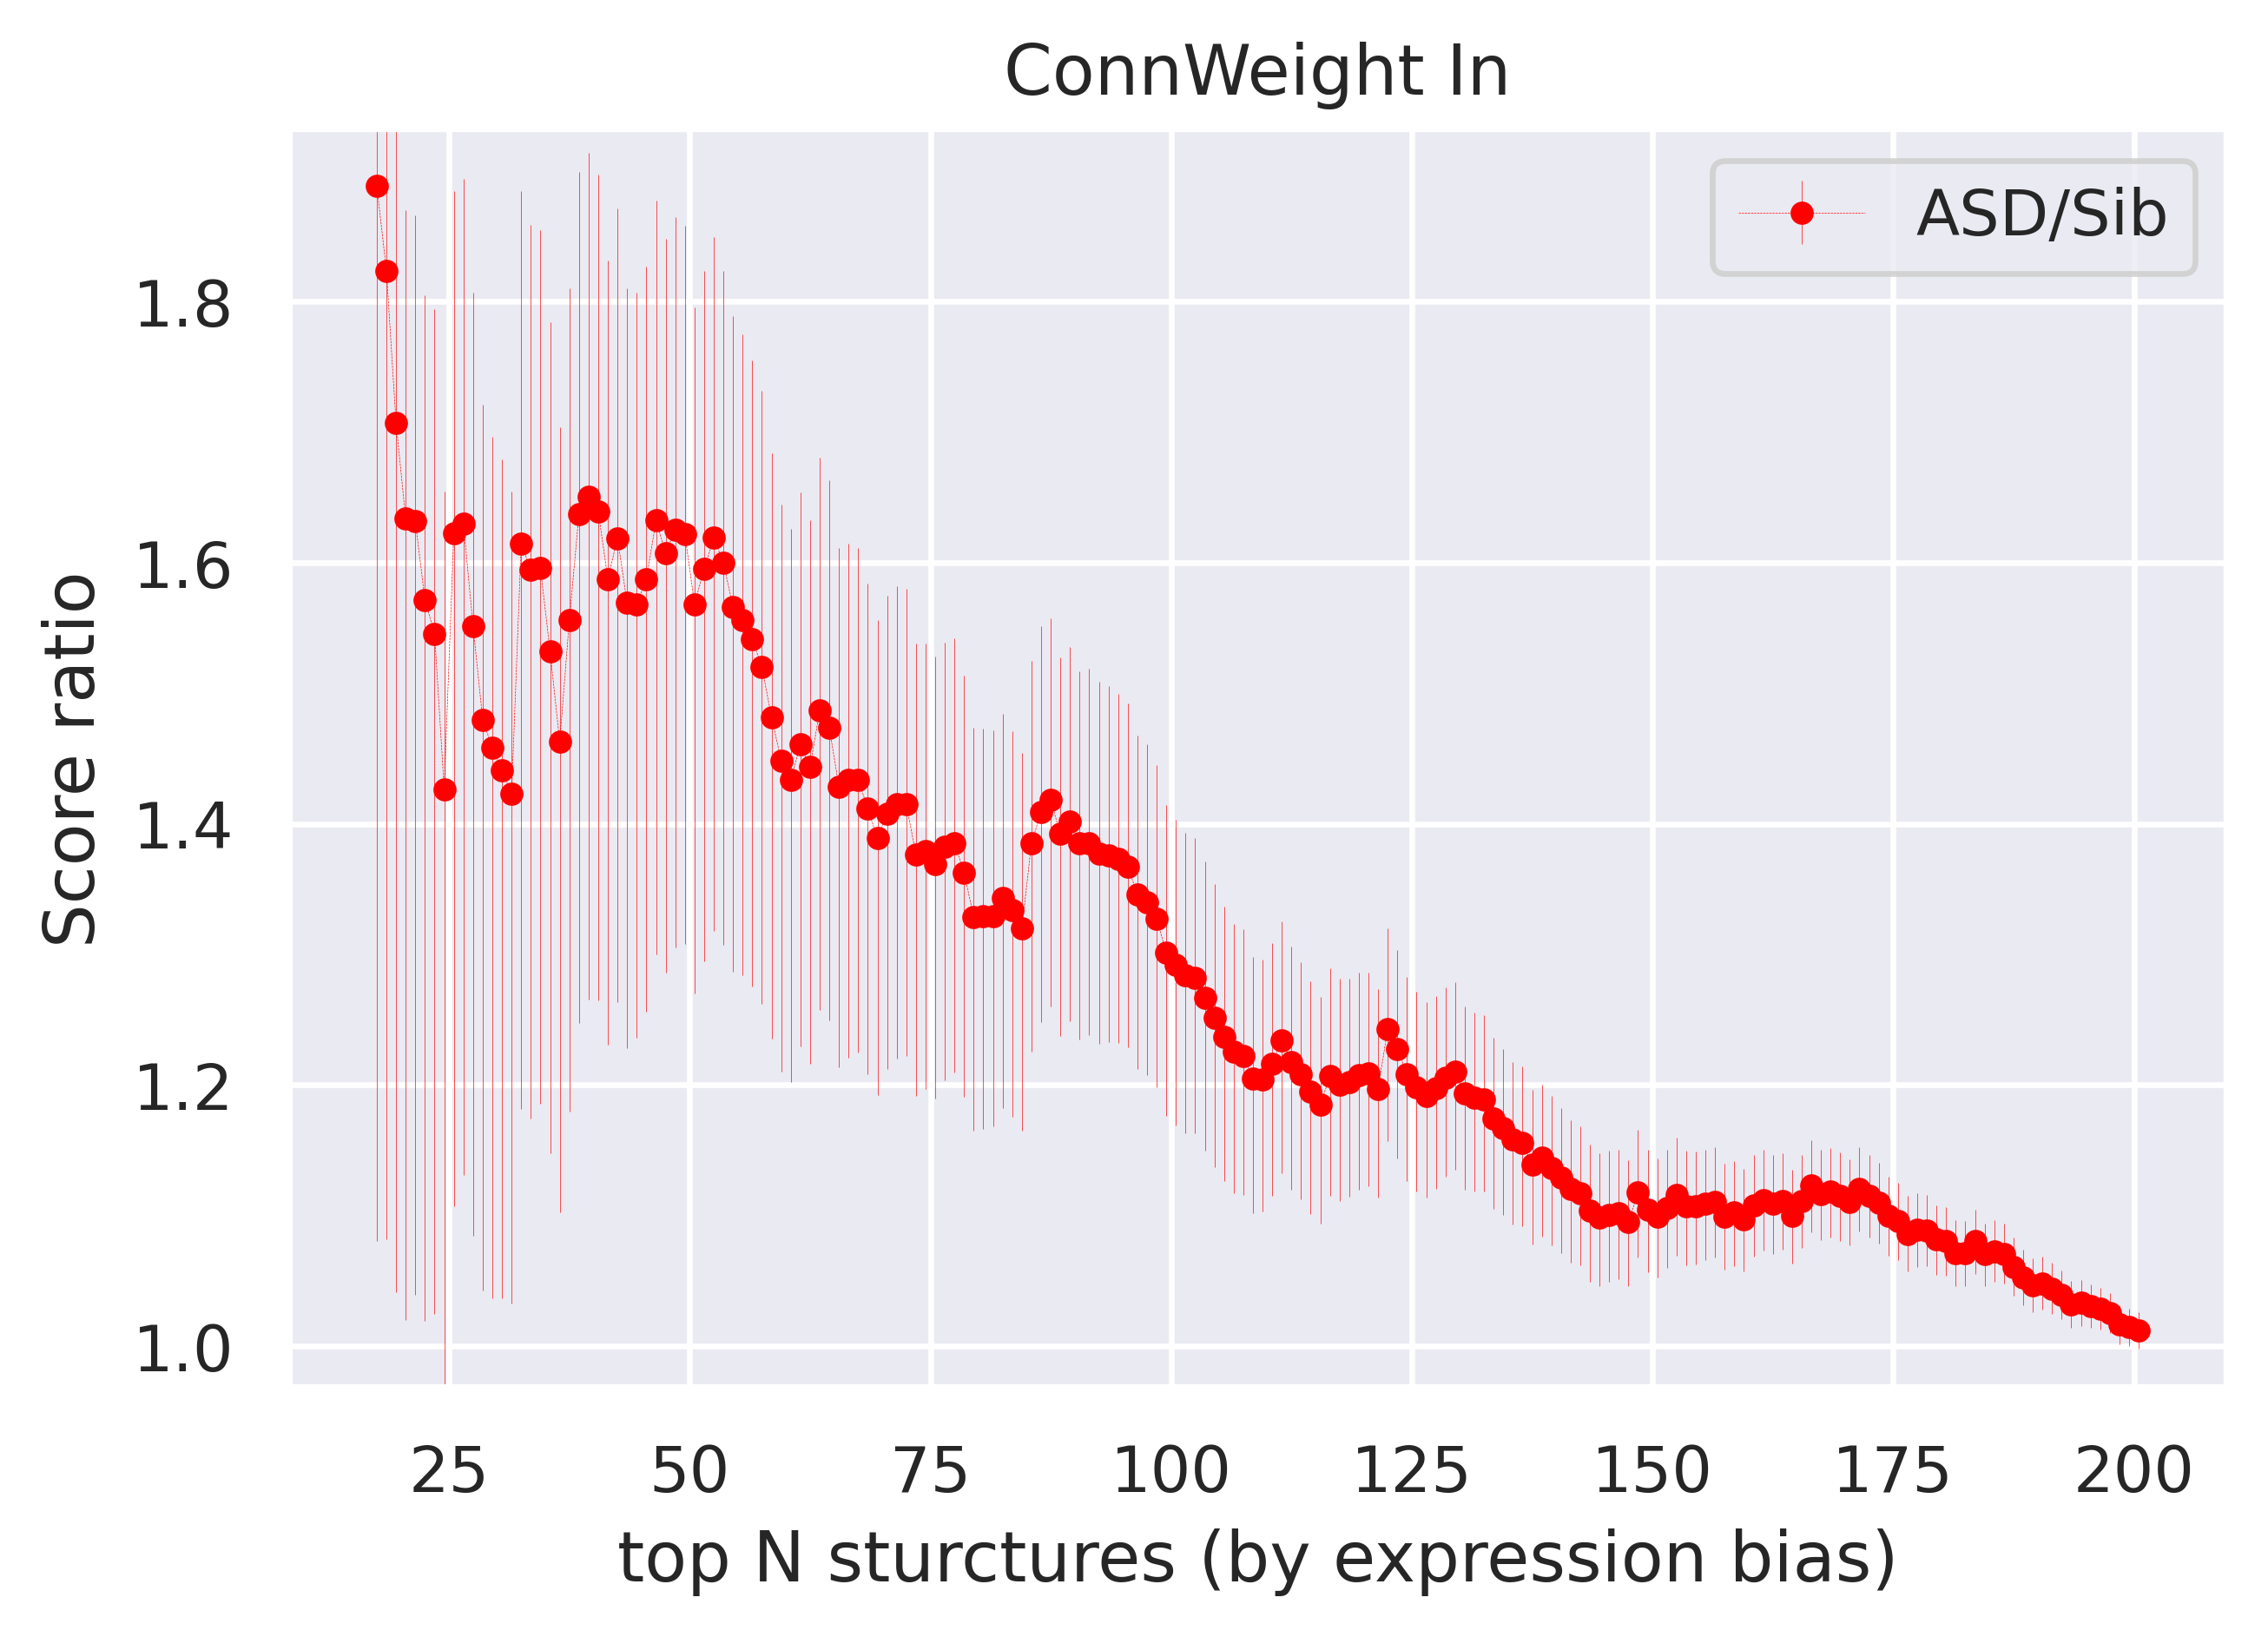

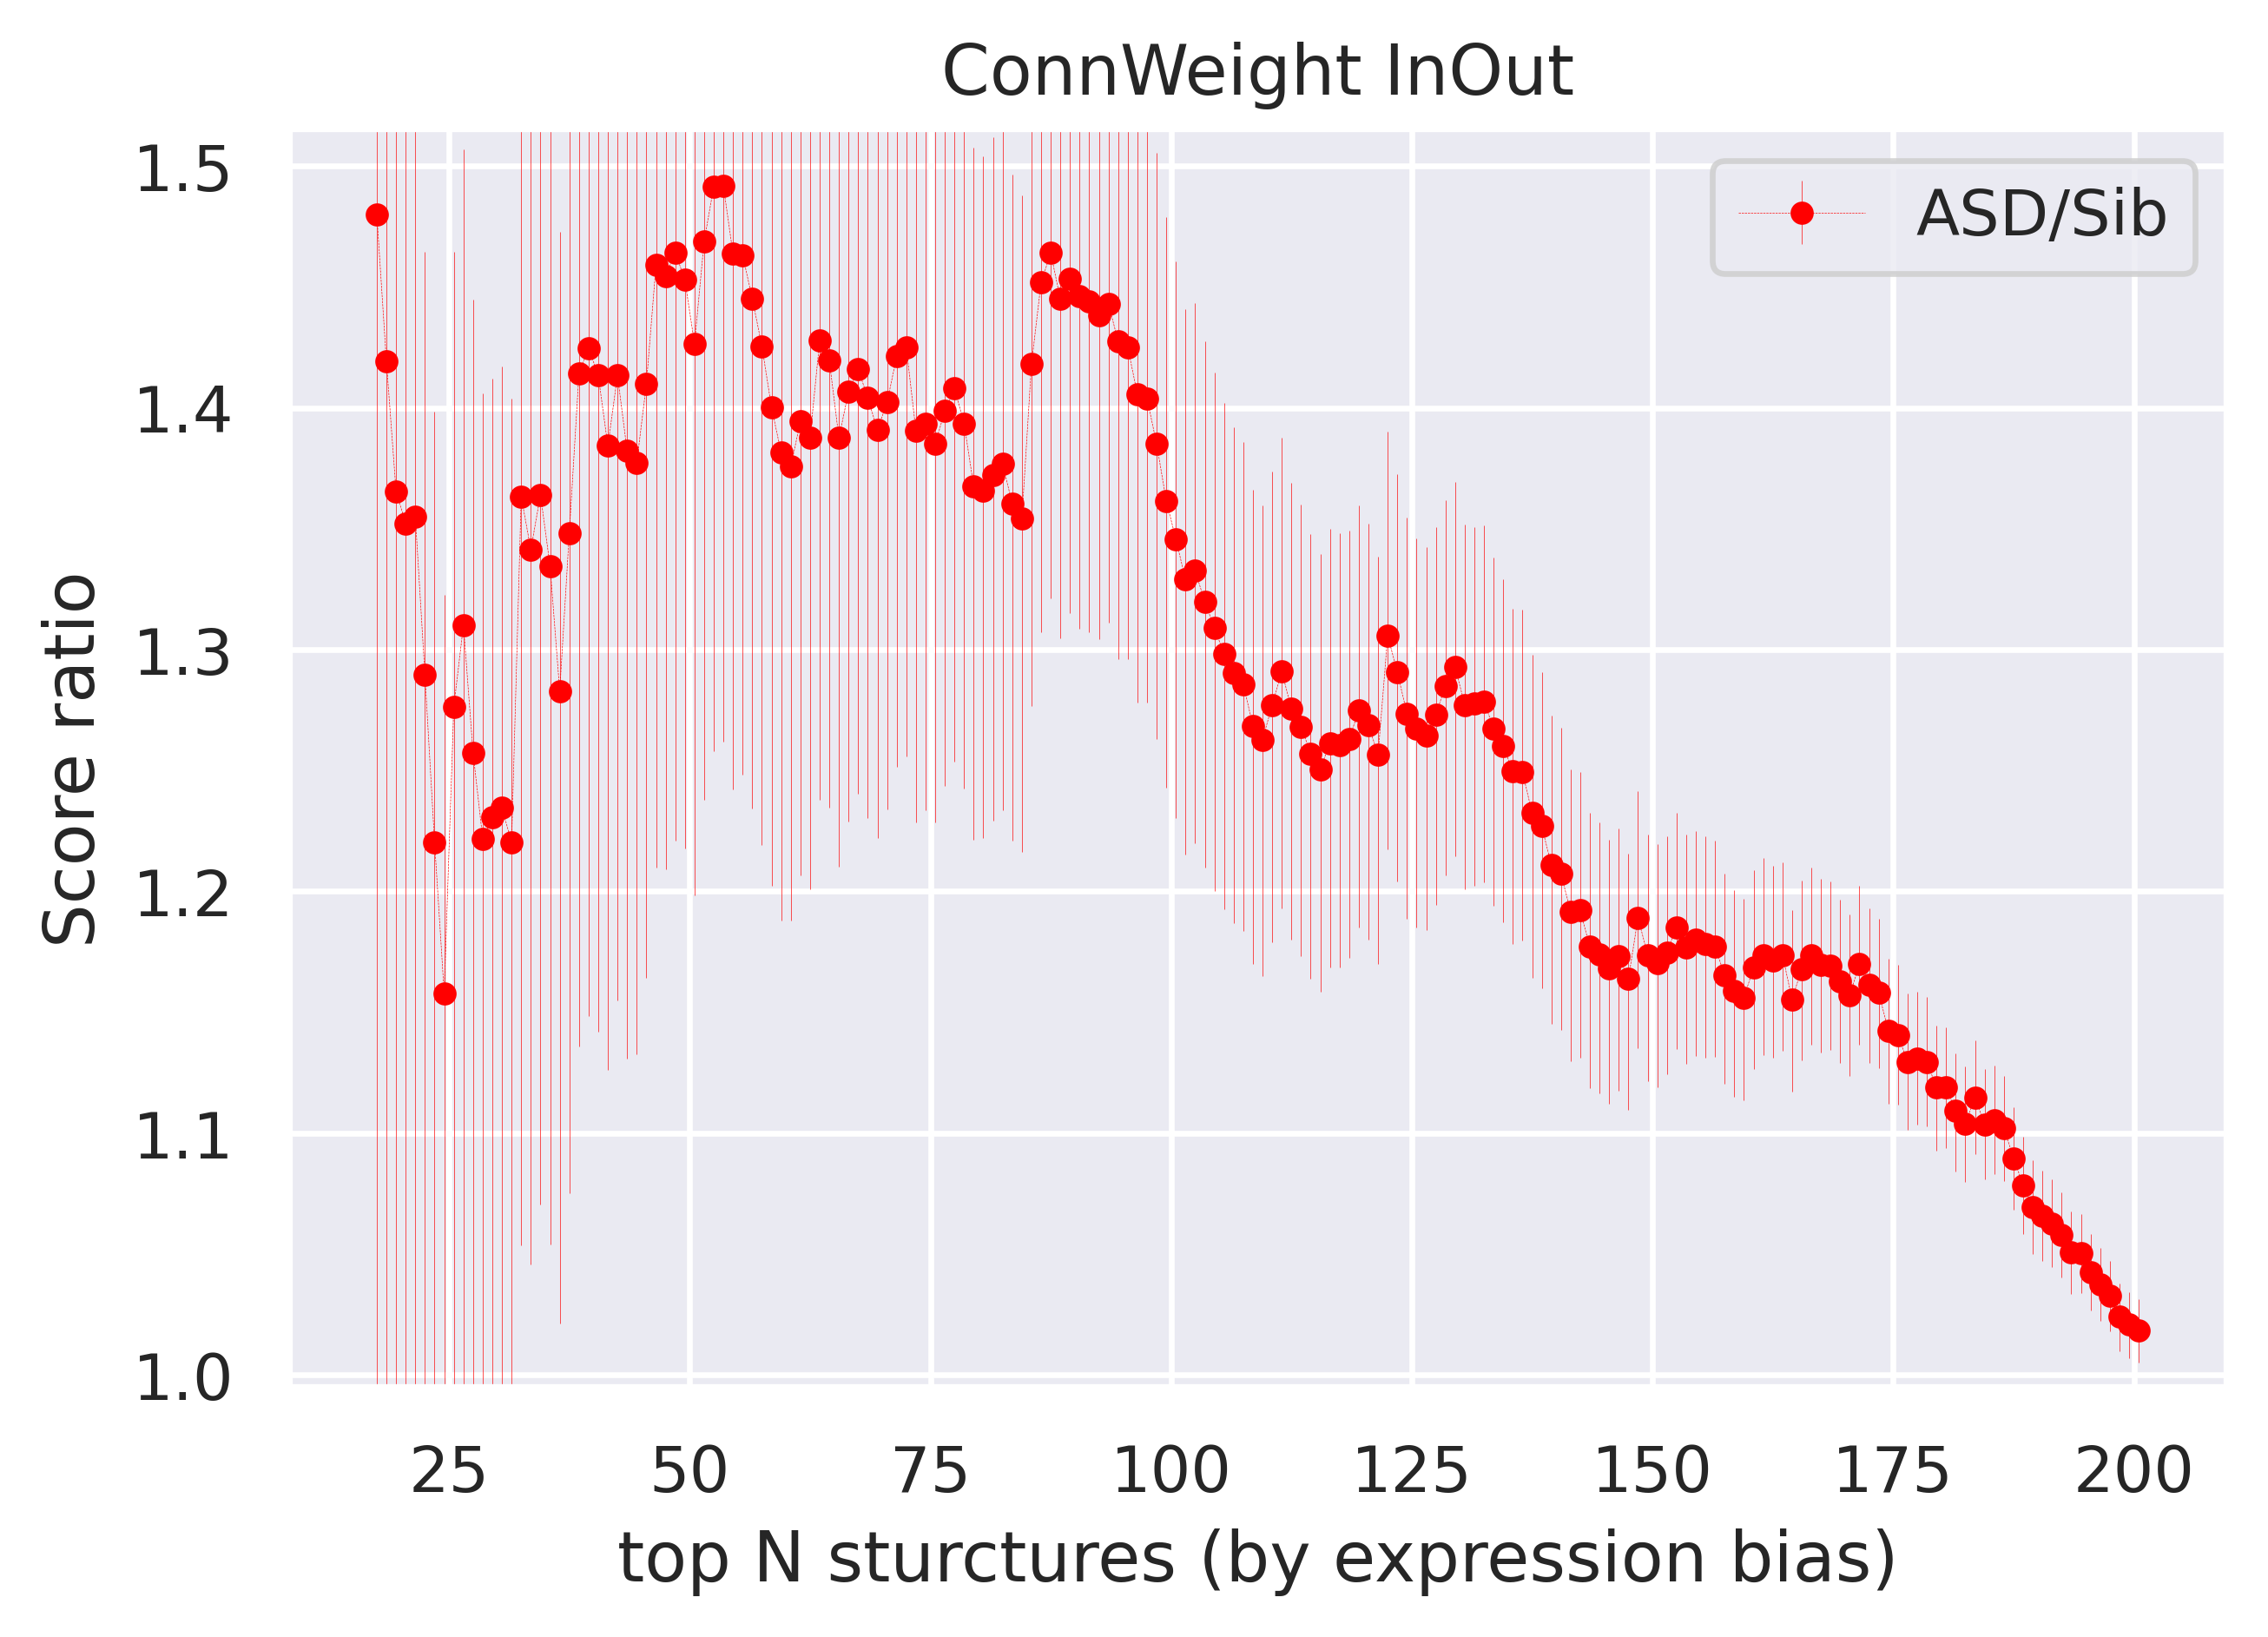

In [263]:
PlotingScore_profile(ASD_ConnWeight_In, Cont_ConnWeight_In, "ConnWeight In")
PlotingScore_profile(ASD_ConnWeight_InOut, Cont_ConnWeight_InOut, "ConnWeight InOut")

<AxesSubplot:title={'center':'Likelihood Inside / Outside Circuit'}, xlabel='Score'>

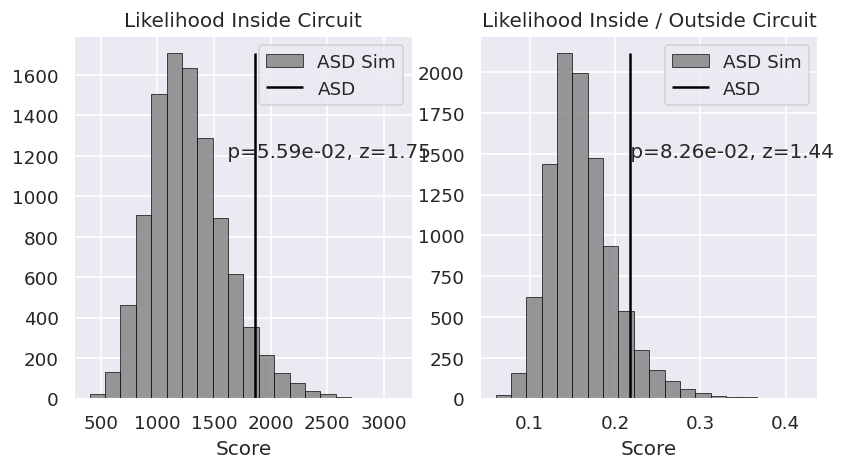

In [264]:
size = 50
idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2) = plt.subplots(1,2,dpi=120, figsize=(8,4))
PlotPermutationP(Cont_ConnWeight_In[:, idx], ASD_ConnWeight_In[idx], ax1,
                     title="Likelihood Inside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")
PlotPermutationP(Cont_ConnWeight_InOut[:, idx], ASD_ConnWeight_InOut[idx], ax2,
                     title="Likelihood Inside / Outside Circuit".format(), xlabel="Score", 
                     dist_label="ASD Sim", bar_label="ASD")

In [163]:
ASD_BiasCorr_In = np.load("../dat/Unionize_bias/RankScore.BiasCorr.ASD.In.npy")
Cont_BiasCorr_In = np.load("../dat/Unionize_bias/RankScore.BiasCorr.Cont.In.npy")

ASD_BiasCorr_InOut = np.load("../scripts/RankScore.BiasCorr.ASD.InOut.npy")
Cont_BiasCorr_InOut = np.load("../scripts/RankScore.BiasCorr.Cont.InOut.npy")

/tmp/ipykernel_2526300/2868931869.py:3: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_2526300/2868931869.py:3: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


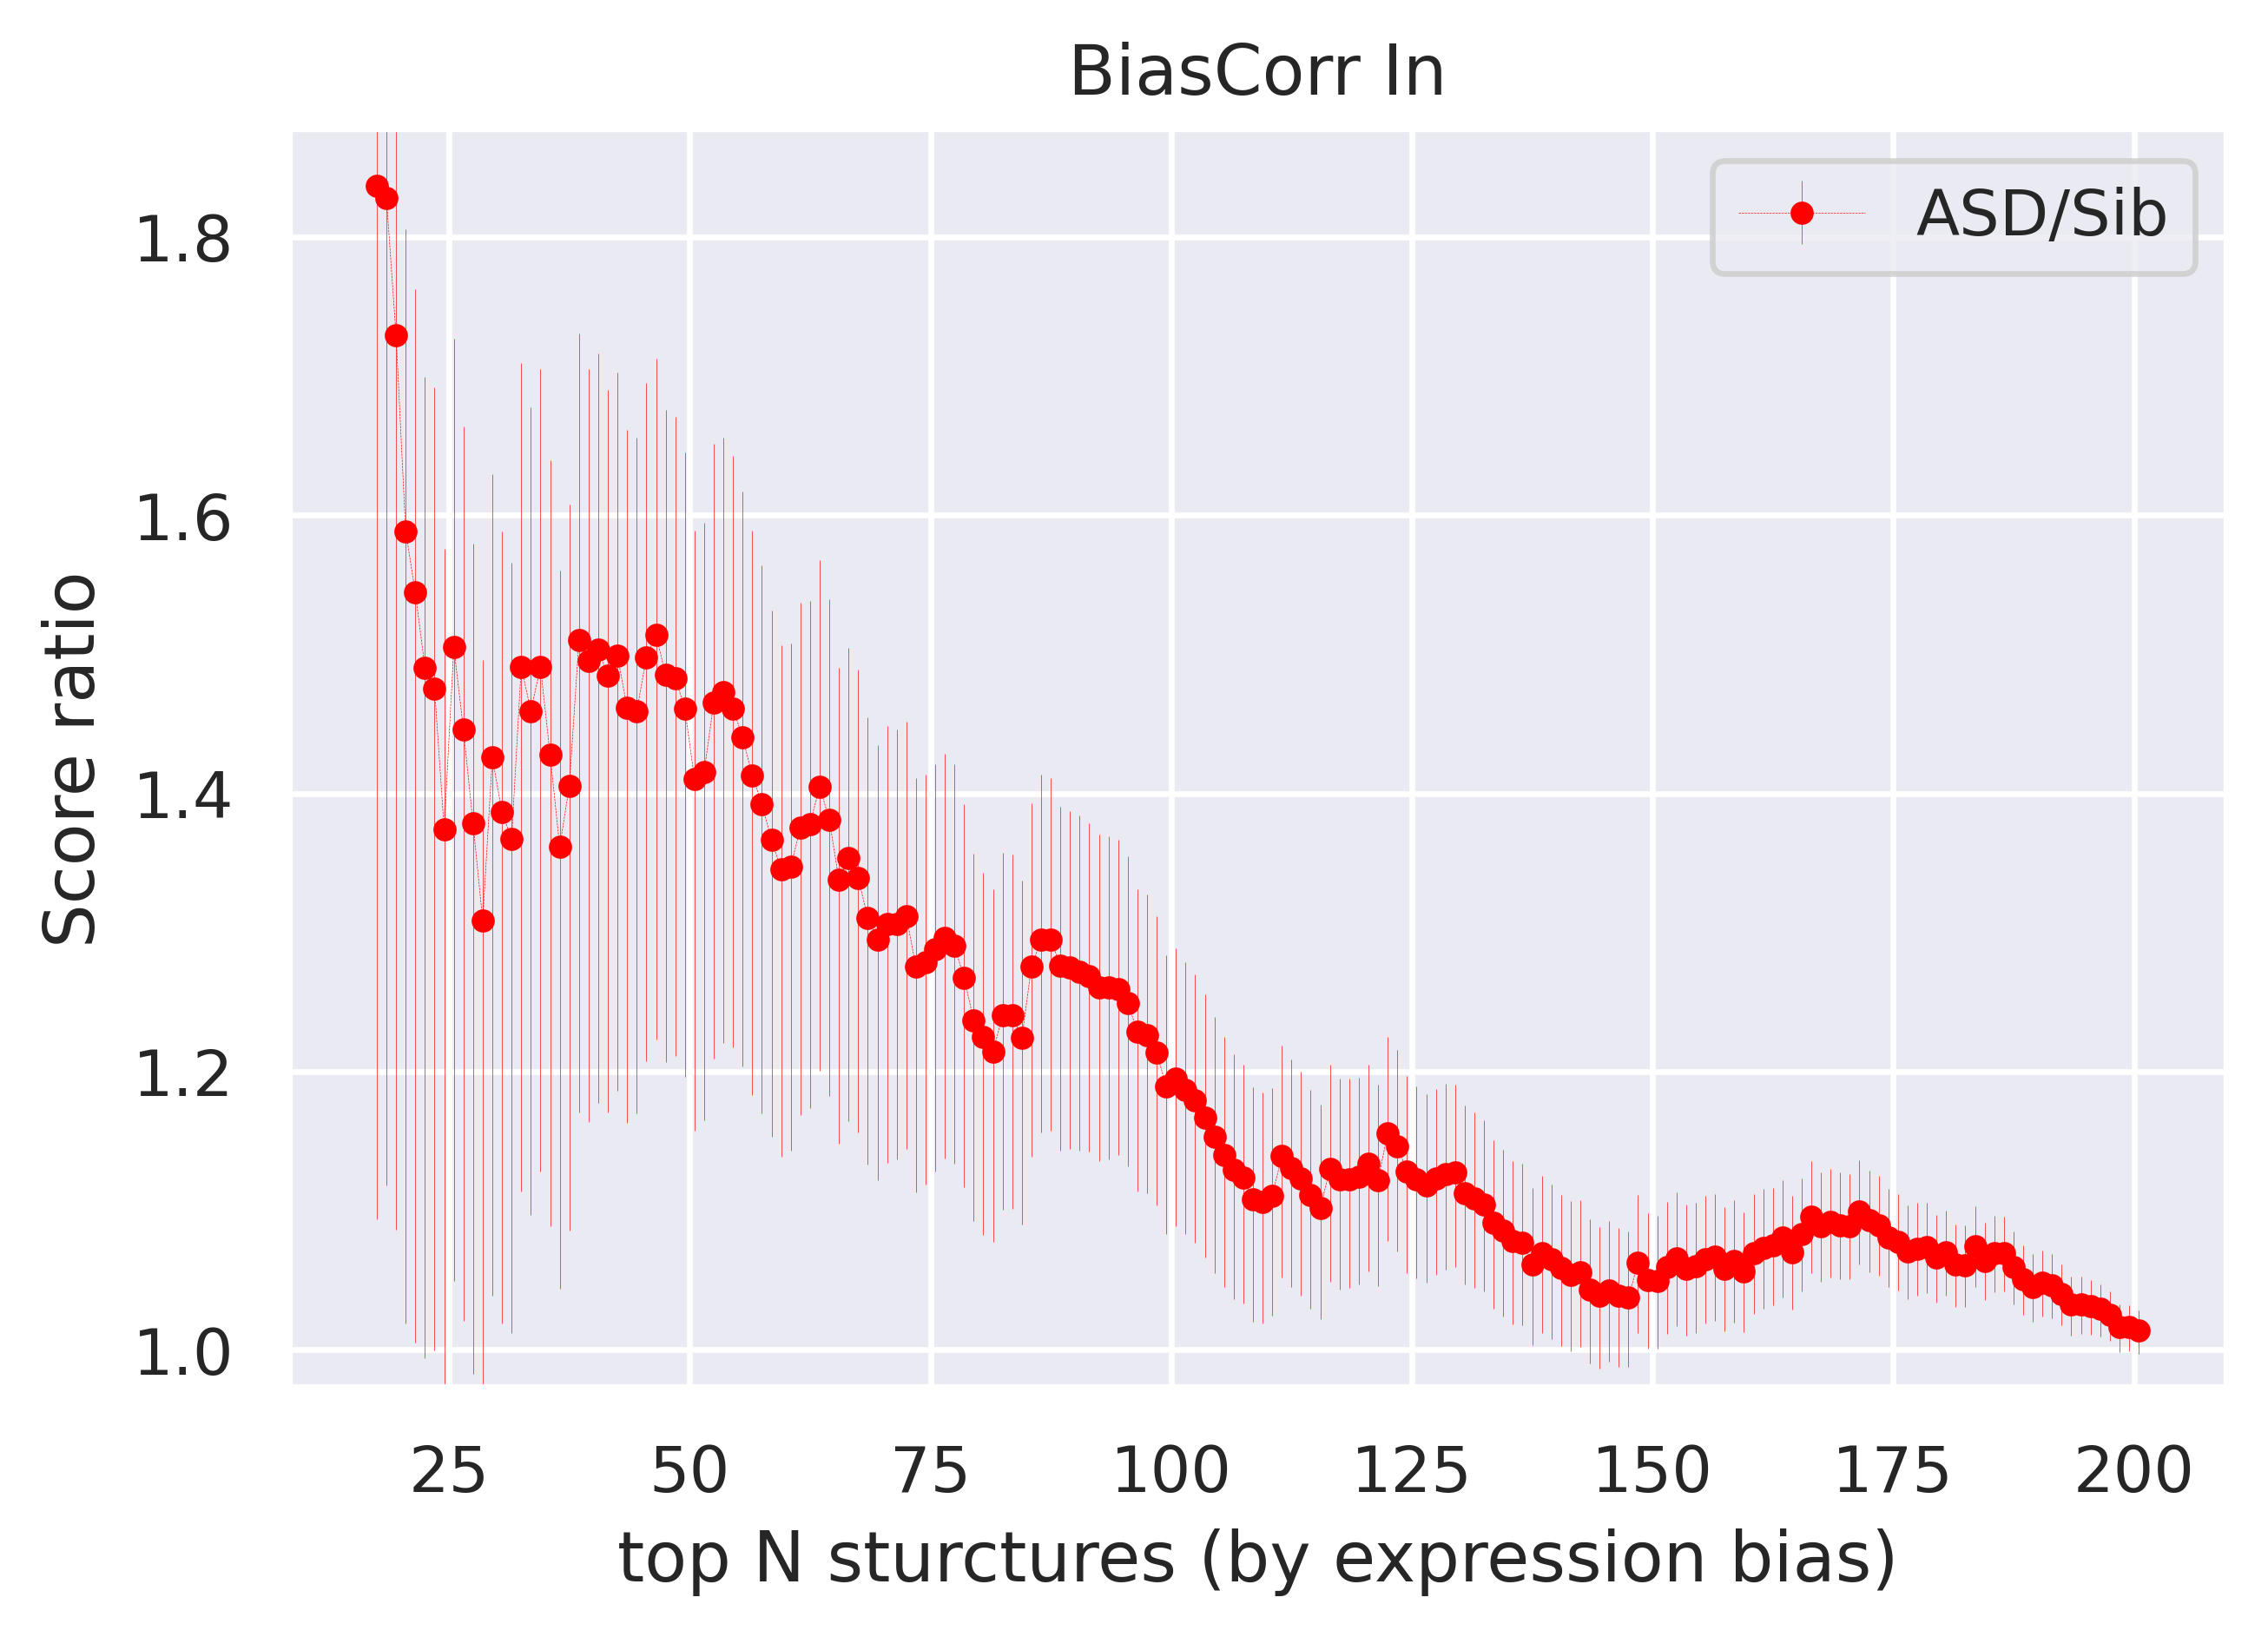

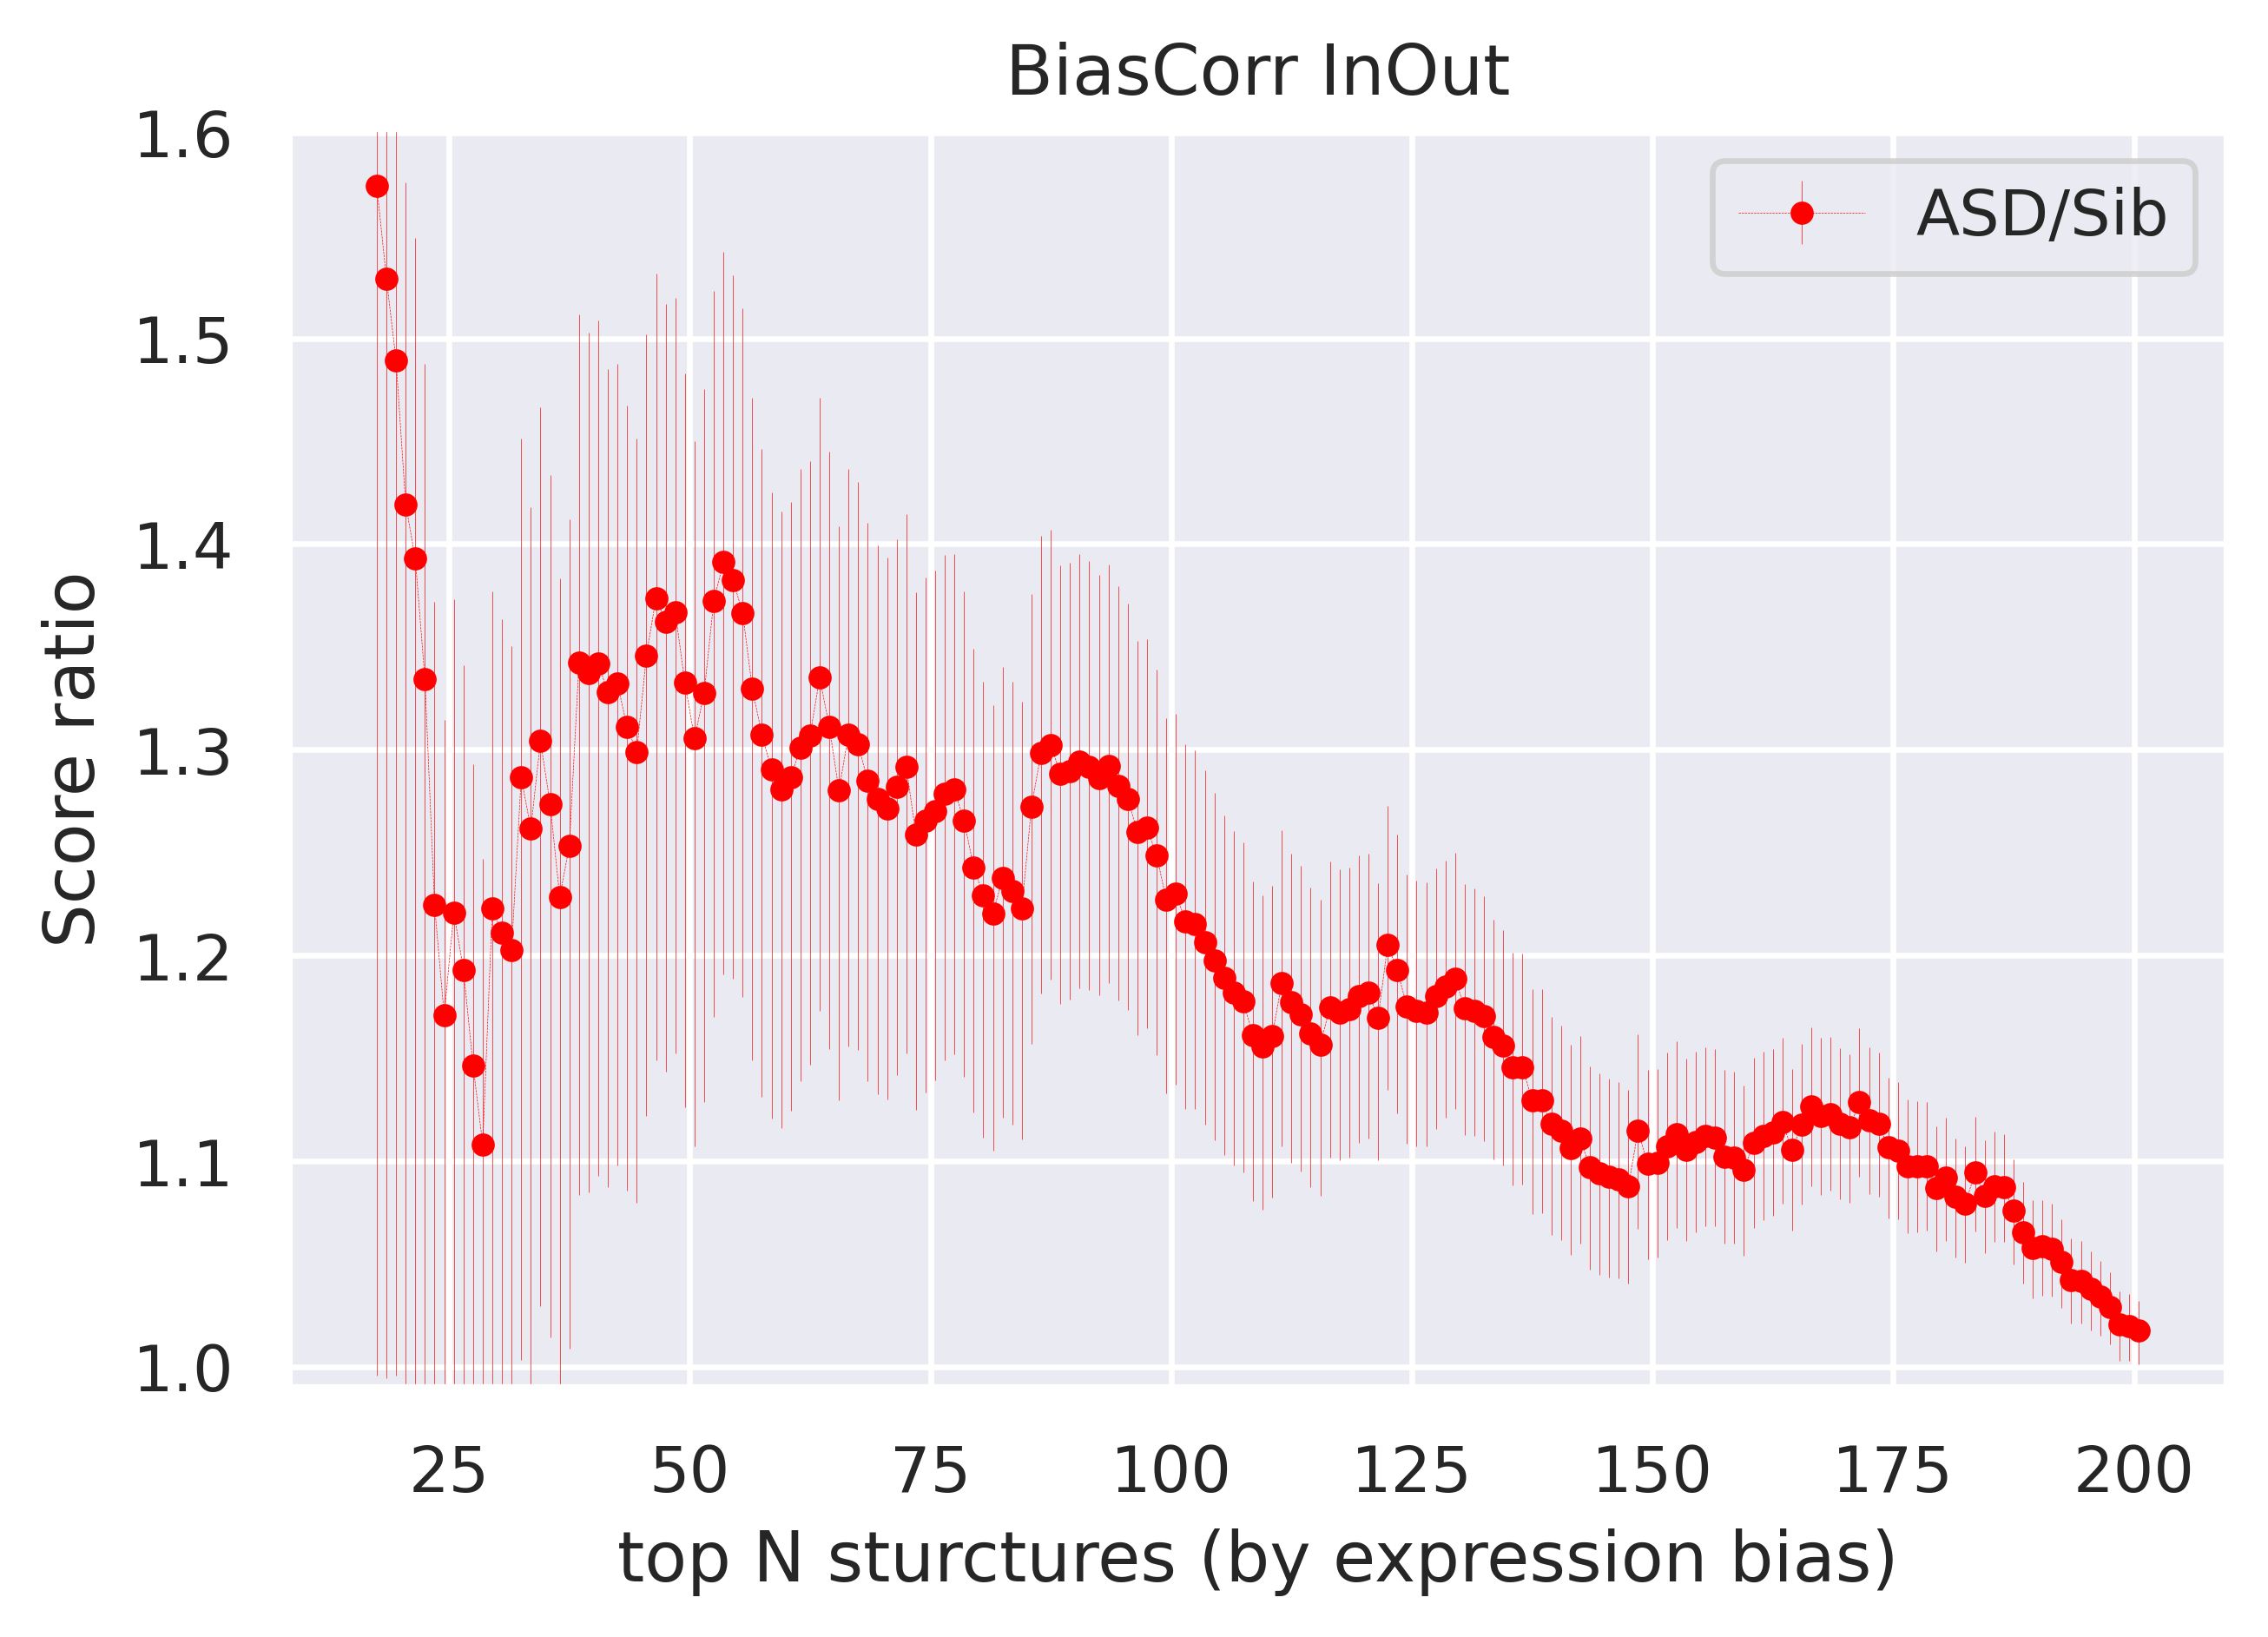

In [164]:
PlotingScore_profile(ASD_BiasCorr_In, Cont_BiasCorr_In, "BiasCorr In")
PlotingScore_profile(ASD_BiasCorr_InOut, Cont_BiasCorr_InOut, "BiasCorr InOut")

In [165]:
ASD_Region_In = np.load("../dat/Unionize_bias/RankScore.Region.ASD.In.npy")
Cont_Region_In = np.load("../dat/Unionize_bias/RankScore.Region.Cont.In.npy")

ASD_Region_InOut = np.load("../scripts/RankScore.Region.ASD.InOut.npy")
Cont_Region_InOut = np.load("../scripts/RankScore.Region.Cont.InOut.npy")

/tmp/ipykernel_2526300/2868931869.py:3: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_2526300/2868931869.py:3: RuntimeWarning: divide by zero encountered in true_divide
  xx = ASD/Cont
/home/jw3514/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


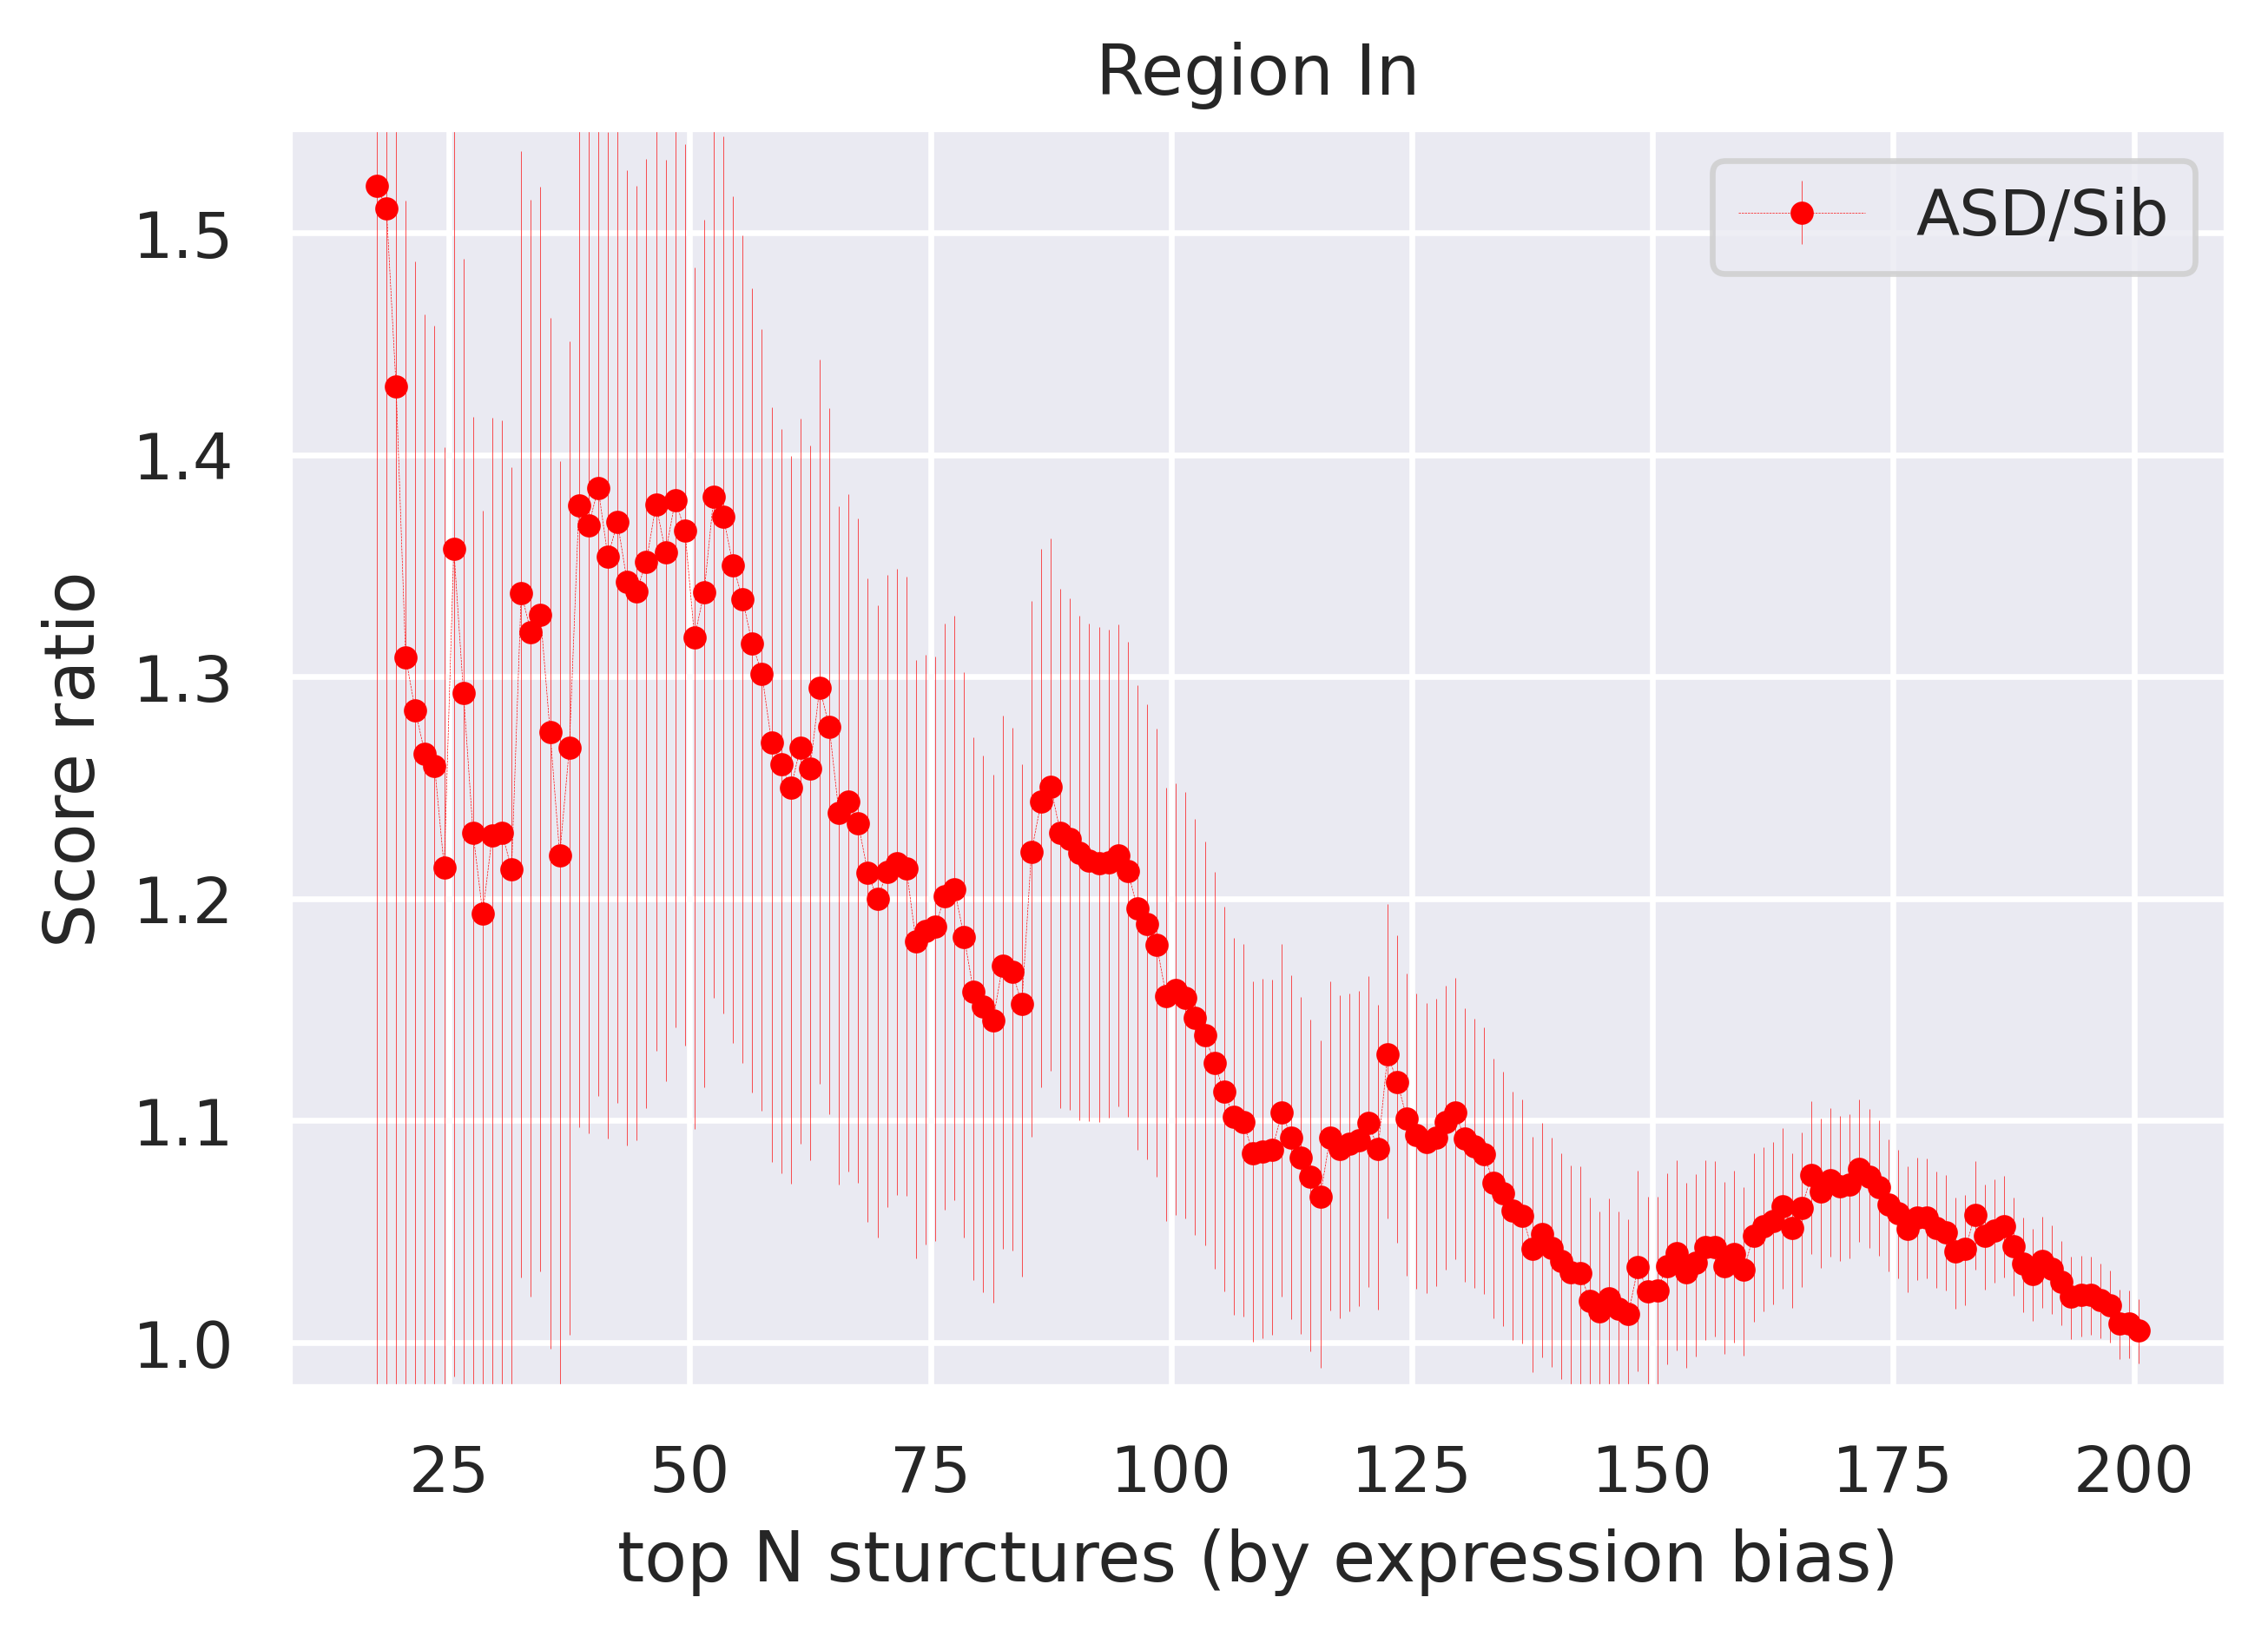

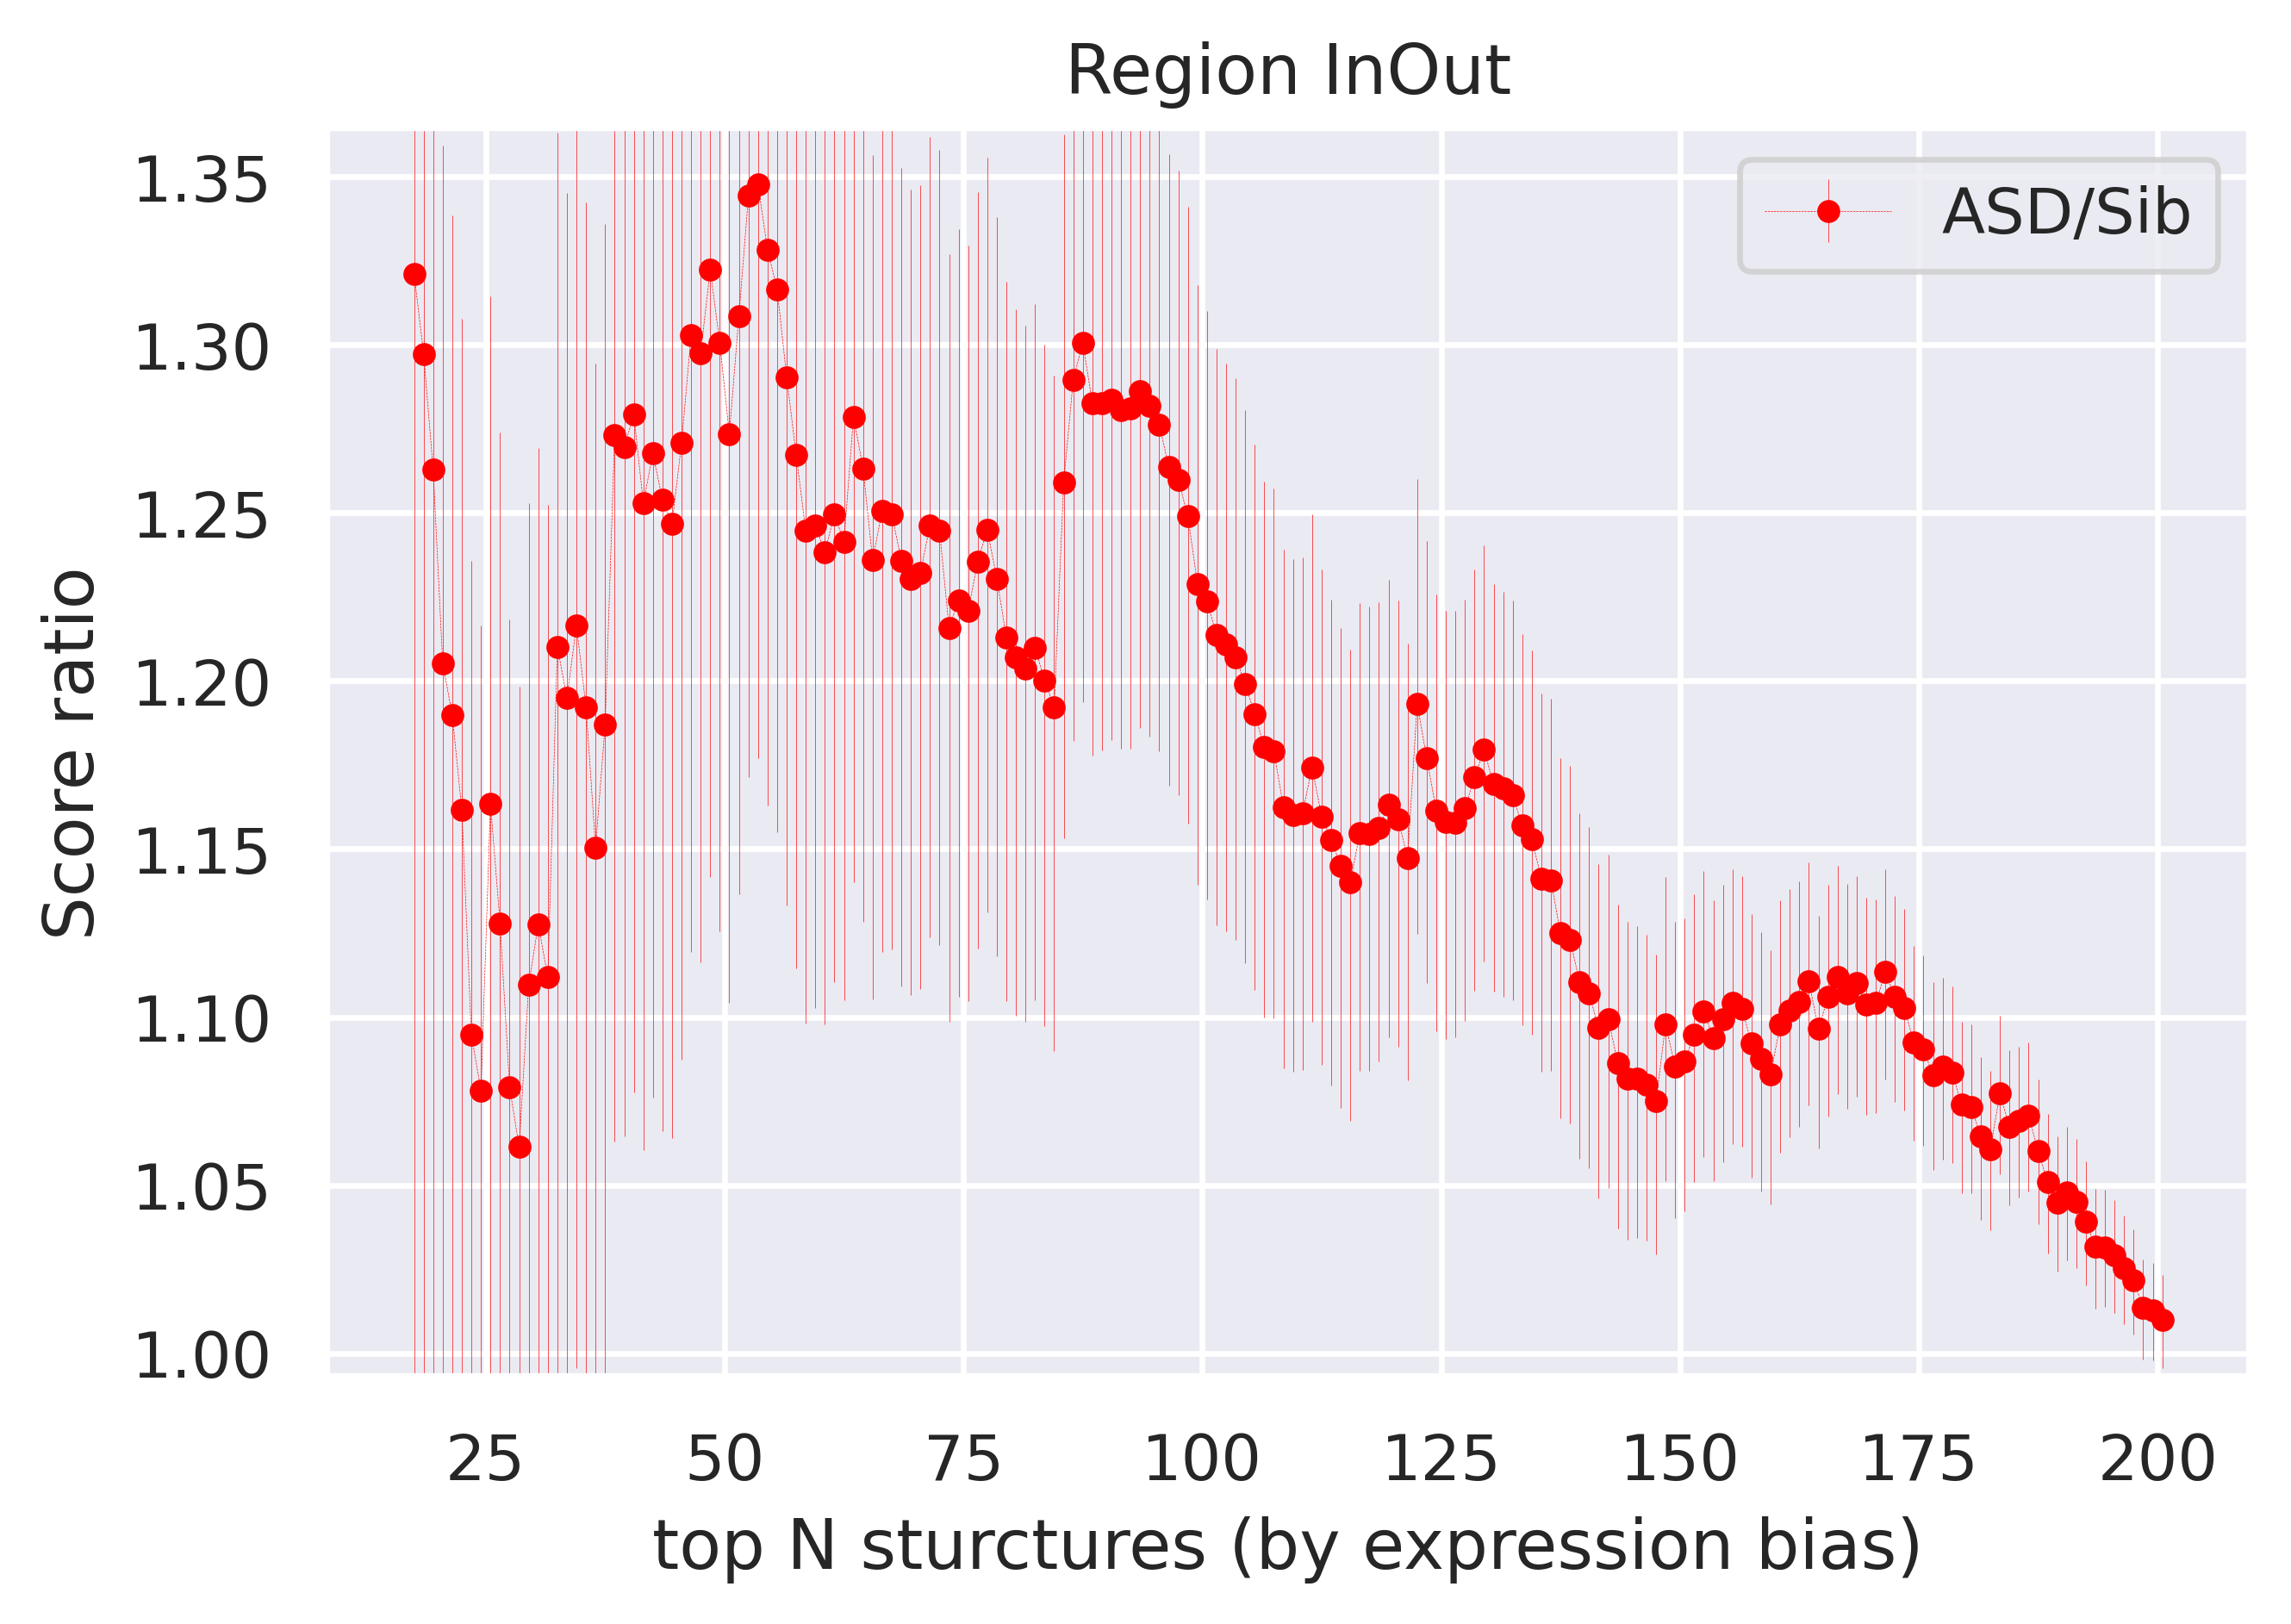

In [166]:
PlotingScore_profile(ASD_Region_In, Cont_Region_In, "Region In")
PlotingScore_profile(ASD_Region_InOut, Cont_Region_InOut, "Region InOut")

# Compare Scores

In [200]:
DIR = "../dat/allen-mouse-conn/ScoreingMat/"

BiasCorr = pd.read_csv(DIR + "ScoreMat_BiasCorr.csv", index_col=0)
ConnWeight = pd.read_csv(DIR + "ScoreMat_ConnWeights.csv", index_col=0)
#ConnWeight = pd.read_csv( "/home/jw3514/Work/ASD_Circuits/dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05-deg_min_1-by_weight_pvalue.csv", index_col=0)
Distance = pd.read_csv(DIR + "ScoreMat_Distance.csv", index_col=0)
Region = pd.read_csv(DIR + "ScoreMat_Region.csv", index_col=0)

In [201]:
ScoreDF_dat = []
for i_str in BiasCorr.index.values:
    for j_str in BiasCorr.columns.values:
        a = BiasCorr.loc[i_str, j_str]
        b = ConnWeight.loc[i_str, j_str]
        c = Distance.loc[i_str, j_str]
        d = Region.loc[i_str, j_str]
        if a != 0:
            name = "{}-{}".format(i_str, j_str)
            ScoreDF_dat.append([name, a,b,c,d])
ScoreDF = pd.DataFrame(ScoreDF_dat, columns=["Edge", "BiasCorr", "ConnWeight", "Distance", "Region"])
ScoreDF = ScoreDF.set_index("Edge")


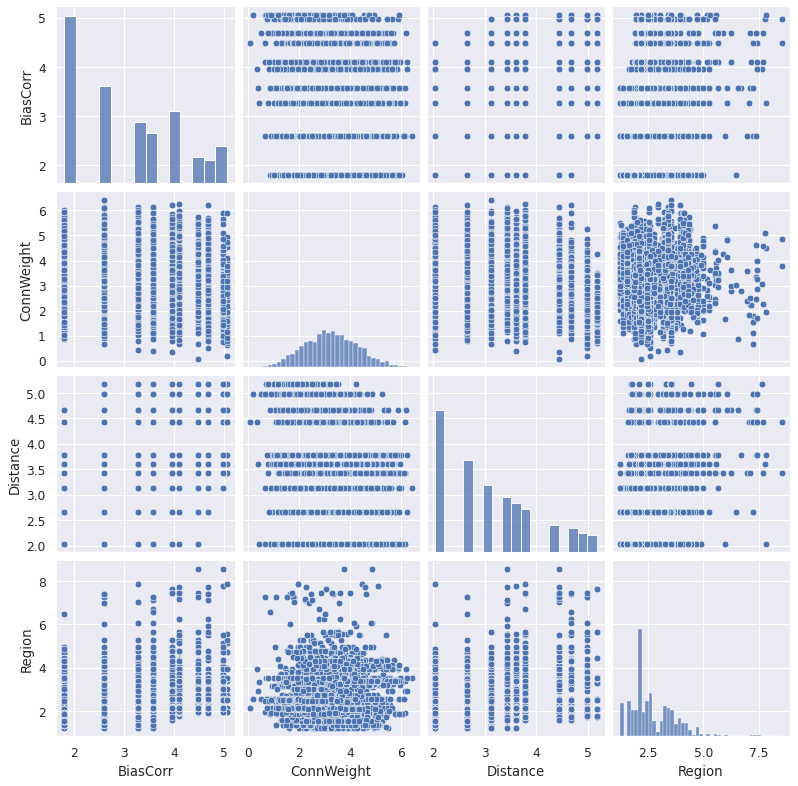

In [202]:
import seaborn as sns
sns.pairplot(ScoreDF)

In [203]:
ASD_STRs = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", 
                       index_col="STR").index.values[:50]

In [204]:
ScoreDF_dat_asd = []
for i_str in BiasCorr.index.values:
    for j_str in BiasCorr.columns.values:
        if (i_str in ASD_STRs and j_str in ASD_STRs):
            a = BiasCorr.loc[i_str, j_str]
            b = ConnWeight.loc[i_str, j_str]
            c = Distance.loc[i_str, j_str]
            d = Region.loc[i_str, j_str]
            if a != 0:
                name = "{}-{}".format(i_str, j_str)
                ScoreDF_dat_asd.append([name, a,b,c,d])
ASD_ScoreDF = pd.DataFrame(ScoreDF_dat_asd, columns=["Edge", "BiasCorr", "ConnWeight", "Distance", "Region"])
ASD_ScoreDF = ASD_ScoreDF.set_index("Edge")

In [205]:
ASD_ScoreDF

BiasCorr  ConnWeight  \
Edge                                                                       
Anterior_cingulate_area_dorsal_part-Agranular_i...  2.595172    2.621566   
Anterior_cingulate_area_dorsal_part-Anterior_pr...  4.097356    3.436139   
Anterior_cingulate_area_dorsal_part-Claustrum       2.595172    3.005500   
Anterior_cingulate_area_dorsal_part-Caudoputamen    3.566640    4.522463   
Anterior_cingulate_area_dorsal_part-Infralimbic...  1.807673    3.358286   
...                                                      ...         ...   
Primary_visual_area-Retrosplenial_area_lateral_...  1.807673    2.512769   
Primary_visual_area-Anteromedial_visual_area        1.807673    2.905230   
Primary_visual_area-Lateral_visual_area             1.807673    2.369516   
Primary_visual_area-posteromedial_visual_area       1.807673    1.556789   
posteromedial_visual_area-Lateral_visual_area       1.807673    3.496859   

                                                    Distance    Region  
Edge                                                                    
Anterior_cingulate_area_dorsal_part-Agranular_i...  3.604173  2.078003  
Anterior_cingulate_area_dorsal_part-Anterior_pr...  3.604173  2.574156  
Anterior_cingulate_area_dorsal_part-Claustrum       3.604173  2.247928  
Anterior_cingulate_area_dorsal_part-Caudoputamen    3.125473  3.203533  
Anterior_cingulate_area_dorsal_part-Infralimbic...  2.668696  2.078003  
...                                                      ...       ...  
Primary_visual_area-Retrosplenial_area_lateral_...  2.040342  2.078003  
Primary_visual_area-Anteromedial_visual_area        2.040342  2.078003  
Primary_visual_area-Lateral_visual_area             2.040342  2.078003  
Primary_visual_area-posteromedial_visual_area       2.040342  2.078003  
posteromedial_visual_area-Lateral_visual_area       2.668696  2.078003  

[329 rows x 4 columns]

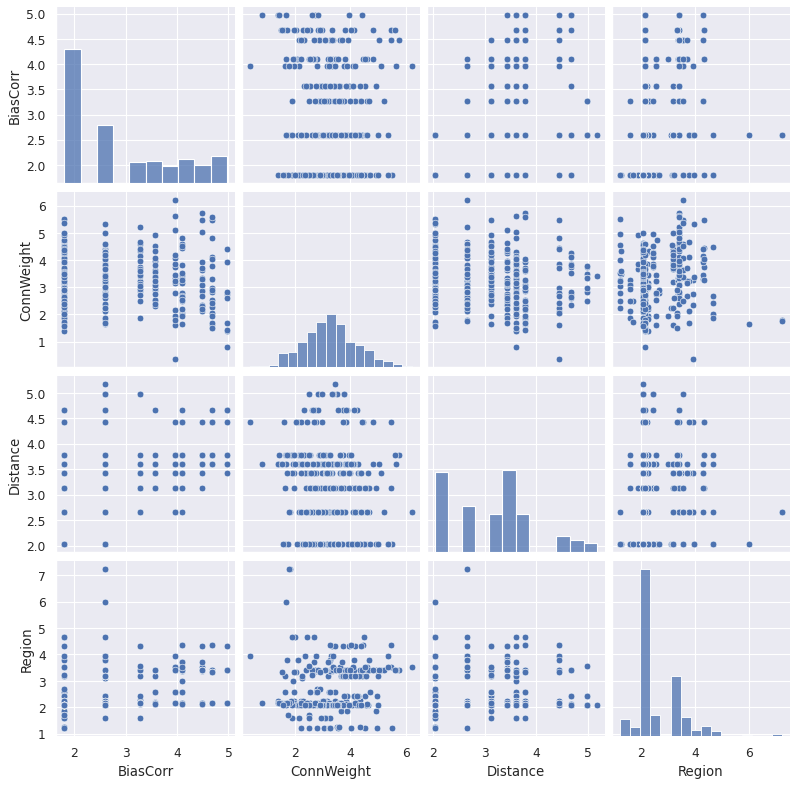

In [206]:
import seaborn as sns
sns.pairplot(ASD_ScoreDF)